<a href="https://colab.research.google.com/github/Harsh-Singh24/CHD-Binary-classification/blob/main/MLProject_Classification_risk_of_future_coronary_heart_disease_(CHD).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **MODEL**    -Binary classification model




**Steps Involved in Logistic Regression**

1. Define the Problem.
2. Data Collection.
3. Exploratory Data Analysis (EDA) :
4. Data Preprocessing./Feature engineering based on EDA

    1.Handle Missing Values.

    2.Scaling:Normalize or Standardize.

    3.Encode Categorical Variables: One hot encoding and label encoding.

    4.Remove Outliers: Using IQR and Z-score.
    
    5.Handing data imbalance.

6. Split Data.

7. Build the Model.

8. Model Evaluation.   
   



# **Project Name**    - Cardiovascular Risk Prediction



##### **Project Type**    -Binary Classification
##### **Model used**    - Logistic regression, Decision Tree, Random forest, Gradient Boosting, Adaboost, XGboost, SVM, KNN, Naive bayes classifier.
##### **Contribution**    - Individual
##### **Project by  -**    Harsh Singh

# **Project Summary -**

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes. Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.

# **Problem Statement**


The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes. Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.

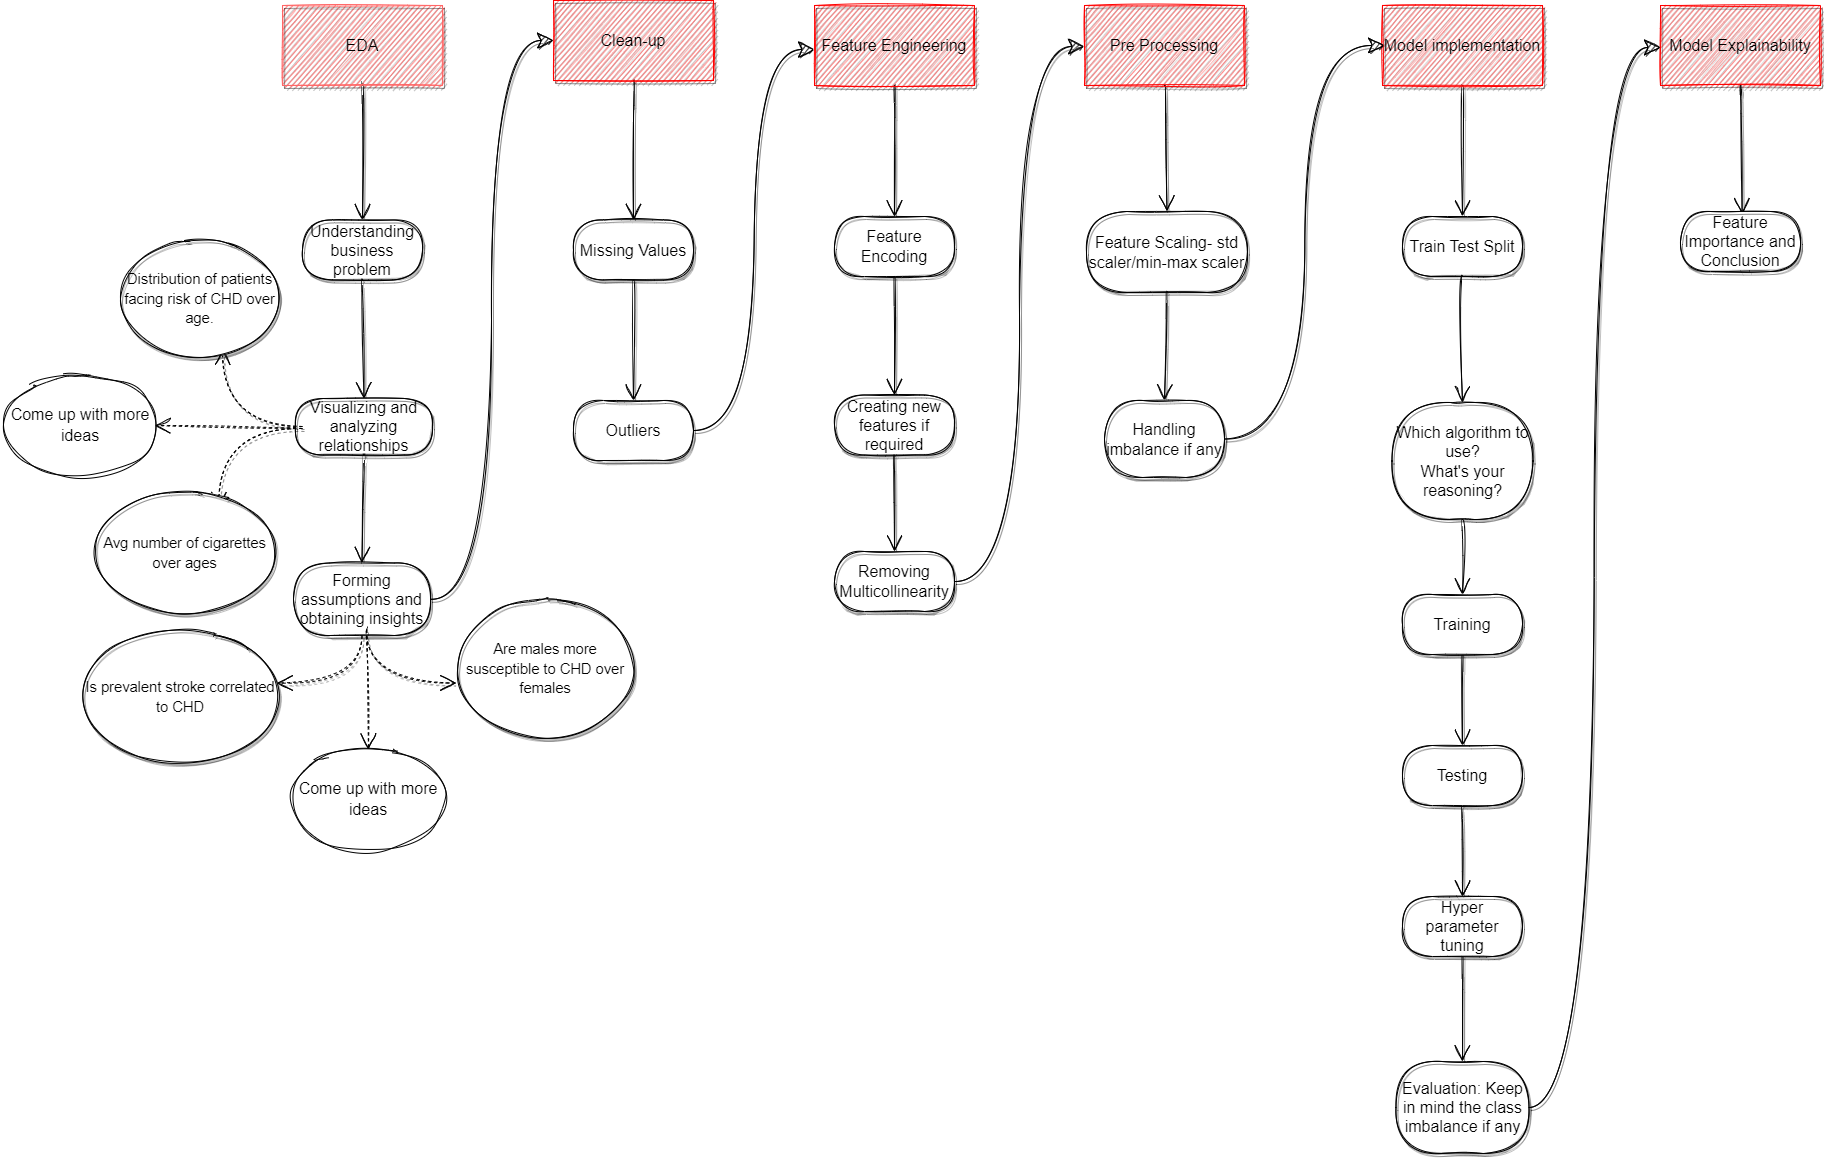

# ***Let's Begin !***

## ***1. Know Your Data***

### 1.1 Import Libraries

In [ ]:
# Import Libraries

import numpy as np
#from numpy import math
import pandas as pd

#data visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Datetime library for manipulating Date columns.
from datetime import datetime
import datetime as dt


from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# Importing various machine learning models.
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# Import different metrics from sci-kit libraries for model evaluation.
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

# Importing warnings library. The warnings module handles warnings in Python.
import warnings
warnings.filterwarnings('ignore')

### 1.2 Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Data Science : Project /ML Project: Binary Classification/data_cardiovascular_risk.csv')

### 1.3 Dataset First View

In [ ]:
# Dataset First Look
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
dataset.head()

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

### 1.4 Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
dataset.shape

(3390, 17)

Dataset have 17 features(columns) and 3390 Observations (rows)

### 1.5 Dataset Information

In [ ]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
dataset.duplicated().sum()

np.int64(0)

above data set has no duplicate values

#### Missing Values/Null Values

In [ ]:
dataset.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [ ]:
# Missing Values/Null Values Count
dataset.isnull().sum().sum()

np.int64(510)

### 1.6 What did you know about your dataset?

Uptill now we found that our dataset have 3390 rows and 17 columns. Clearly above data have total 510 missing values and do not consist any duplicate values.

## ***2. Understanding Your Variables***

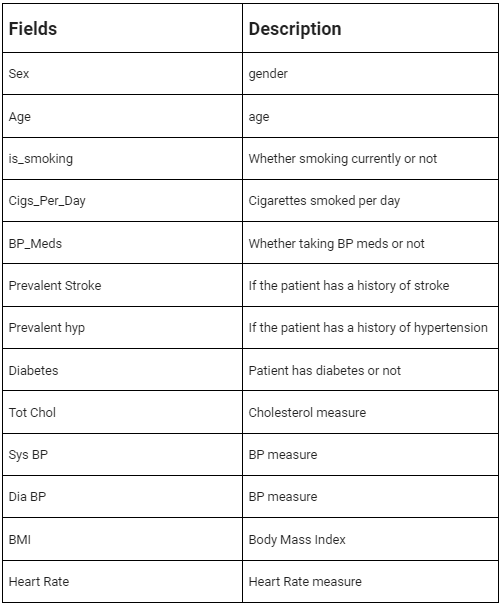

In [ ]:
# Dataset Columns
dataset.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
# Dataset Describe
dataset.describe()

id          age    education   cigsPerDay       BPMeds  \
count  3390.000000  3390.000000  3303.000000  3368.000000  3346.000000   
mean   1694.500000    49.542183     1.970936     9.069477     0.029886   
std     978.753033     8.592878     1.019081    11.879078     0.170299   
min       0.000000    32.000000     1.000000     0.000000     0.000000   
25%     847.250000    42.000000     1.000000     0.000000     0.000000   
50%    1694.500000    49.000000     2.000000     0.000000     0.000000   
75%    2541.750000    56.000000     3.000000    20.000000     0.000000   
max    3389.000000    70.000000     4.000000    70.000000     1.000000   

       prevalentStroke  prevalentHyp     diabetes      totChol       sysBP  \
count      3390.000000   3390.000000  3390.000000  3352.000000  3390.00000   
mean          0.006490      0.315339     0.025664   237.074284   132.60118   
std           0.080309      0.464719     0.158153    45.247430    22.29203   
min           0.000000      0.000000     0.000000   107.000000    83.50000   
25%           0.000000      0.000000     0.000000   206.000000   117.00000   
50%           0.000000      0.000000     0.000000   234.000000   128.50000   
75%           0.000000      1.000000     0.000000   264.000000   144.00000   
max           1.000000      1.000000     1.000000   696.000000   295.00000   

             diaBP          BMI    heartRate      glucose   TenYearCHD  
count  3390.000000  3376.000000  3389.000000  3086.000000  3390.000000  
mean     82.883038    25.794964    75.977279    82.086520     0.150737  
std      12.023581     4.115449    11.971868    24.244753     0.357846  
min      48.000000    15.960000    45.000000    40.000000     0.000000  
25%      74.500000    23.020000    68.000000    71.000000     0.000000  
50%      82.000000    25.380000    75.000000    78.000000     0.000000  
75%      90.000000    28.040000    83.000000    87.000000     0.000000  
max     142.500000    56.800000   143.000000   394.000000     1.000000

### 2.1 Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in dataset.columns:
  print(f'The Number of unique values in feature {i} are {dataset[i].nunique()}')

The Number of unique values in feature id are 3390
The Number of unique values in feature age are 39
The Number of unique values in feature education are 4
The Number of unique values in feature sex are 2
The Number of unique values in feature is_smoking are 2
The Number of unique values in feature cigsPerDay are 32
The Number of unique values in feature BPMeds are 2
The Number of unique values in feature prevalentStroke are 2
The Number of unique values in feature prevalentHyp are 2
The Number of unique values in feature diabetes are 2
The Number of unique values in feature totChol are 240
The Number of unique values in feature sysBP are 226
The Number of unique values in feature diaBP are 142
The Number of unique values in feature BMI are 1259
The Number of unique values in feature heartRate are 68
The Number of unique values in feature glucose are 132
The Number of unique values in feature TenYearCHD are 2


## 3. ***Data Wrangling***

### 3.1 Functions

In [ ]:
def col(dataset):
  return dataset.columns.to_list()

The np.percentile function does not handle missing values by default and will return nan if any NaN values are present.

In [ ]:
def IQR(data,col):
  I = np.percentile(data[col],75) - np.percentile(data[col],25)
  return I

def upper_limit(data,col):
  iqr = np.percentile(data[col],75) - np.percentile(data[col],25)
  ul = np.percentile(data[col],75) + (1.5 * iqr)
  return ul

def lower_limit(data,col):
  iqr = np.percentile(data[col],75) - np.percentile(data[col],25)
  ll = np.percentile(data[col],25) - (1.5 * iqr)
  return ll

In [ ]:
#function for One hot encoding
def one_hot_encoding (data,column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=False)], axis=1)
    data = data.drop([column], axis=1)
    return data

In [ ]:
def one_hot_encoding(data, column):
    # Create dummy variables
    dummies = pd.get_dummies(data[column], prefix=column, drop_first=True) #drop_first= True is used so first dummy column can be dropped to avoid multicoliearity
    # Ensure the dummy columns are numeric (0 and 1)
    dummies = dummies.astype(int)
    # Concatenate the dummy variables with the original dataset
    data = pd.concat([data, dummies], axis=1)
    # Drop the original column
    data = data.drop([column], axis=1)
    return data


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In this project we are trying to build a ML regression model to predict the demand of rental bikes.

#### Chart - 1 Understanding our dependent variable,

In [ ]:
plt.rcParams['figure.figsize'] = (5,5)

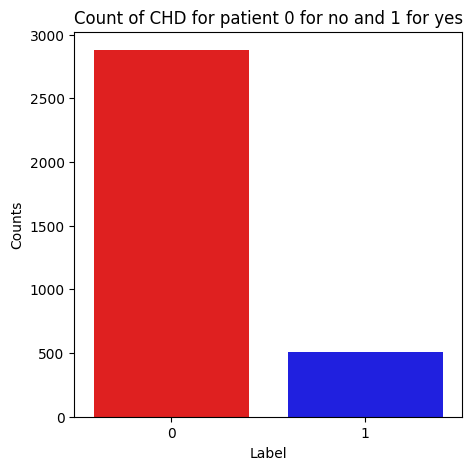

In [ ]:
# Chart - 1A visualization code
x = dataset['TenYearCHD'].value_counts().index
y = dataset['TenYearCHD'].value_counts().values

sns.barplot(x=x,y=y,palette=["red", "blue"])
plt.title("Count of CHD for patient 0 for no and 1 for yes")
plt.xlabel("Label")
plt.ylabel("Counts")
plt.show()

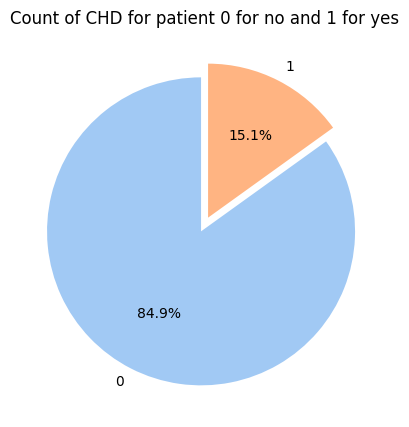

In [ ]:
# Chart - 1B visualization code
x = dataset['TenYearCHD'].value_counts().index
y = dataset['TenYearCHD'].value_counts().values
explode = [0.05,0.05]

plt.pie(y,labels = x,autopct='%1.1f%%',explode = explode, startangle=90, colors=sns.color_palette("pastel"))
plt.title("Count of CHD for patient 0 for no and 1 for yes")
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts are commonly used to visualize the frequency or count of different categories, while pie charts are more suited for representing the proportional distribution or percentage share of categories within a dataset.

##### 2. What is/are the insight(s) found from the chart?

From the above charts we can see that there is data imbalance in our dataset. Our target class only share 15.1% of the data. And we will need to use  resampling techniques to handle data imbalance. That we will see later.

#### Chart - 2 Analysing "Age"

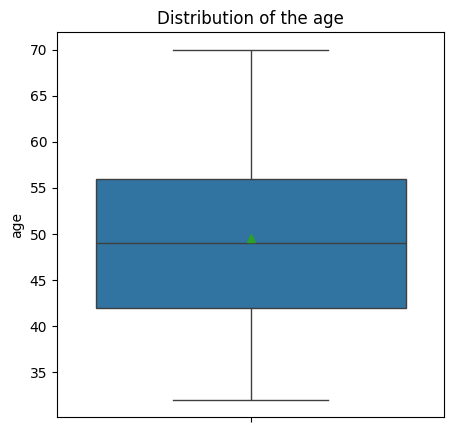

In [ ]:
#chart-2A visualization code (by defualt median)
sns.boxplot(dataset['age'],showmeans = True)
plt.title("Distribution of the age")
plt.show()

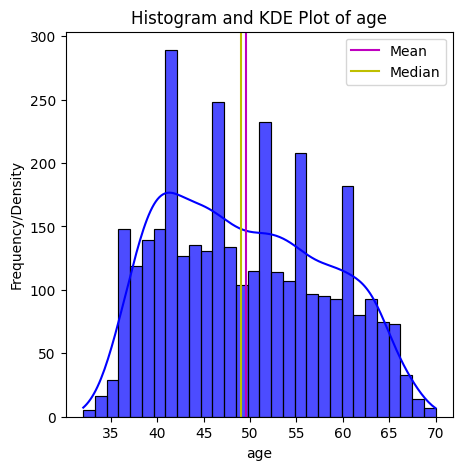

In [ ]:
#chart-2B visualization code
sns.histplot(dataset['age'], kde=True, bins=30, color='blue', alpha=0.7)
plt.title('Histogram and KDE Plot of age')
plt.xlabel('age')
plt.ylabel('Frequency/Density')
plt.axvline(dataset['age'].mean(),color= 'm', label = 'Mean')
plt.axvline(dataset['age'].median(),color= 'y', label = 'Median')
plt.legend(loc = 'upper right')
plt.show()

In [ ]:
#skewness
from scipy.stats import skew
skew_value = skew(dataset['age'])
print(skew_value)
print("This indicates that our data is slightly positively skewed")

0.22569595370960135
This indicates that our data is slightly positively skewed


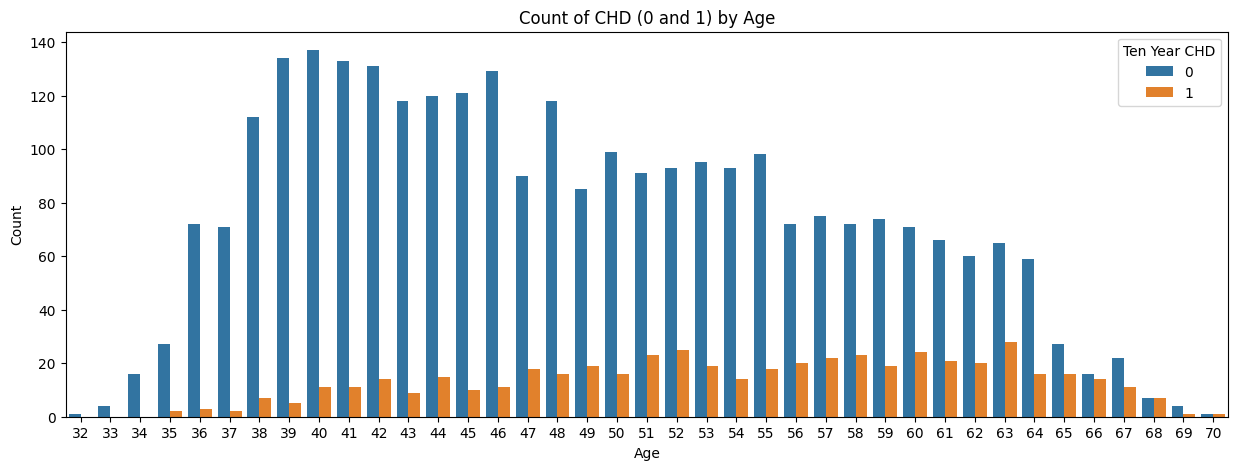

In [ ]:
# Chart - 2B visualization code
#check what is the result when age is increasing count of 1 and 0 for every age
plt.rcParams['figure.figsize'] = (15,5)
sns.countplot(x='age', hue='TenYearCHD', data=dataset)
plt.title("Count of CHD (0 and 1) by Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(title="Ten Year CHD", loc='upper right')
plt.show()

In [ ]:
data_counts = dataset.groupby(['age', 'TenYearCHD']).size().reset_index(name='count')
data_counts = pd.DataFrame(data_counts)
data_counts
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
print(data_counts)

    age  TenYearCHD  count
0    32           0      1
1    33           0      4
2    34           0     16
3    35           0     27
4    35           1      2
5    36           0     72
6    36           1      3
7    37           0     71
8    37           1      2
9    38           0    112
10   38           1      7
11   39           0    134
12   39           1      5
13   40           0    137
14   40           1     11
15   41           0    133
16   41           1     11
17   42           0    131
18   42           1     14
19   43           0    118
20   43           1      9
21   44           0    120
22   44           1     15
23   45           0    121
24   45           1     10
25   46           0    129
26   46           1     11
27   47           0     90
28   47           1     18
29   48           0    118
30   48           1     16
31   49           0     85
32   49           1     19
33   50           0     99
34   50           1     16
35   51           0     91
3

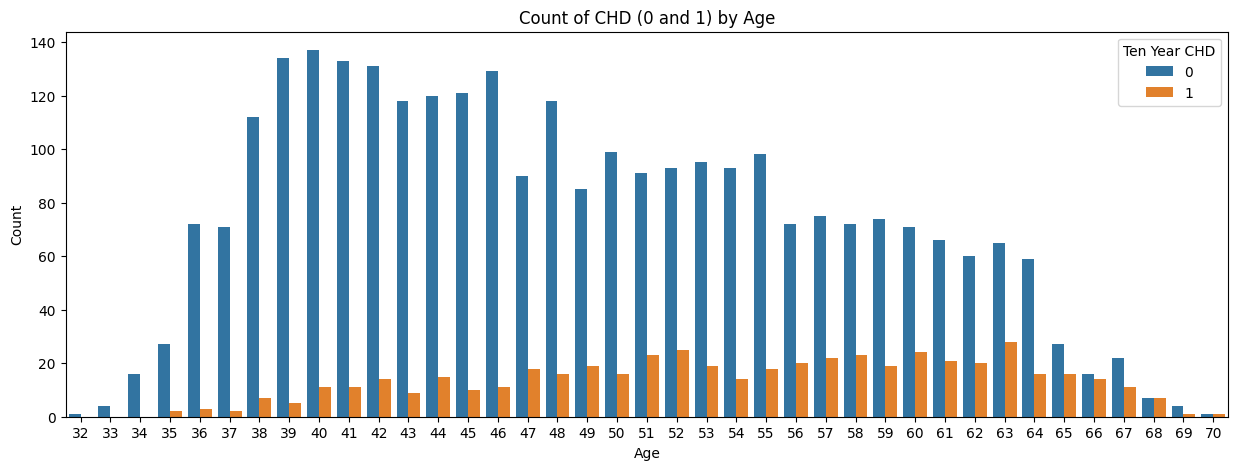

In [ ]:
# Chart - 2B visualization code
#check what is the result when age is increasing count of 1 and 0 for every age
sns.barplot(x='age', y='count', hue='TenYearCHD', data=data_counts)
plt.title("Count of CHD (0 and 1) by Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(title="Ten Year CHD", loc='upper right')
plt.show()

##### 1. Why did you pick the specific chart?

The sns.barplot function in Seaborn is used to create bar plots. A bar plot represents an estimate of central tendency (mean by default) for a numeric variable, grouped by one or more categorical variables.

##### 2. What is/are the insight(s) found from the chart?

We can see that when the age is increasing the chances of CHD increses as at the higher age ratio of CHD to no CHD  deacreses. We can also see for different age groups we dont have same number of observation which may cause bias in our model.

#### Chart - 3 Analysing "gender"

In [ ]:
dataset['sex'].value_counts()

sex
F    1923
M    1467
Name: count, dtype: int64

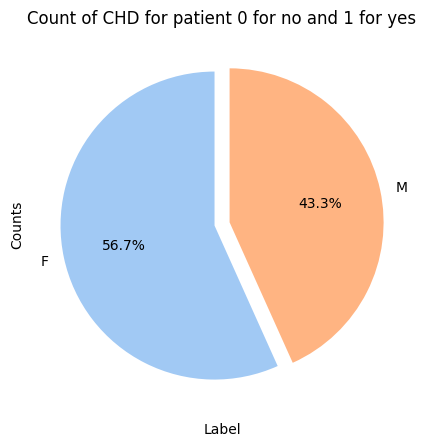

In [ ]:
#chart 3A - distritbution of gender
x = dataset['sex'].value_counts().index
y = dataset['sex'].value_counts().values
explode = [0.05,0.05]

plt.pie(y,labels = x,autopct='%1.1f%%',explode = explode, startangle=90, colors=sns.color_palette("pastel"))
plt.title("Count of CHD for patient 0 for no and 1 for yes")
plt.xlabel("Label")
plt.ylabel("Counts")
plt.show()

In [ ]:
# Count combinations of 'sex' and 'TenYearCHD'
grouped_data = dataset.groupby(['sex', 'TenYearCHD']).size().unstack(fill_value=0)
grouped_data

TenYearCHD     0    1
sex                  
F           1684  239
M           1195  272

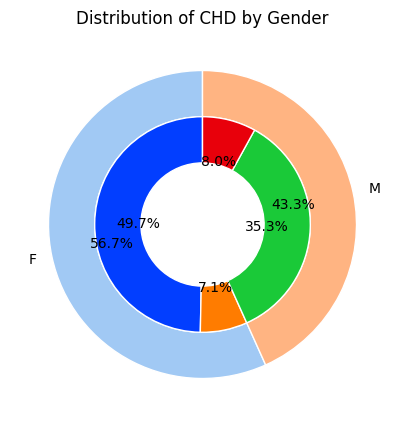

In [ ]:
#chart 3B distribution of gender with CHD count
grouped_data = dataset.groupby(['sex', 'TenYearCHD']).size().unstack(fill_value=0)

outer_labels = grouped_data.index  # 'Male' and 'Female'
outer_sizes = grouped_data.sum(axis=1)  # Total count of each gender

inner_labels = grouped_data.columns  # '0' and '1' for TenYearCHD
inner_sizes = grouped_data.values.flatten()  # Flattened counts for inner circle

# Define colors
outer_colors = sns.color_palette("pastel")[:len(outer_labels)]
inner_colors = sns.color_palette("bright")[:len(inner_sizes)]

# Create the pie chart
fig, ax = plt.subplots()
ax.pie(
    outer_sizes,
    labels=outer_labels,
    radius=1,
    colors=outer_colors,
    wedgeprops=dict(width=0.3, edgecolor='w'),
    autopct='%1.1f%%',
    startangle=90,
)
ax.pie(
    inner_sizes,
    labels=None,
    radius=0.7,
    colors=inner_colors,
    wedgeprops=dict(width=0.3, edgecolor='w'),
    autopct='%1.1f%%',
    startangle=90,
)

# Add title and show plot
plt.title("Distribution of CHD by Gender")
plt.show()

##### 1. Why did you pick the specific chart?

The regression plots in seaborn is used to create a scatter plot with a linear regression line fitted to the data. It’s particularly useful for visualizing the relationship between two continuous variables and helps you see if the relationship is linear and how well the data fits the linear regression model.

##### 2. What is/are the insight(s) found from the chart?

The dataset revealed a higher number of females (1684) compared to males (1195). However, when we looked closer at Coronary Heart Disease (CHD), the numbers took a concerning turn:

272 men were affected by CHD,
while 239 women were affected.
This means that men face a higher percentage of CHD cases despite being fewer in the dataset.

##### 3. Will the gained insights help creating a positive business impact?

This insight underscores the need to address stress and lifestyle factors, particularly in men, to mitigate cardiovascular risks.

#### Chart - 4 Analysing "is_smoking".

In [ ]:
dataset['is_smoking'].value_counts()

is_smoking
NO     1703
YES    1687
Name: count, dtype: int64

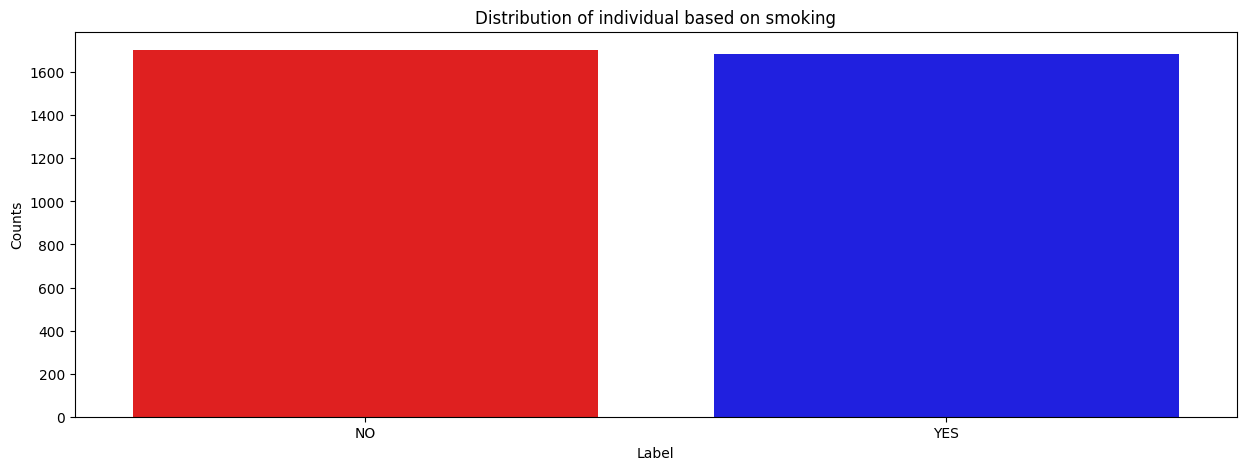

In [ ]:
#chart-4A
x = dataset['is_smoking'].value_counts().index
y = dataset['is_smoking'].value_counts().values


sns.barplot(x=x,y=y,palette=["red", "blue"])
plt.title("Distribution of individual based on smoking")
plt.xlabel("Label")
plt.ylabel("Counts")
plt.show()



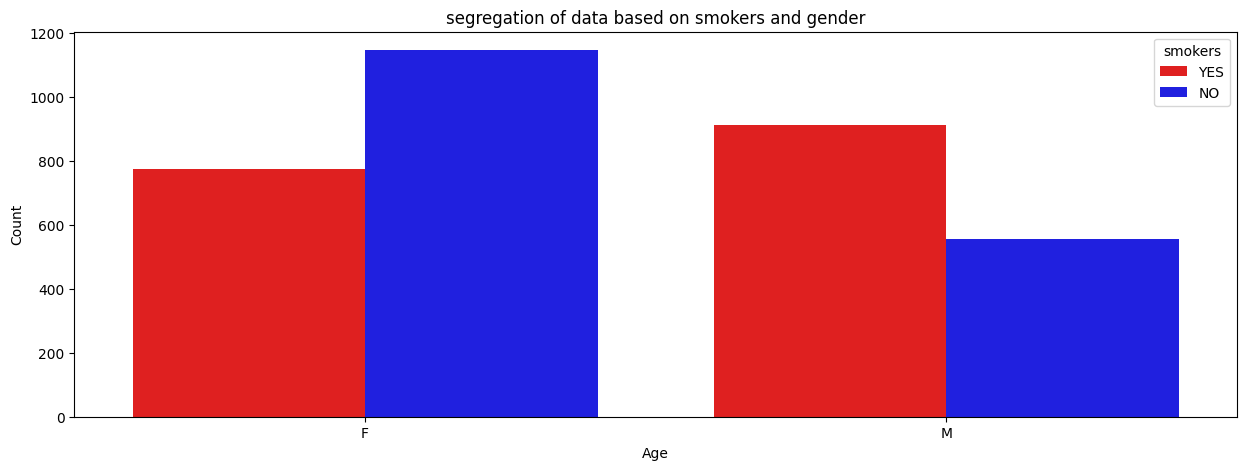

In [ ]:
#chart-4B
sns.countplot(x='sex', hue='is_smoking', data=dataset,palette=["red", "blue"])
plt.title("segregation of data based on smokers and gender")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(title="smokers", loc='upper right')
plt.show()

Cleary males smokes more than females.

1467 272 1195 911 183 728 556 89 467


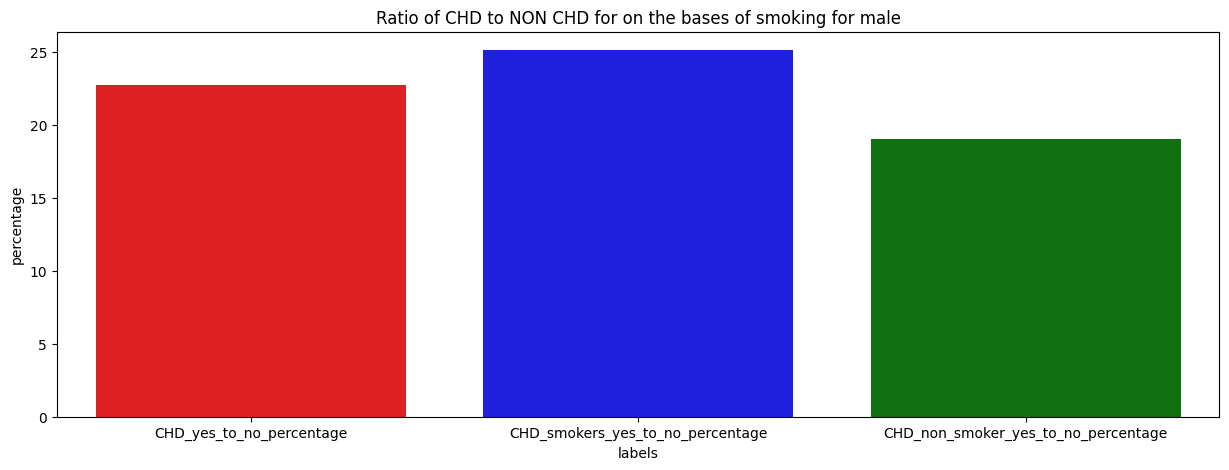

In [ ]:
# Chart - 4A visualization code, ratio of CHD in smokers and non smokers
male = len(dataset[dataset['sex'] == 'M']['sex'])
male_CHD = len(dataset[(dataset['sex'] == 'M') & (dataset['TenYearCHD'] == 1) ]['sex'])
male_CHD_no = len(dataset[(dataset['sex'] == 'M') & (dataset['TenYearCHD'] == 0) ]['sex'])
male_smoker = len(dataset[(dataset['sex'] == 'M') & (dataset['is_smoking'] == 'YES')]['sex'])
male_smoker_CHD = len(dataset[(dataset['sex'] == 'M') & (dataset['is_smoking'] == 'YES') & (dataset['TenYearCHD'] == 1) ]['sex'])
male_smoker_CHD_no = len(dataset[(dataset['sex'] == 'M') & (dataset['is_smoking'] == 'YES') & (dataset['TenYearCHD'] == 0) ]['sex'])
male_non_smoker = len(dataset[(dataset['sex'] == 'M') & (dataset['is_smoking'] == 'NO')]['sex'])
male_non_smoker_CHD = len(dataset[(dataset['sex'] == 'M') & (dataset['is_smoking'] == 'NO') & (dataset['TenYearCHD'] == 1) ]['sex'])
male_non_smoker_CHD_no = len(dataset[(dataset['sex'] == 'M') & (dataset['is_smoking'] == 'NO') & (dataset['TenYearCHD'] == 0) ]['sex'])

print(male,male_CHD,male_CHD_no,male_smoker,male_smoker_CHD,male_smoker_CHD_no,male_non_smoker,male_non_smoker_CHD,male_non_smoker_CHD_no)

CHD_yes_to_no_percentage = (male_CHD/male_CHD_no)*100
CHD_smokers_yes_to_no_percentage = (male_smoker_CHD/male_smoker_CHD_no)*100
CHD_non_smoker_yes_to_no_percentage = (male_non_smoker_CHD/male_non_smoker_CHD_no)*100

x = ['CHD_yes_to_no_percentage','CHD_smokers_yes_to_no_percentage','CHD_non_smoker_yes_to_no_percentage']
y = [CHD_yes_to_no_percentage,CHD_smokers_yes_to_no_percentage,CHD_non_smoker_yes_to_no_percentage]

sns.barplot(x=x, y=y,palette=["red", "blue","Green"])
plt.xlabel('labels')
plt.ylabel('percentage')
plt.title('Ratio of CHD to NON CHD for on the bases of smoking for male')
plt.show()


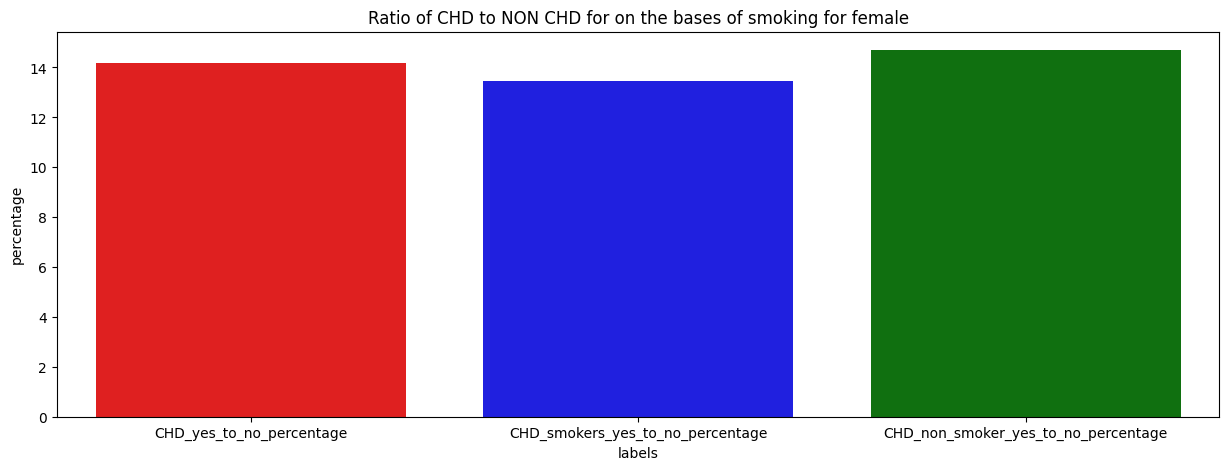

In [ ]:
# Chart - 4B visualization code, ratio of CHD in smokers and non smokers
female = len(dataset[dataset['sex'] == 'F']['sex'])
female_CHD = len(dataset[(dataset['sex'] == 'F') & (dataset['TenYearCHD'] == 1) ]['sex'])
female_CHD_no = len(dataset[(dataset['sex'] == 'F') & (dataset['TenYearCHD'] == 0) ]['sex'])
female_smoker = len(dataset[(dataset['sex'] == 'F') & (dataset['is_smoking'] == 'YES')]['sex'])
female_smoker_CHD = len(dataset[(dataset['sex'] == 'F') & (dataset['is_smoking'] == 'YES') & (dataset['TenYearCHD'] == 1) ]['sex'])
female_smoker_CHD_no = len(dataset[(dataset['sex'] == 'F') & (dataset['is_smoking'] == 'YES') & (dataset['TenYearCHD'] == 0) ]['sex'])
female_non_smoker = len(dataset[(dataset['sex'] == 'F') & (dataset['is_smoking'] == 'NO')]['sex'])
female_non_smoker_CHD = len(dataset[(dataset['sex'] == 'F') & (dataset['is_smoking'] == 'NO') & (dataset['TenYearCHD'] == 1) ]['sex'])
female_non_smoker_CHD_no = len(dataset[(dataset['sex'] == 'F') & (dataset['is_smoking'] == 'NO') & (dataset['TenYearCHD'] == 0) ]['sex'])


CHD_yes_to_no_percentage = (female_CHD/female_CHD_no)*100
CHD_smokers_yes_to_no_percentage = (female_smoker_CHD/female_smoker_CHD_no)*100
CHD_non_smoker_yes_to_no_percentage = (female_non_smoker_CHD/female_non_smoker_CHD_no)*100

x = ['CHD_yes_to_no_percentage','CHD_smokers_yes_to_no_percentage','CHD_non_smoker_yes_to_no_percentage']
y = [CHD_yes_to_no_percentage,CHD_smokers_yes_to_no_percentage,CHD_non_smoker_yes_to_no_percentage]

sns.barplot(x=x, y=y,palette=["red", "blue","Green"])
plt.xlabel('labels')
plt.ylabel('percentage')
plt.title('Ratio of CHD to NON CHD for on the bases of smoking for female')
plt.show()

##### 1. Why did you pick the specific chart?

The regression plots in seaborn is used to create a scatter plot with a linear regression line fitted to the data. It’s particularly useful for visualizing the relationship between two continuous variables and helps you see if the relationship is linear and how well the data fits the linear regression model.

A line plot is a basic chart type used to visualize data points connected by straight lines. It is particularly useful for showing trends over time or relationships between continuous variables.

##### 2. What is/are the insight(s) found from the chart?

Interestingly, CHD ratio for non smokers is higher smokers in case of females.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Rainfall has no significant effect on demand

#### Chart - 5 Analysing "cigsPerDay".

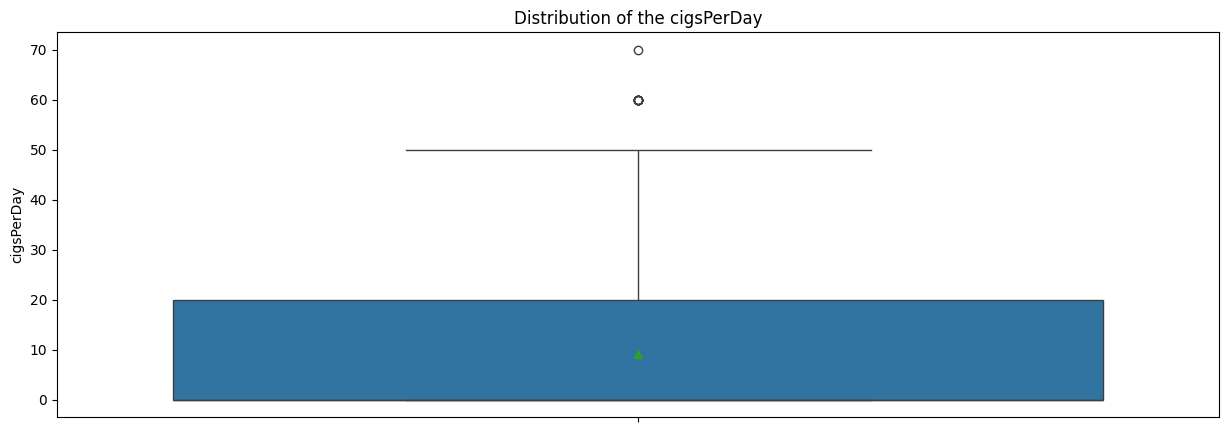

In [ ]:
sns.boxplot(dataset['cigsPerDay'],showmeans = True)
plt.title("Distribution of the cigsPerDay")
plt.show()

In [ ]:
dataset.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
dataset[dataset['is_smoking'] == 'YES'].groupby('sex')['cigsPerDay'].mean()

sex
F    14.056136
M    22.001112
Name: cigsPerDay, dtype: float64

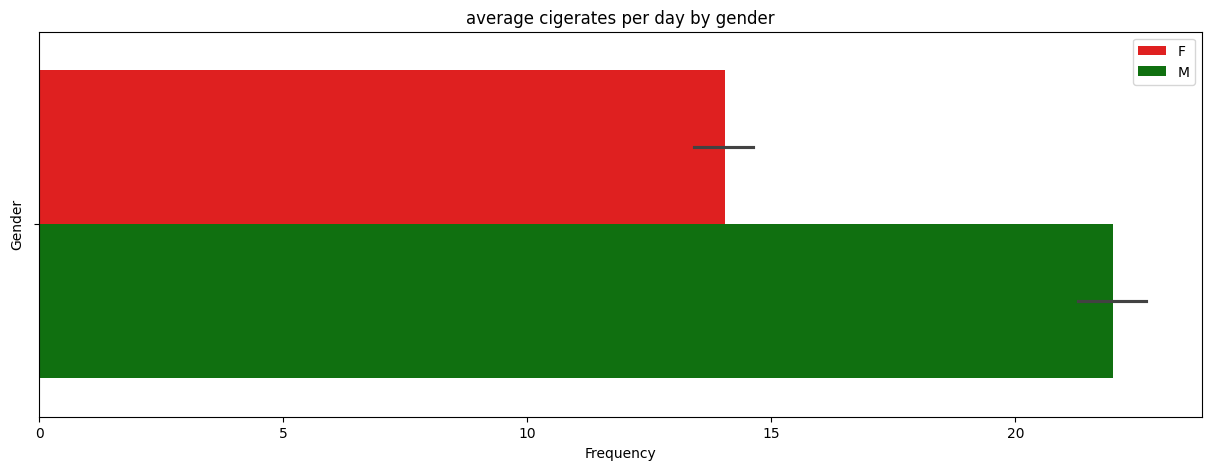

In [ ]:
# Chart - 5A visualization code
dataset_smokers = dataset[dataset['is_smoking'] == 'YES']
sns.barplot(data= dataset_smokers, x= 'cigsPerDay',hue = 'sex', color='blue',palette = ['red','green'],estimator = np.mean)
plt.title('average cigerates per day by gender')
plt.xlabel('Frequency')
plt.ylabel('Gender')
plt.legend(loc = 'upper right')
plt.show()

In [ ]:
dataset[dataset['is_smoking'] == 'YES'].groupby('sex')['cigsPerDay'].median()

sex
F    15.0
M    20.0
Name: cigsPerDay, dtype: float64

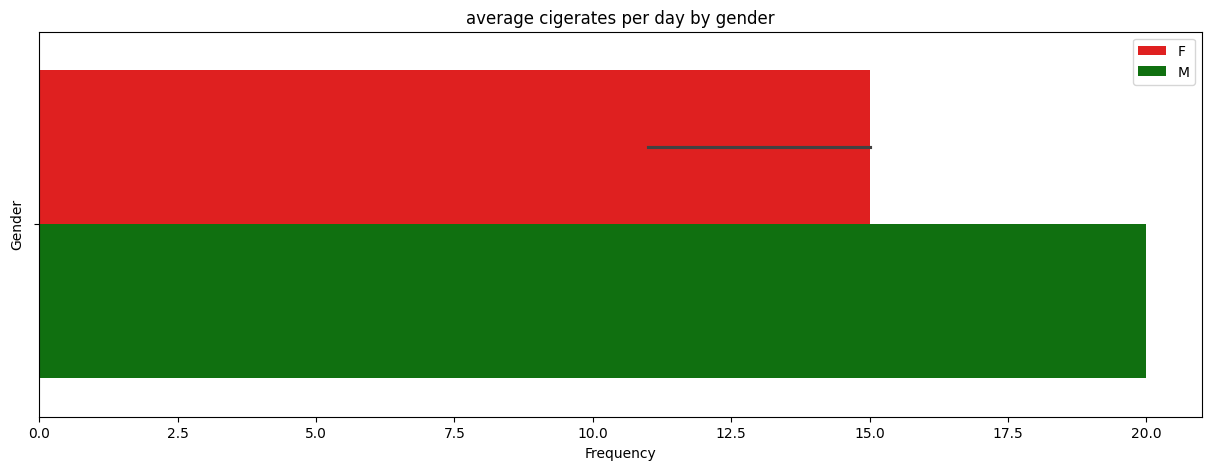

In [ ]:
# Chart - 5B visualization code
dataset_smokers = dataset[dataset['is_smoking'] == 'YES']
sns.barplot(data= dataset_smokers, x= 'cigsPerDay',hue = 'sex', color='blue',palette = ['red','green'],estimator = np.median)
plt.title('average cigerates per day by gender')
plt.xlabel('Frequency')
plt.ylabel('Gender')
plt.legend(loc = 'upper right')
plt.show()

Males smoke cigarettes more frequently than females, suggesting that the adverse effects of smoking are likely to have a greater impact on men.

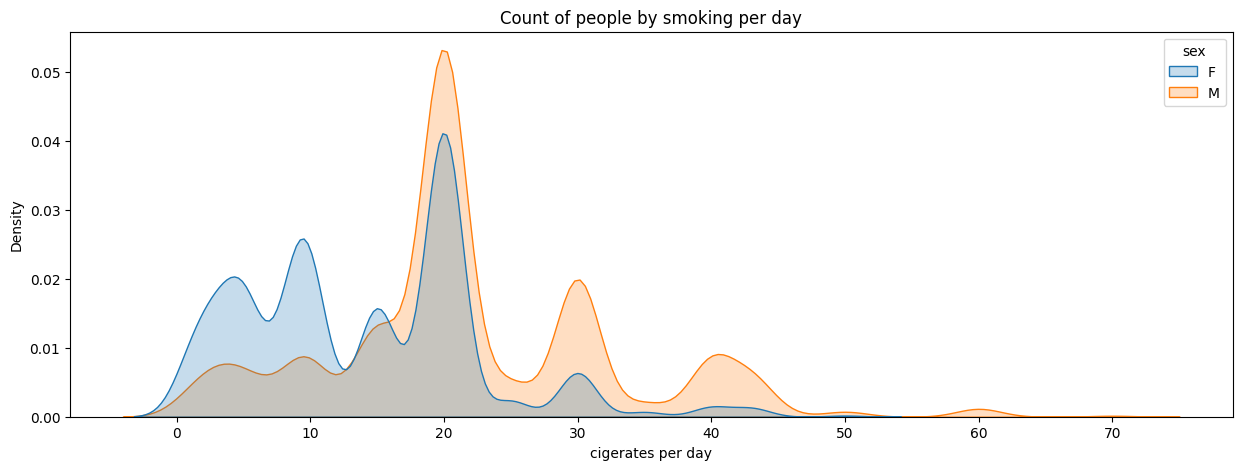

In [ ]:
# Chart - 5C visualization code
# KDE plot
sns.kdeplot(data = dataset_smokers,x = 'cigsPerDay', hue = 'sex',bw_adjust = .6,fill = True)
plt.title("Count of people by smoking per day")
plt.xlabel("cigerates per day")
plt.ylabel("Density")
plt.show()

From above graphs we can see the males smokes more ciggerates per day.

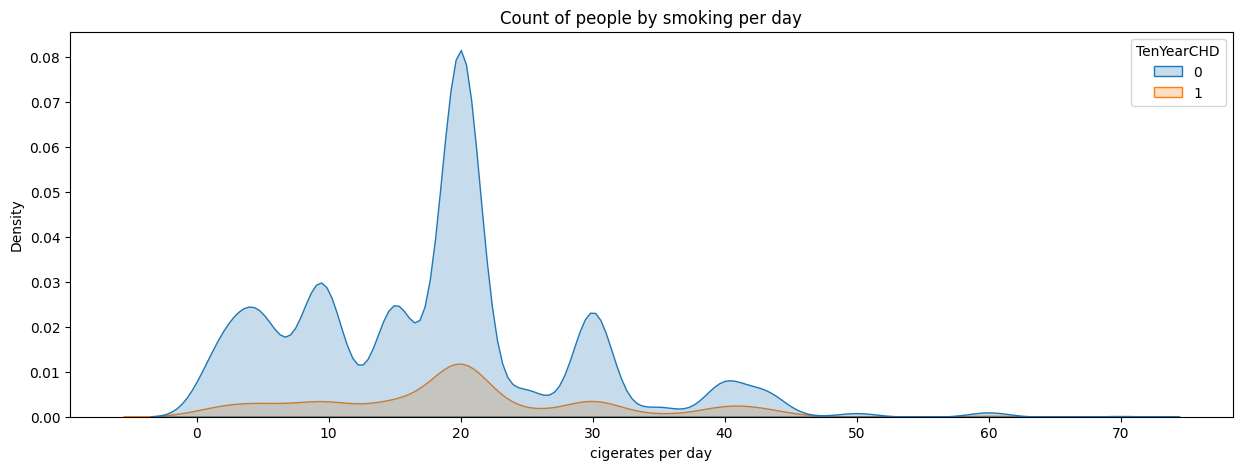

In [ ]:
sns.kdeplot(data = dataset_smokers,x = 'cigsPerDay', hue = 'TenYearCHD',bw_adjust = .6,fill = True)
plt.title("Count of people by smoking per day")
plt.xlabel("cigerates per day")
plt.ylabel("Density")
plt.show()

above error is due imbalance dataset. that is count should not done the bases of TenYearCHD

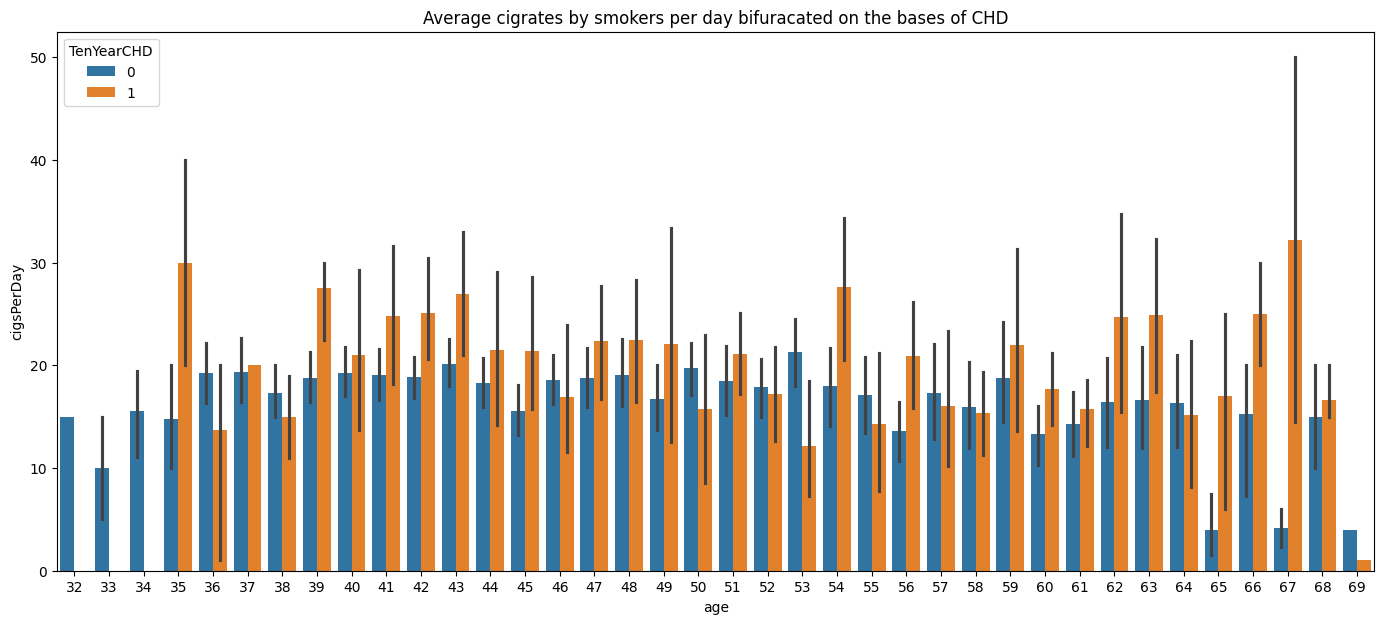

In [ ]:
#impact of cigerates per day on CHD
plt.figure(figsize=(17,7))
sns.barplot(data = dataset_smokers,x = 'age',y = 'cigsPerDay',hue = 'TenYearCHD')
plt.title('Average cigrates by smokers per day bifuracated on the bases of CHD')
plt.show()

From above graph we can see that people suffering from CHD smokes more cig per day that the people who are not suffering from CHD

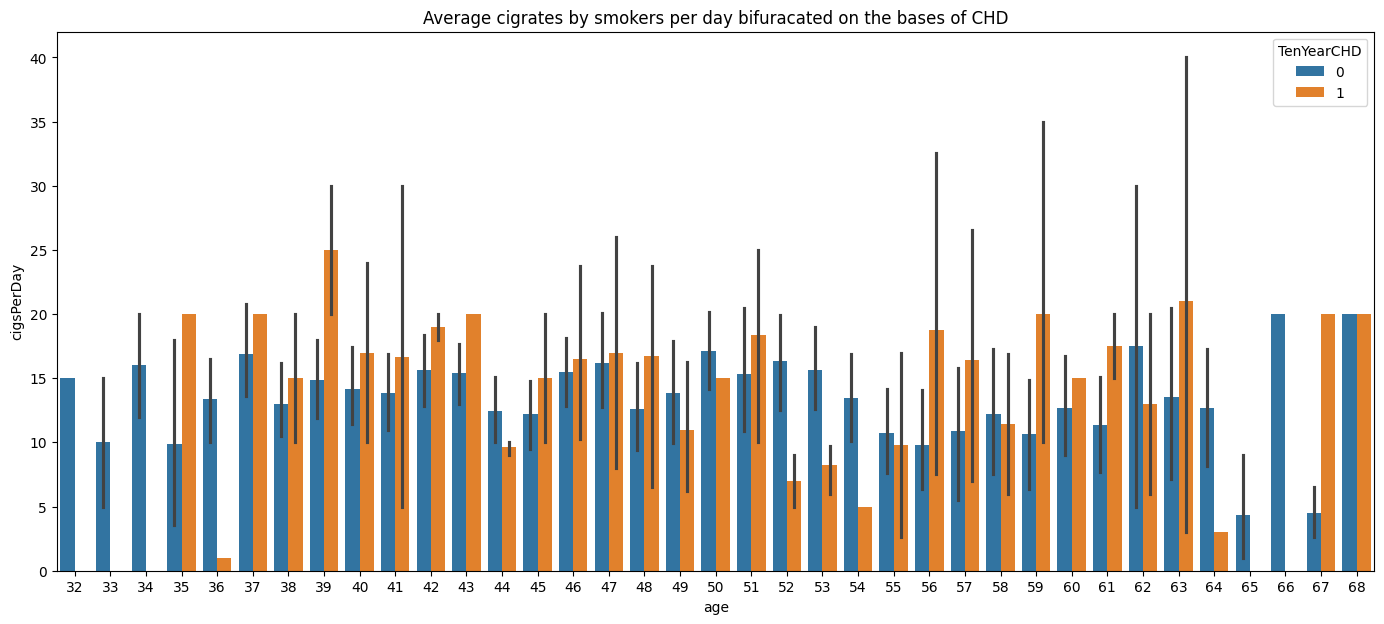

In [ ]:
#for females only
dataset_smokers_F = dataset_smokers[dataset_smokers['sex'] == 'F']
plt.figure(figsize=(17,7))
sns.barplot(data = dataset_smokers_F,x = 'age',y = 'cigsPerDay',hue = 'TenYearCHD')
plt.title('Average cigrates by smokers per day bifuracated on the bases of CHD')
plt.show()

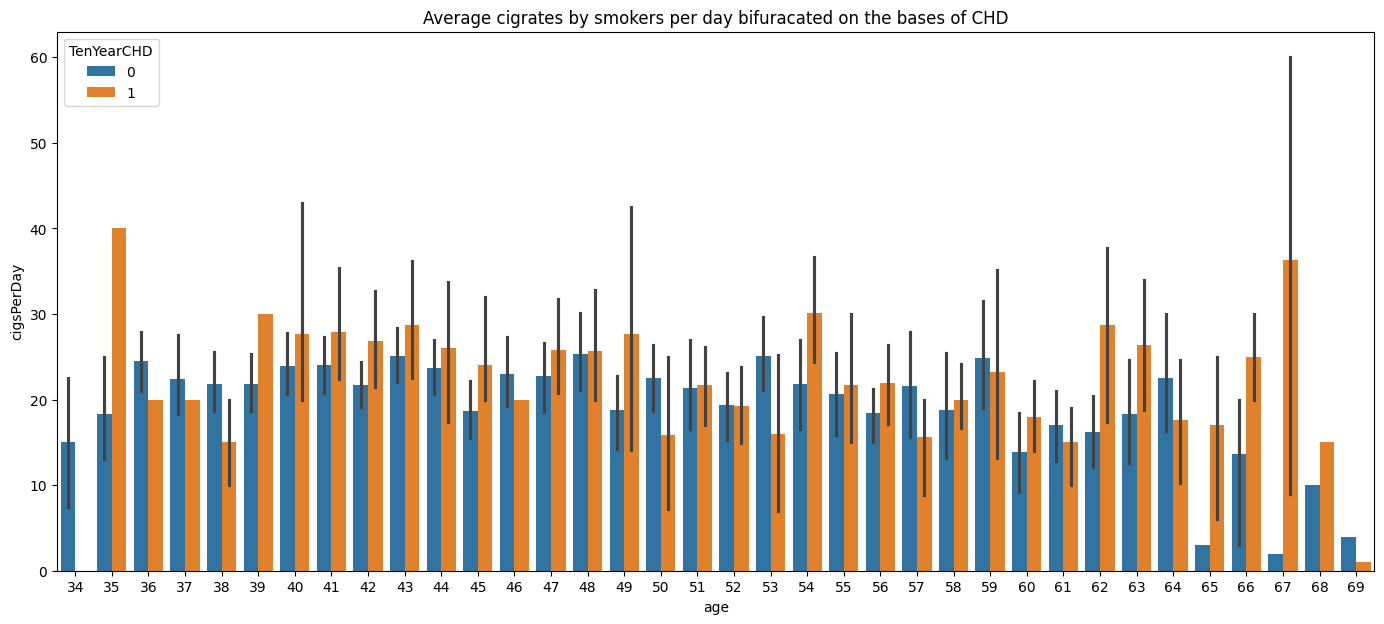

In [ ]:
#for Males only
dataset_smokers_M = dataset_smokers[dataset_smokers['sex'] == 'M']
plt.figure(figsize=(17,7))
sns.barplot(data = dataset_smokers_M,x = 'age',y = 'cigsPerDay',hue = 'TenYearCHD')
plt.title('Average cigrates by smokers per day bifuracated on the bases of CHD')
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts should be used when you are showing segments of information. Vertical bar charts are useful to compare different categorical or discrete variables, such as age groups, classes, schools, etc., as long as there are not too many categories to compare

##### 2. What is/are the insight(s) found from the chart?

from our chart we can see that during specific hours of the demand is very high.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 During peak hours, Business can increase the rent price to generate more revanue And also can increase the availibilty of rented bikes.

#### Chart - 6 Analysing 'BPMeds'

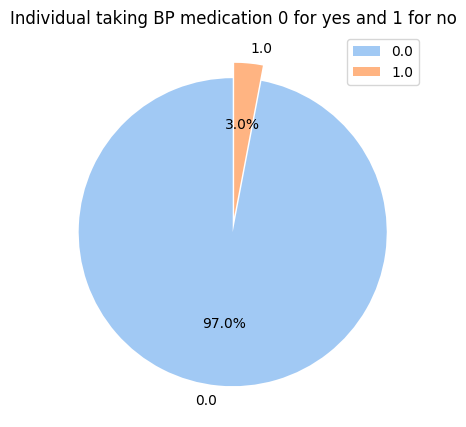

In [ ]:
# Chart - 6 visualization code
x = dataset['BPMeds'].value_counts().index
y = dataset['BPMeds'].value_counts().values
explode = [0.05,0.05]

plt.pie(y,labels = x,autopct='%1.1f%%',explode = explode, startangle=90, colors=sns.color_palette("pastel"))
plt.title("Individual taking BP medication 0 for yes and 1 for no")
plt.legend()
plt.show()

In [ ]:
#check how may of tenCHD is affected by BP
#effect of age on BP

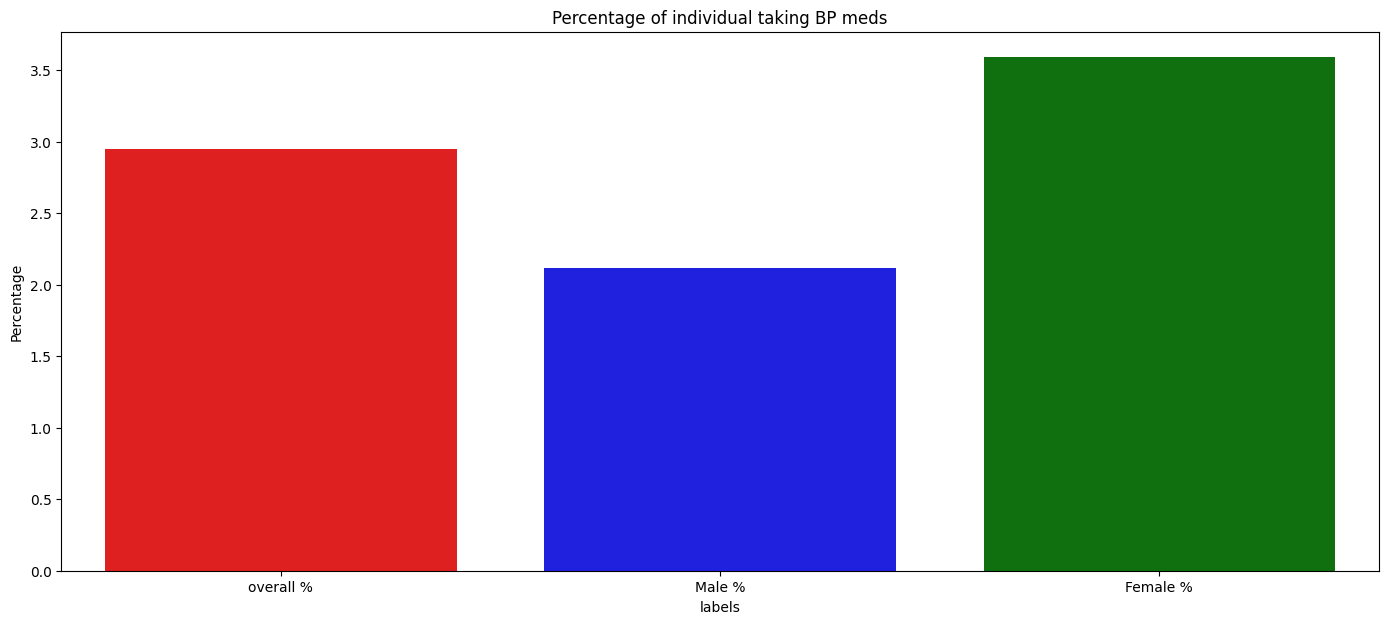

In [ ]:
#Check which gender is affeteced by BP more
#hence data is unbalanced and  we more females we can just take the count prefer percentage
labels = ['overall %','Male %','Female %']
overall_per =  100*(len(dataset[dataset['BPMeds'] == 1])/len(dataset['BPMeds']))
male_per = 100*(len(dataset[(dataset['BPMeds'] == 1) & (dataset['sex'] == 'M')])/len(dataset[(dataset['sex'] == 'M')]))
female_per = 100*(len(dataset[(dataset['BPMeds'] == 1) & (dataset['sex'] == 'F')])/len(dataset[(dataset['sex'] == 'F')]))
y = [overall_per,male_per,female_per]


plt.figure(figsize=(17,7))
sns.barplot(x = labels,y = y ,palette = ['Red','Blue','Green'] )
plt.title('Percentage of individual taking BP meds')
plt.ylabel('Percentage')
plt.xlabel('labels')
plt.show()

Clearly, Females are more affected by BP than males.

The lenth of the data is:  100
Null values among them are:  0
Total number of CHD:  33


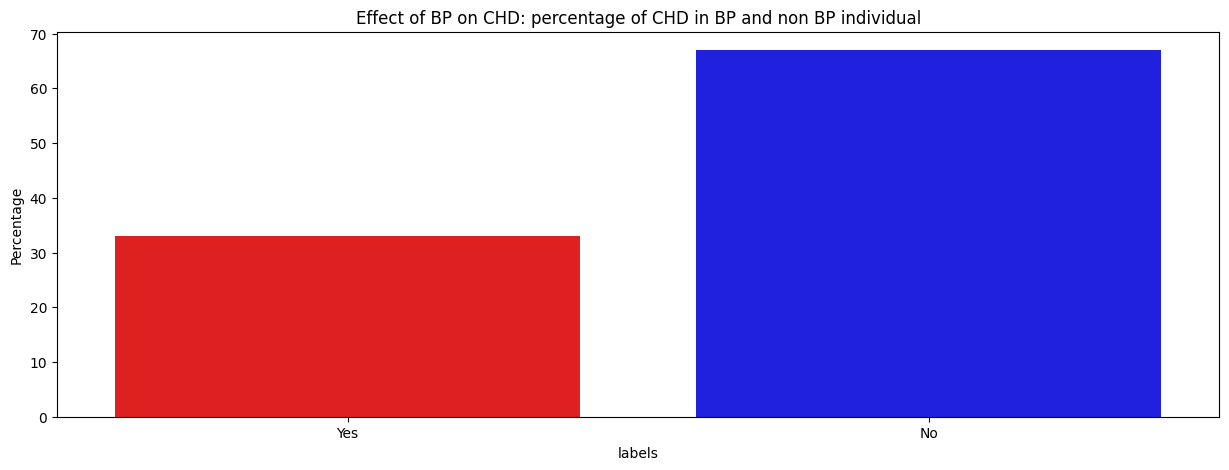

In [ ]:
#Check how tenCHD is occuring in case of BP
label = ['Yes','No']

dataBP = dataset[dataset['BPMeds'] == 1]
print("The lenth of the data is: ", len(dataBP['BPMeds']))
print("Null values among them are: ", (dataBP['BPMeds'].isnull().sum()))
print("Total number of CHD: ", len(dataBP[dataBP['TenYearCHD']==1]))

yes = (len(dataBP[dataBP['TenYearCHD']==1]) / len(dataBP['BPMeds'])) * 100
no = (len(dataBP[dataBP['TenYearCHD']==0]) / len(dataBP['BPMeds'])) * 100
y = [yes,no]

sns.barplot(x = label,y = y , palette = ['Red','Blue'] )
plt.title('Effect of BP on CHD: percentage of CHD in BP and non BP individual')
plt.ylabel('Percentage')
plt.xlabel('labels')
plt.show()

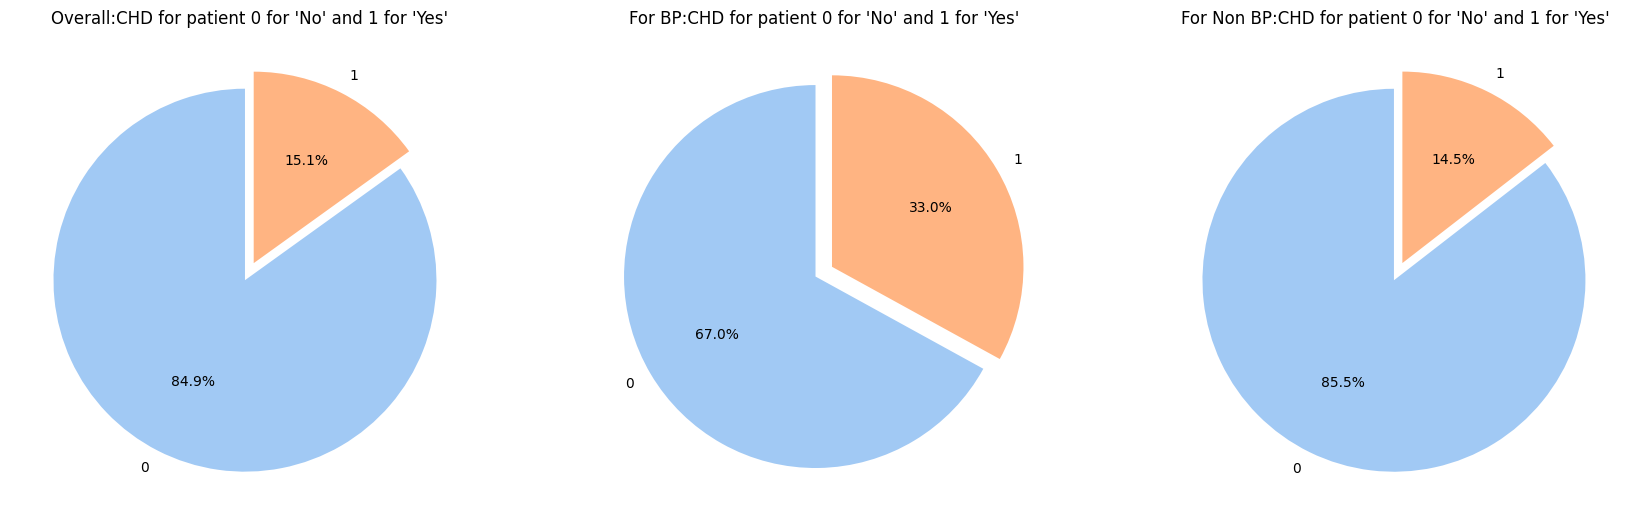

In [ ]:
#How CHD varies in BP,non BP and as overall
plt.figure(figsize=(21,7))


plt.subplot(1,3,1)
x = dataset['TenYearCHD'].value_counts().index
y = dataset['TenYearCHD'].value_counts().values
explode = [0.05,0.05]

plt.pie(y,labels = x,autopct='%1.1f%%',explode = explode, startangle=90, colors=sns.color_palette("pastel"))
plt.title("Overall:CHD for patient 0 for 'No' and 1 for 'Yes'")

plt.subplot(1,3,2)
x = dataBP['TenYearCHD'].value_counts().index
y = dataBP['TenYearCHD'].value_counts().values
explode = [0.05,0.05]
plt.pie(y,labels = x,autopct='%1.1f%%',explode = explode, startangle=90, colors=sns.color_palette("pastel"))
plt.title("For BP:CHD for patient 0 for 'No' and 1 for 'Yes'")

plt.subplot(1,3,3)
datanoBP = dataset[dataset['BPMeds'] == 0]

x = datanoBP['TenYearCHD'].value_counts().index
y = datanoBP['TenYearCHD'].value_counts().values
explode = [0.05,0.05]
plt.pie(y,labels = x,autopct='%1.1f%%',explode = explode, startangle=90, colors=sns.color_palette("pastel"))
plt.title("For Non BP:CHD for patient 0 for 'No' and 1 for 'Yes' ")

plt.show()


Clearly, We can from our data we can infer that BP increases the chance of CHD

##### 1. Why did you pick the specific chart?

Bar plot is also used to check the distribution of our numerical data.

A point plot represents an estimate of central tendency for a numeric variable by the position of the dot and provides some indication of the uncertainty around that estimate using error bars.

Point plots can be more useful than bar plots for focusing comparisons between different levels of one or more categorical variables. They are particularly adept at showing interactions: how the relationship between levels of one categorical variable changes across levels of a second categorical variable. The lines that join each point from the same hue level allow interactions to be judged by differences in slope, which is easier for the eyes than comparing the heights of several groups of points or bars.

##### 2. What is/are the insight(s) found from the chart?

From above chart we can conclude on Holidays demand is more smooth. We can also conclude we can see a sudden surge in demand during No Holidays at specefic hours. which signfies at opening and closing time of most of the offices demand increases.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Demands during peak hours reduced significantly on holidays.

#### Chart - 7 Analysing 'prevalentStroke' : If the patient has stroke history.

In [ ]:
dataset['prevalentStroke'].value_counts()

prevalentStroke
0    3368
1      22
Name: count, dtype: int64

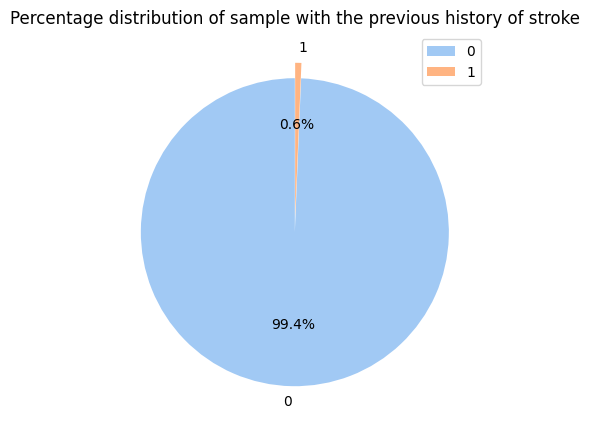

In [ ]:
# Chart - 7  visualization code
x = dataset['prevalentStroke'].value_counts().index
y = dataset['prevalentStroke'].value_counts().values
explode = [0.05,0.05]

plt.pie(y,labels = x,autopct='%1.1f%%',explode = explode, startangle=90, colors=sns.color_palette("pastel"))
plt.title("Percentage distribution of sample with the previous history of stroke")
plt.legend()
plt.show()

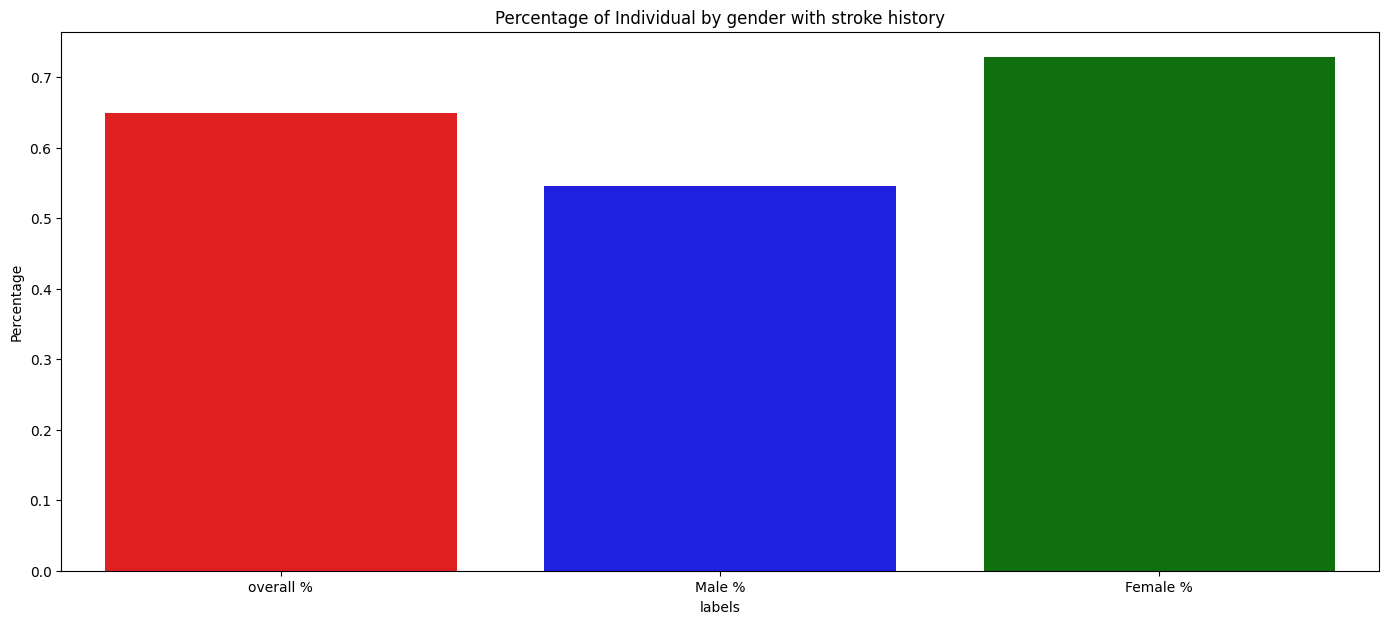

In [ ]:
#Check which gender is affeteced by history of stroke
#hence data is unbalanced and  we more females we can just take the count prefer percentage
labels = ['overall %','Male %','Female %']
overall_per =  100*(len(dataset[dataset['prevalentStroke'] == 1])/len(dataset['prevalentStroke']))
male_per = 100*(len(dataset[(dataset['prevalentStroke'] == 1) & (dataset['sex'] == 'M')])/len(dataset[(dataset['sex'] == 'M')]))
female_per = 100*(len(dataset[(dataset['prevalentStroke'] == 1) & (dataset['sex'] == 'F')])/len(dataset[(dataset['sex'] == 'F')]))
y = [overall_per,male_per,female_per]


plt.figure(figsize=(17,7))
sns.barplot(x = labels,y = y ,palette = ['Red','Blue','Green'] )
plt.title('Percentage of Individual by gender with stroke history')
plt.ylabel('Percentage')
plt.xlabel('labels')
plt.show()

We can see that the stroke history in females is more than male

The lenth of the data is:  22
Null values among them are:  0
Total number of CHD:  10


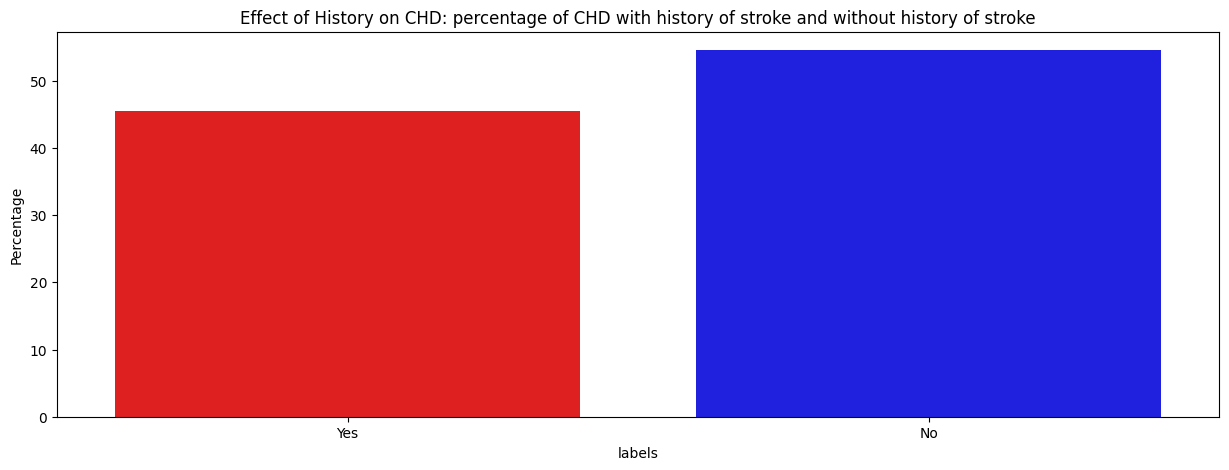

In [ ]:
#Check how tenCHD is occuring in case of BP
label = ['Yes','No']

datastroke = dataset[dataset['prevalentStroke'] == 1]
print("The lenth of the data is: ", len(datastroke['prevalentStroke']))
print("Null values among them are: ", (datastroke['prevalentStroke'].isnull().sum()))
print("Total number of CHD: ", len(datastroke[datastroke['TenYearCHD']==1]))

yes = (len(datastroke[datastroke['TenYearCHD']==1]) / len(datastroke['prevalentStroke'])) * 100
no = (len(datastroke[datastroke['TenYearCHD']==0]) / len(datastroke['prevalentStroke'])) * 100
y = [yes,no]

sns.barplot(x = label,y = y , palette = ['Red','Blue'] )
plt.title('Effect of History on CHD: percentage of CHD with history of stroke and without history of stroke')
plt.ylabel('Percentage')
plt.xlabel('labels')
plt.show()

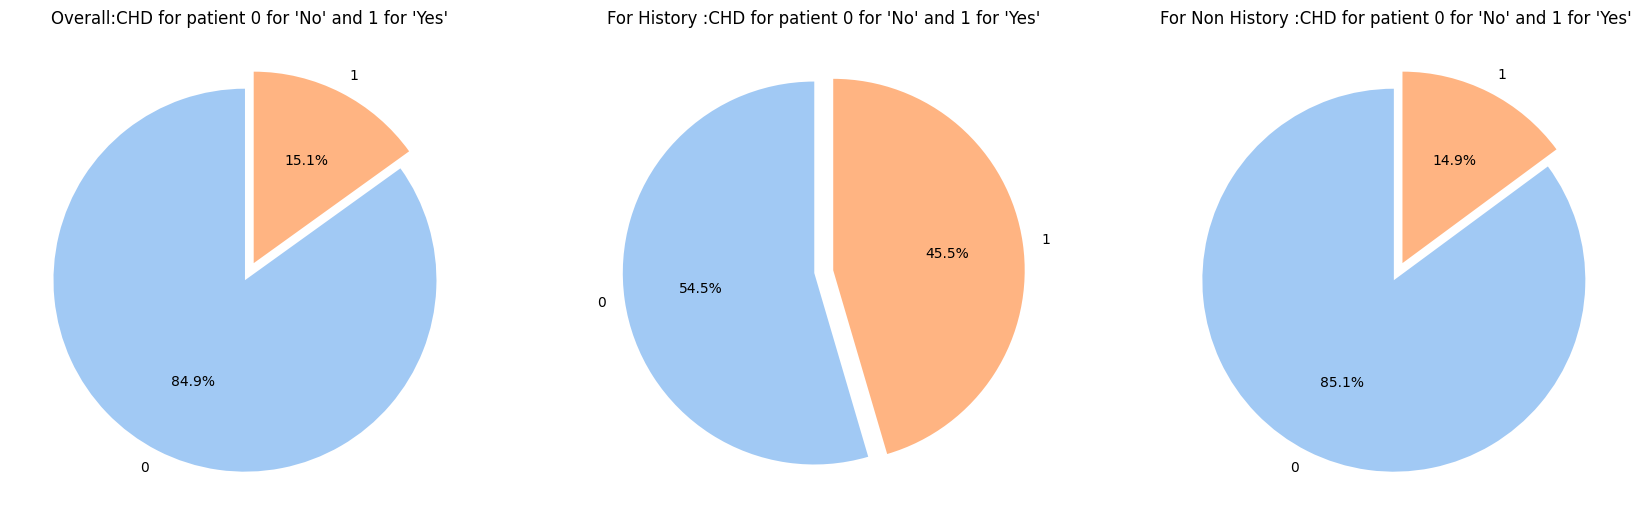

In [ ]:
#How CHD varies in BP,non BP and as overall
plt.figure(figsize=(21,7))


plt.subplot(1,3,1)
x = dataset['TenYearCHD'].value_counts().index
y = dataset['TenYearCHD'].value_counts().values
explode = [0.05,0.05]

plt.pie(y,labels = x,autopct='%1.1f%%',explode = explode, startangle=90, colors=sns.color_palette("pastel"))
plt.title("Overall:CHD for patient 0 for 'No' and 1 for 'Yes'")

plt.subplot(1,3,2)
x = datastroke['TenYearCHD'].value_counts().index
y = datastroke['TenYearCHD'].value_counts().values
explode = [0.05,0.05]
plt.pie(y,labels = x,autopct='%1.1f%%',explode = explode, startangle=90, colors=sns.color_palette("pastel"))
plt.title("For History :CHD for patient 0 for 'No' and 1 for 'Yes'")

plt.subplot(1,3,3)
datanosrtoke = dataset[dataset['prevalentStroke'] == 0]

x = datanosrtoke['TenYearCHD'].value_counts().index
y = datanosrtoke['TenYearCHD'].value_counts().values
explode = [0.05,0.05]
plt.pie(y,labels = x,autopct='%1.1f%%',explode = explode, startangle=90, colors=sns.color_palette("pastel"))
plt.title("For Non History :CHD for patient 0 for 'No' and 1 for 'Yes' ")

plt.show()

We can observe that, when individuals have stroke history there 45.5% chances of future CHD.

##### 1. Why did you pick the specific chart?

Bar plot is also used to check the distribution of our numerical data.

##### 2. What is/are the insight(s) found from the chart?

On Non functional day, No bookings were made which is obvious. It will create my model Bias. we will remove it in our model 2.

#### Chart - 8 Analysing 'prevalentHyp' : If the patient has history of hypertension.

In [ ]:
dataset['prevalentHyp'].value_counts()

prevalentHyp
0    2321
1    1069
Name: count, dtype: int64

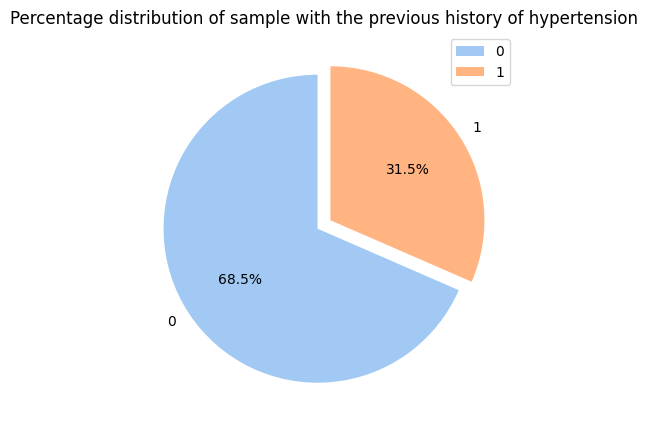

In [ ]:
# Chart - 8  visualization code
x = dataset['prevalentHyp'].value_counts().index
y = dataset['prevalentHyp'].value_counts().values
explode = [0.05,0.05]

plt.pie(y,labels = x,autopct='%1.1f%%',explode = explode, startangle=90, colors=sns.color_palette("pastel"))
plt.title("Percentage distribution of sample with the previous history of hypertension")
plt.legend()
plt.show()

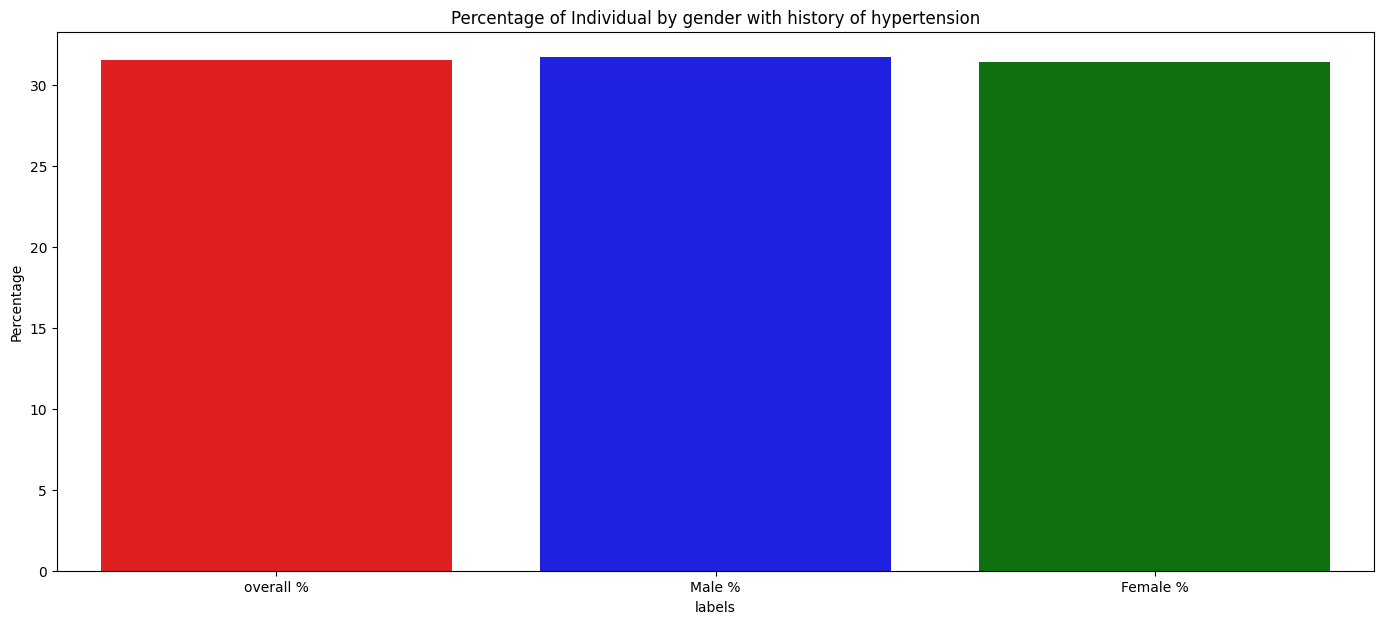

In [ ]:
#Check which gender is affeteced by history of stroke
#hence data is unbalanced and  we more females we can just take the count prefer percentage
labels = ['overall %','Male %','Female %']
overall_per =  100*(len(dataset[dataset['prevalentHyp'] == 1])/len(dataset['prevalentHyp']))
male_per = 100*(len(dataset[(dataset['prevalentHyp'] == 1) & (dataset['sex'] == 'M')])/len(dataset[(dataset['sex'] == 'M')]))
female_per = 100*(len(dataset[(dataset['prevalentHyp'] == 1) & (dataset['sex'] == 'F')])/len(dataset[(dataset['sex'] == 'F')]))
y = [overall_per,male_per,female_per]


plt.figure(figsize=(17,7))
sns.barplot(x = labels,y = y ,palette = ['Red','Blue','Green'] )
plt.title('Percentage of Individual by gender with history of hypertension')
plt.ylabel('Percentage')
plt.xlabel('labels')
plt.show()

We can see that distribution is almost same in both male and female

The lenth of the data is:  1069
Null values among them are:  0
Total number of CHD:  255


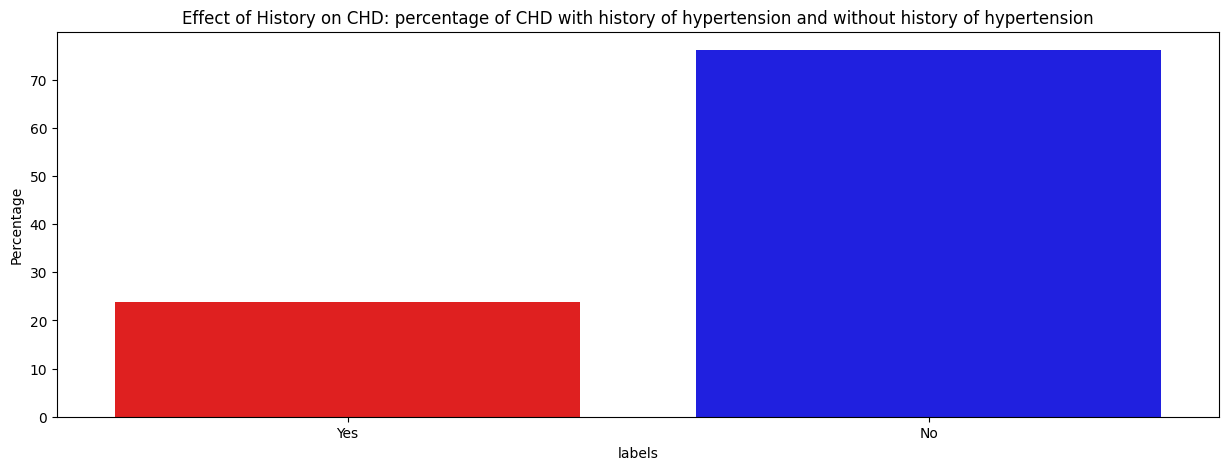

In [ ]:
#Check how tenCHD is occuring in case of Hypertension
label = ['Yes','No']

datahypertension = dataset[dataset['prevalentHyp'] == 1]
print("The lenth of the data is: ", len(datahypertension ['prevalentHyp']))
print("Null values among them are: ", (datahypertension ['prevalentHyp'].isnull().sum()))
print("Total number of CHD: ", len(datahypertension [datahypertension ['TenYearCHD']==1]))

yes = (len(datahypertension[datahypertension['TenYearCHD']==1]) / len(datahypertension['prevalentHyp'])) * 100
no = (len(datahypertension[datahypertension['TenYearCHD']==0]) / len(datahypertension['prevalentHyp'])) * 100
y = [yes,no]

sns.barplot(x = label,y = y , palette = ['Red','Blue'] )
plt.title('Effect of History on CHD: percentage of CHD with history of hypertension and without history of hypertension')
plt.ylabel('Percentage')
plt.xlabel('labels')
plt.show()

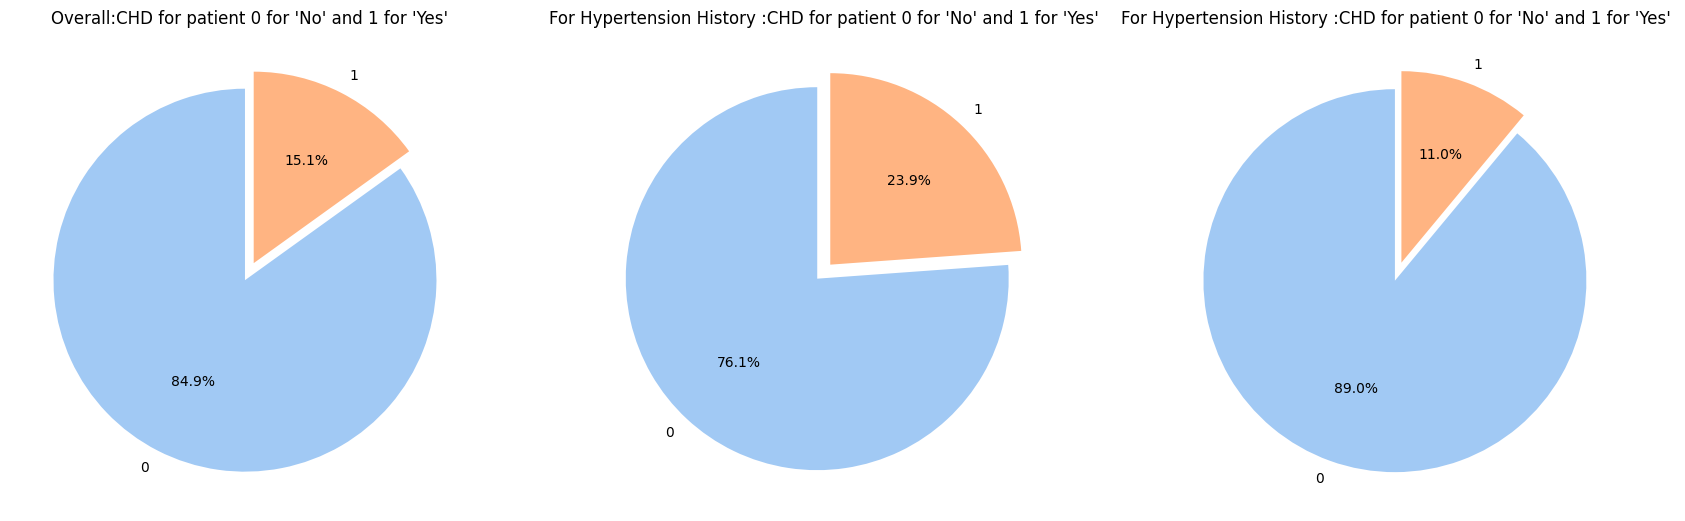

In [ ]:
#How CHD varies in Hypertension,not hypertension and as overall
plt.figure(figsize=(21,7))


plt.subplot(1,3,1)
x = dataset['TenYearCHD'].value_counts().index
y = dataset['TenYearCHD'].value_counts().values
explode = [0.05,0.05]

plt.pie(y,labels = x,autopct='%1.1f%%',explode = explode, startangle=90, colors=sns.color_palette("pastel"))
plt.title("Overall:CHD for patient 0 for 'No' and 1 for 'Yes'")

plt.subplot(1,3,2)
x = datahypertension['TenYearCHD'].value_counts().index
y = datahypertension['TenYearCHD'].value_counts().values
explode = [0.05,0.05]
plt.pie(y,labels = x,autopct='%1.1f%%',explode = explode, startangle=90, colors=sns.color_palette("pastel"))
plt.title("For Hypertension History :CHD for patient 0 for 'No' and 1 for 'Yes'")

plt.subplot(1,3,3)
datanodatahypertension = dataset[dataset['prevalentHyp'] == 0]

x = datanodatahypertension['TenYearCHD'].value_counts().index
y = datanodatahypertension['TenYearCHD'].value_counts().values
explode = [0.05,0.05]
plt.pie(y,labels = x,autopct='%1.1f%%',explode = explode, startangle=90, colors=sns.color_palette("pastel"))
plt.title("For Hypertension History :CHD for patient 0 for 'No' and 1 for 'Yes' ")

plt.show()

We can infer from the above graphs that in case of History hypertension, chances are double for CHD than it is in History without of  hypertension.

In [ ]:
#relation between BPmeds and hypertension
#relation between previous stroke and hypertension

##### 1. Why did you pick the specific chart?

Bar plot is also used to check the distribution of our numerical data.

A point plot represents an estimate of central tendency for a numeric variable by the position of the dot and provides some indication of the uncertainty around that estimate using error bars.

Point plots can be more useful than bar plots for focusing comparisons between different levels of one or more categorical variables. They are particularly adept at showing interactions: how the relationship between levels of one categorical variable changes across levels of a second categorical variable. The lines that join each point from the same hue level allow interactions to be judged by differences in slope, which is easier for the eyes than comparing the heights of several groups of points or bars.

##### 2. What is/are the insight(s) found from the chart?

least booking are observed in winter season where as most bookings are occurend in summers. Distribution of bookings with respect to Hours are same for 'Autumn', 'Spring', 'Summer' and slightly different for 'Winters'.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Availability should be more in summer season and during winters few bikes can be used for different purpose to optimize the profit.

#### Chart - 9 Analysing 'Diabetes' : Pateint has diabetes or not.

In [ ]:
dataset['diabetes'].value_counts()

diabetes
0    3303
1      87
Name: count, dtype: int64

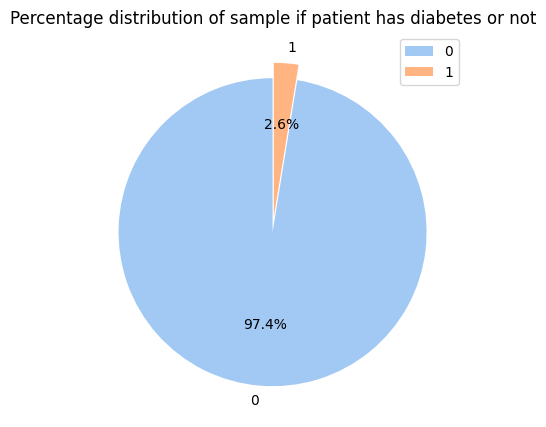

In [ ]:
# Chart - 9  visualization code
x = dataset['diabetes'].value_counts().index
y = dataset['diabetes'].value_counts().values
explode = [0.05,0.05]

plt.pie(y,labels = x,autopct='%1.1f%%',explode = explode, startangle=90, colors=sns.color_palette("pastel"))
plt.title("Percentage distribution of sample if patient has diabetes or not")
plt.legend()
plt.show()

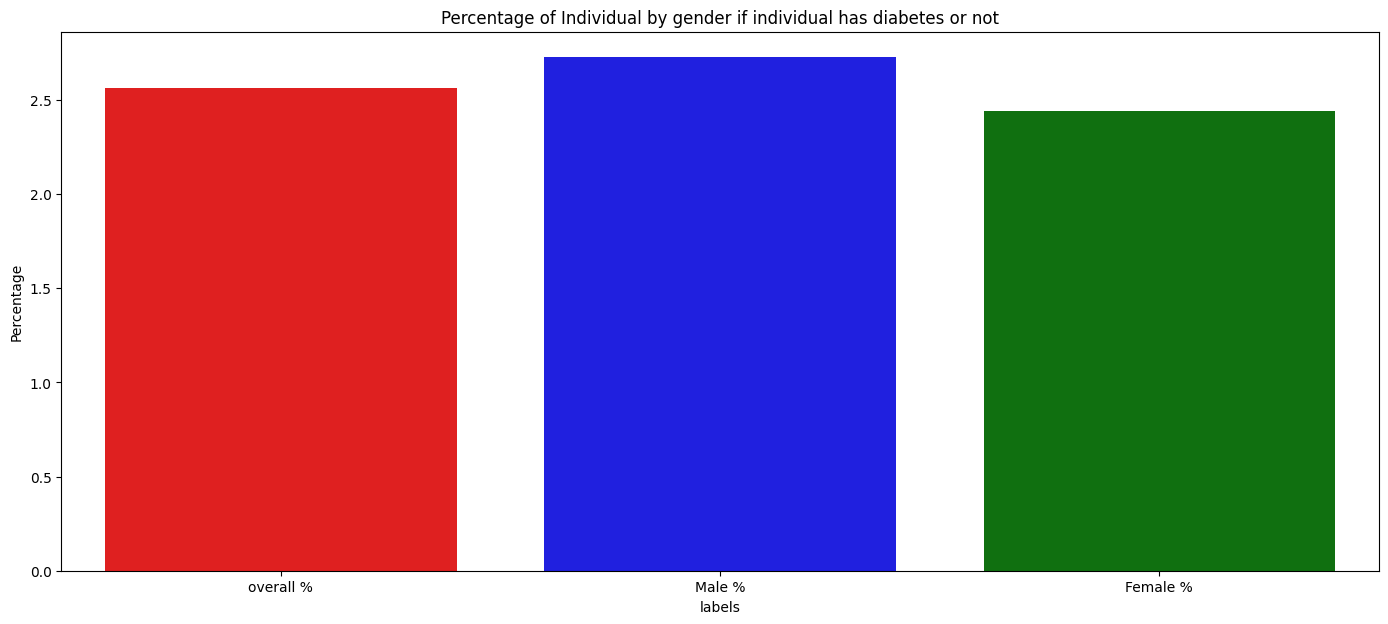

In [ ]:
#Check which gender is affeteced by Diabetes
#hence data is unbalanced and  we more females we can just take the count prefer percentage
labels = ['overall %','Male %','Female %']
overall_per =  100*(len(dataset[dataset['diabetes'] == 1])/len(dataset['diabetes']))
male_per = 100*(len(dataset[(dataset['diabetes'] == 1) & (dataset['sex'] == 'M')])/len(dataset[(dataset['sex'] == 'M')]))
female_per = 100*(len(dataset[(dataset['diabetes'] == 1) & (dataset['sex'] == 'F')])/len(dataset[(dataset['sex'] == 'F')]))
y = [overall_per,male_per,female_per]


plt.figure(figsize=(17,7))
sns.barplot(x = labels,y = y ,palette = ['Red','Blue','Green'] )
plt.title('Percentage of Individual by gender if individual has diabetes or not')
plt.ylabel('Percentage')
plt.xlabel('labels')
plt.show()

Data is almost balance, Both the genders have same percentage of diabetes patient

The lenth of the data is:  87
Null values among them are:  0
Total number of CHD:  33


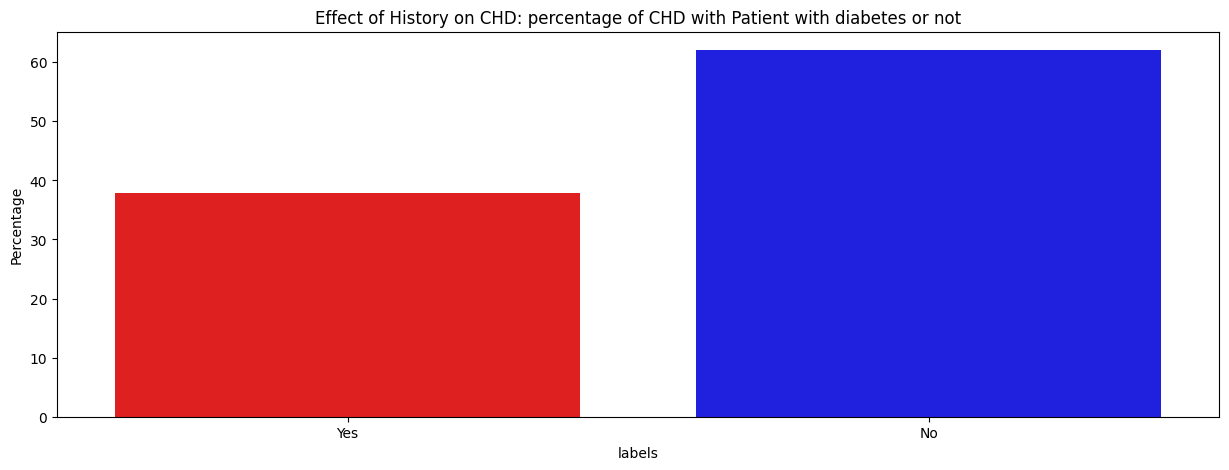

In [ ]:
#Check how tenCHD is occuring in case of Diabets
label = ['Yes','No']

datadia = dataset[dataset['diabetes'] == 1]
print("The lenth of the data is: ", len(datadia['diabetes']))
print("Null values among them are: ", (datadia ['diabetes'].isnull().sum()))
print("Total number of CHD: ", len(datadia [datadia ['TenYearCHD']==1]))

yes = (len(datadia[datadia['TenYearCHD']==1]) / len(datadia['prevalentHyp'])) * 100
no = (len(datadia[datadia['TenYearCHD']==0]) / len(datadia['prevalentHyp'])) * 100
y = [yes,no]

sns.barplot(x = label,y = y , palette = ['Red','Blue'] )
plt.title('Effect of History on CHD: percentage of CHD with Patient with diabetes or not')
plt.ylabel('Percentage')
plt.xlabel('labels')
plt.show()

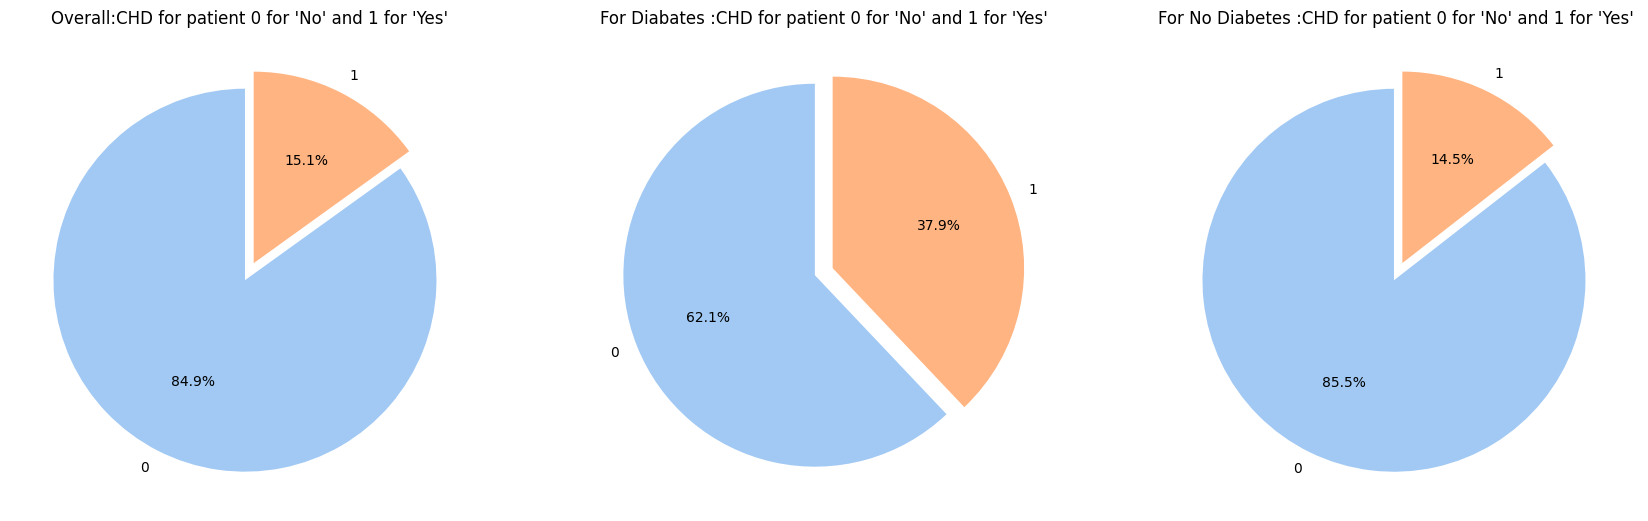

In [ ]:
#How CHD varies in Diabates
plt.figure(figsize=(21,7))


plt.subplot(1,3,1)
x = dataset['TenYearCHD'].value_counts().index
y = dataset['TenYearCHD'].value_counts().values
explode = [0.05,0.05]

plt.pie(y,labels = x,autopct='%1.1f%%',explode = explode, startangle=90, colors=sns.color_palette("pastel"))
plt.title("Overall:CHD for patient 0 for 'No' and 1 for 'Yes'")

plt.subplot(1,3,2)
x = datadia['TenYearCHD'].value_counts().index
y = datadia['TenYearCHD'].value_counts().values
explode = [0.05,0.05]
plt.pie(y,labels = x,autopct='%1.1f%%',explode = explode, startangle=90, colors=sns.color_palette("pastel"))
plt.title("For Diabates :CHD for patient 0 for 'No' and 1 for 'Yes'")

plt.subplot(1,3,3)
datanodia = dataset[dataset['diabetes'] == 0]

x = datanodia['TenYearCHD'].value_counts().index
y = datanodia['TenYearCHD'].value_counts().values
explode = [0.05,0.05]
plt.pie(y,labels = x,autopct='%1.1f%%',explode = explode, startangle=90, colors=sns.color_palette("pastel"))
plt.title("For No Diabetes :CHD for patient 0 for 'No' and 1 for 'Yes' ")

plt.show()

We can clearly see that, Diabetes significantly increases the chances of CHD.

##### 1. Why did you pick the specific chart?

Scatter plots are used to plot data points on a horizontal and a vertical axis in the attempt to show how much one variable is affected by another.

The regression plots in seaborn are primarily intended to add a visual guide that helps to emphasize patterns in a dataset during exploratory data analysis.

Bar plot is also used to check the distribution of our numerical data.



##### 2. What is/are the insight(s) found from the chart?

From regression plot we can analyse that with increase of snowfall , demand decreases but it also shows that when snowfall is more than 4cm the demand becomes negative which is not the possible.

to counter this created a new column with snowfall category and bar chart is ploted over it. this column with one-hot encoding can be used  in our ML model.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

With increase of snowfall, Demand decreases so business can use bikes for different purpose.

#### Chart - 10 Analysing 'totChol' : cholesterol measure

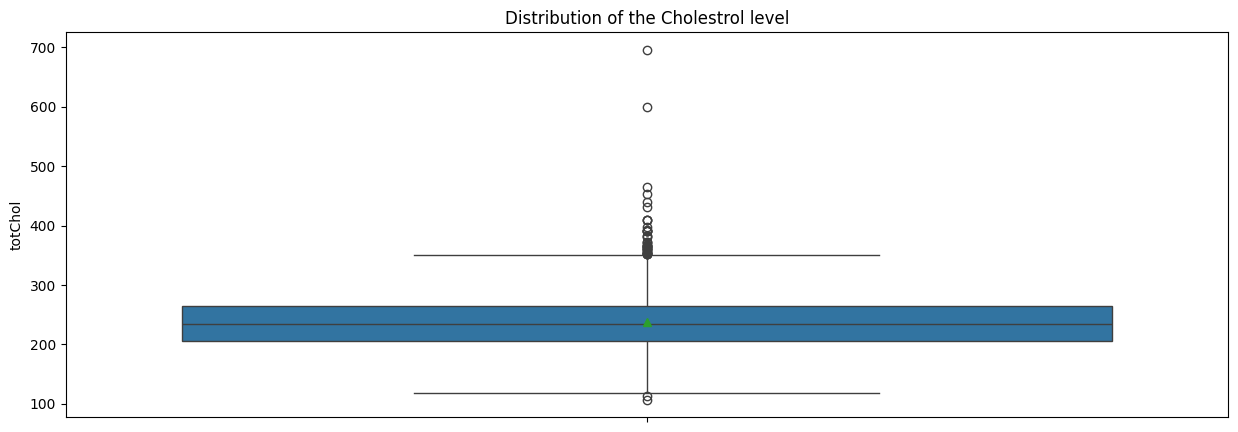

In [ ]:
sns.boxplot(dataset['totChol'],showmeans = True)
plt.title("Distribution of the Cholestrol level")
plt.show()

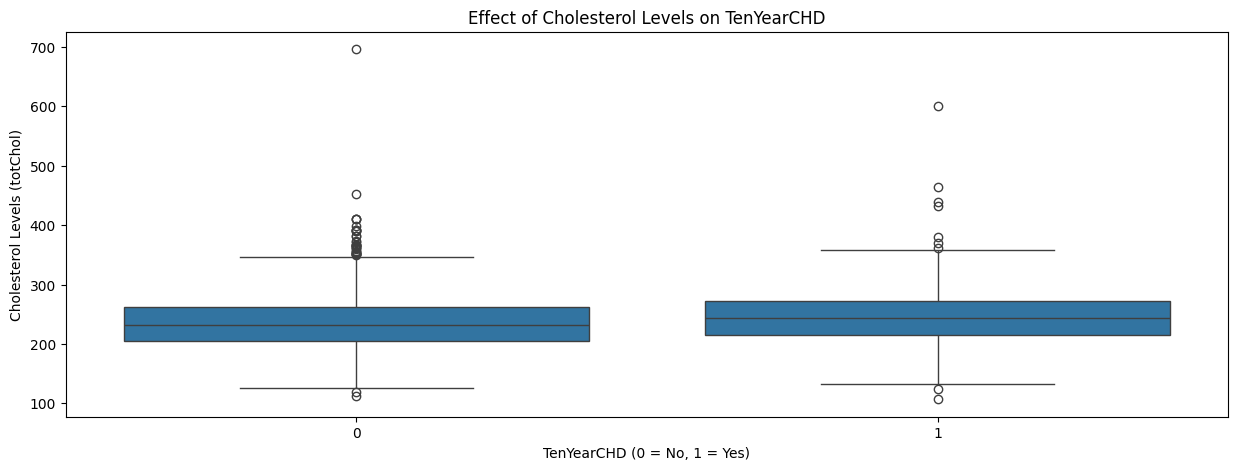

In [ ]:
sns.boxplot(x='TenYearCHD', y='totChol', data=dataset)
plt.title('Effect of Cholesterol Levels on TenYearCHD')
plt.xlabel('TenYearCHD (0 = No, 1 = Yes)')
plt.ylabel('Cholesterol Levels (totChol)')
plt.show()

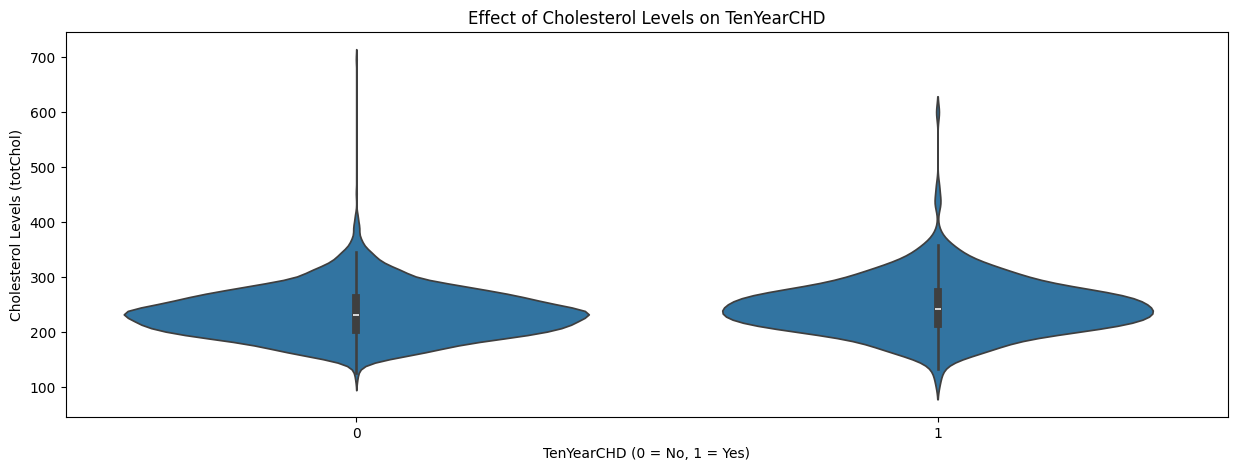

In [ ]:
sns.violinplot(x='TenYearCHD', y='totChol', data=dataset)
plt.title('Effect of Cholesterol Levels on TenYearCHD')
plt.xlabel('TenYearCHD (0 = No, 1 = Yes)')
plt.ylabel('Cholesterol Levels (totChol)')
plt.show()

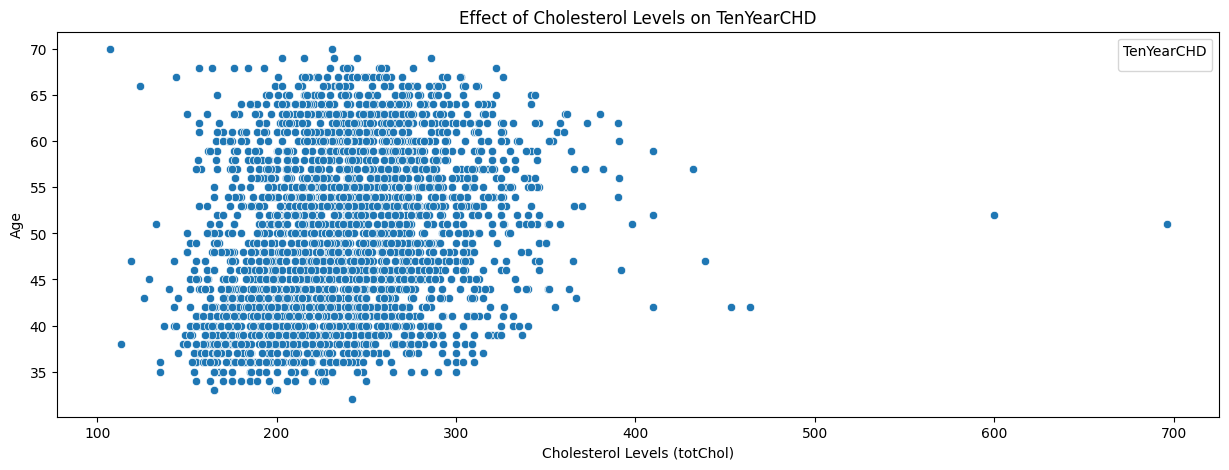

In [ ]:
sns.scatterplot(x='totChol', y='age', data=dataset)
plt.title('Effect of Cholesterol Levels on TenYearCHD')
plt.xlabel('Cholesterol Levels (totChol)')
plt.ylabel('Age')
plt.legend(title='TenYearCHD')
plt.show()


From above graphs we can see that for CHD patient cholestrol level is slighlt more than tha non CHD patient

##### 1. Why did you pick the specific chart?

Scatter plots are used to plot data points on a horizontal and a vertical axis in the attempt to show how much one variable is affected by another.

The regression plots in seaborn are primarily intended to add a visual guide that helps to emphasize patterns in a dataset during exploratory data analysis.

##### 2. What is/are the insight(s) found from the chart?

We can see that Humidity is negatively correlated with Demand with the correlation coeficeint of -0.2 indicating no significant linear relationship between demand and Humidiity

#### Chart - 11 Systolic Blood Pressure (Sys BP):

Definition: The pressure in the arteries when the heart beats and pumps blood.

Normal Range: Generally, less than 120 mmHg is considered normal.



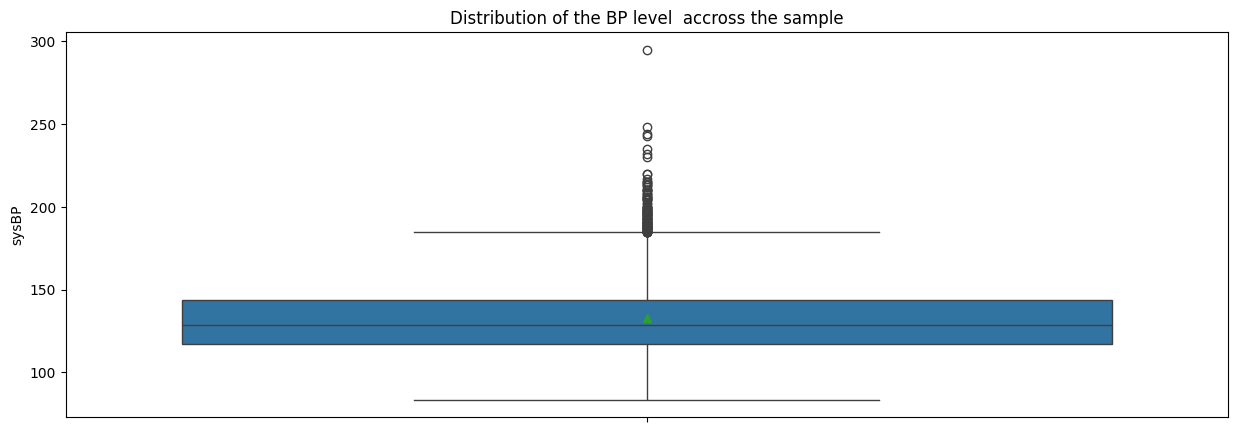

In [ ]:
sns.boxplot(dataset['sysBP'],showmeans = True)
plt.title("Distribution of the BP level  accross the sample")
plt.show()

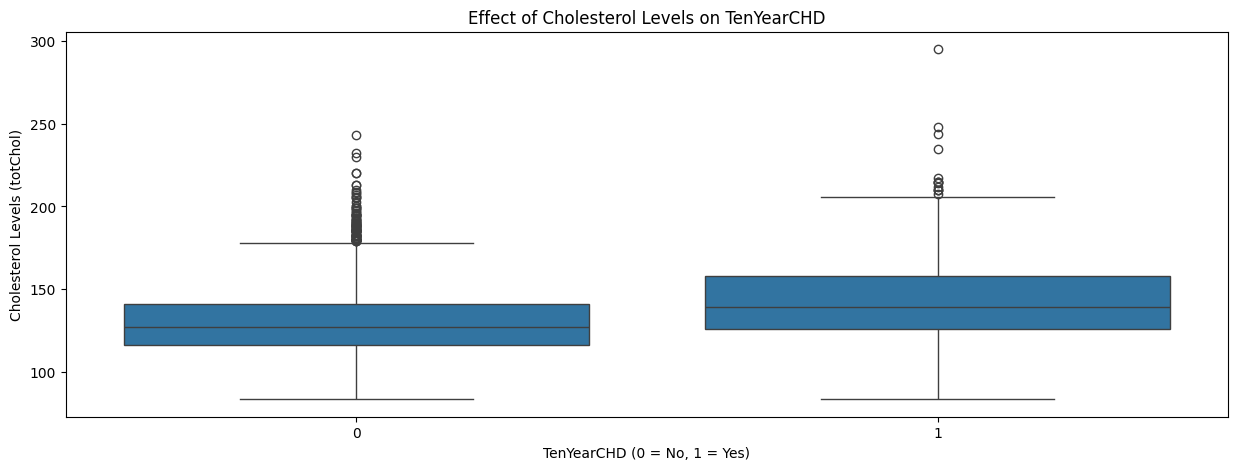

In [ ]:
sns.boxplot(x='TenYearCHD', y='sysBP', data=dataset)
plt.title('Effect of Cholesterol Levels on TenYearCHD')
plt.xlabel('TenYearCHD (0 = No, 1 = Yes)')
plt.ylabel('Cholesterol Levels (totChol)')
plt.show()

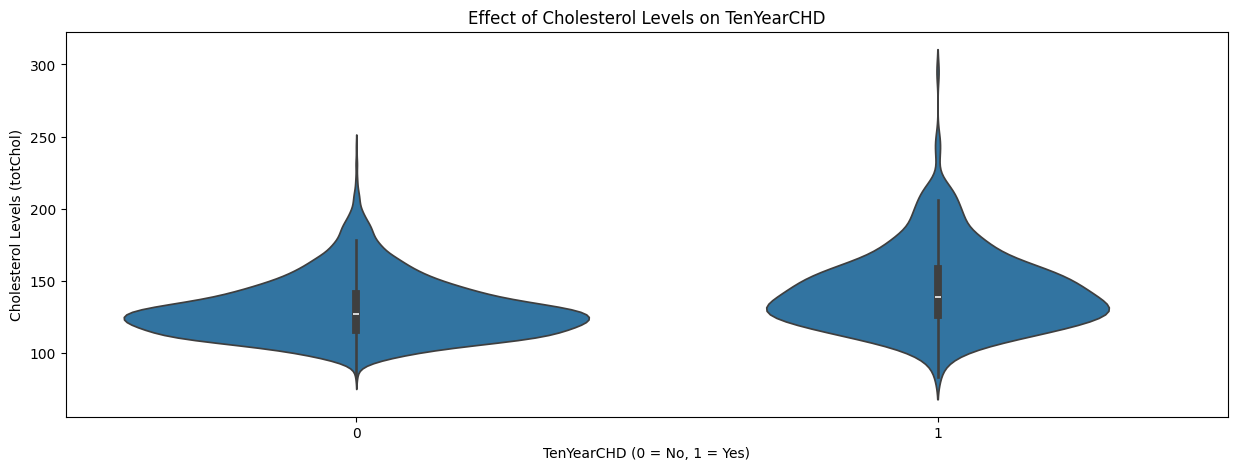

In [ ]:
sns.violinplot(x='TenYearCHD', y='sysBP', data=dataset)
plt.title('Effect of Cholesterol Levels on TenYearCHD')
plt.xlabel('TenYearCHD (0 = No, 1 = Yes)')
plt.ylabel('Cholesterol Levels (totChol)')
plt.show()

We can clearly see that BP level is more CHD patient significanlty.

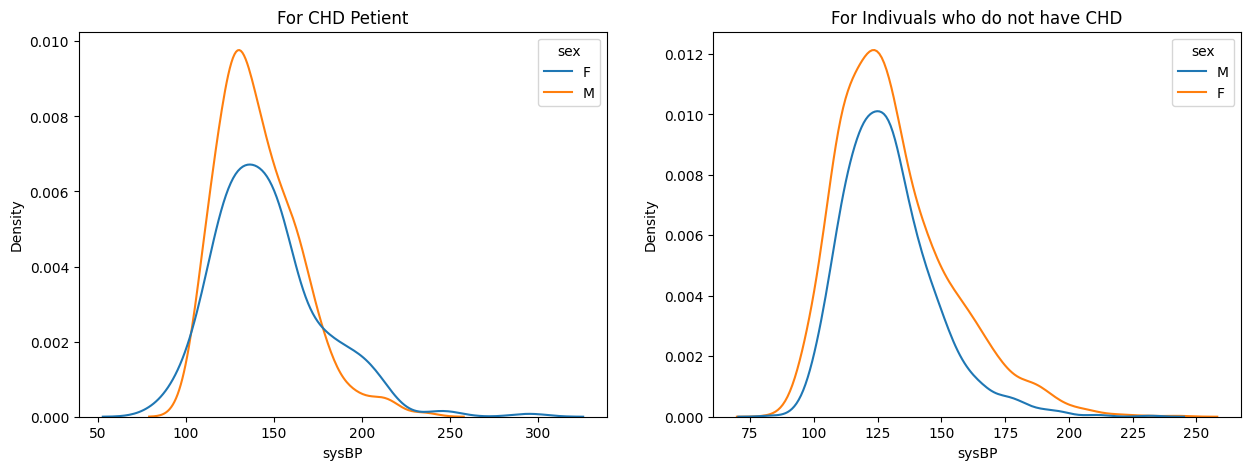

In [ ]:
dataset_CHD = dataset[dataset['TenYearCHD'] == 1]
dataset_no_CHD = dataset[dataset['TenYearCHD'] == 0]


plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.kdeplot(data = dataset_CHD,x = 'sysBP',hue = 'sex')
plt.title('For CHD Petient')

plt.subplot(1,2,2)
sns.kdeplot(data = dataset_no_CHD,x = 'sysBP',hue = 'sex')
plt.title('For Indivuals who do not have CHD')

plt.show()

##### 1. Why did you pick the specific chart?

A histogram is a classic visualization tool that represents the distribution of one or more variables by counting the number of observations that fall within discrete bins.

Scatter plots are used to plot data points on a horizontal and a vertical axis in the attempt to show how much one variable is affected by another.

The regression plots in seaborn are primarily intended to add a visual guide that helps to emphasize patterns in a dataset during exploratory data analysis.

##### 2. What is/are the insight(s) found from the chart?

We can see that windspeed is correlated with Demand with the correlation coeficeint of +.12 indicating no significant linear relationship between demand and windspeed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

No significant relationship between demand and windspeed.

#### Chart - 12 Analysing 'diaBP' : BP measure (lower level)

Diastolic Blood Pressure (Dia BP):

Definition: The pressure in the arteries when the heart is at rest between beats.

Normal Range: Generally, less than 80 mmHg is considered normal.


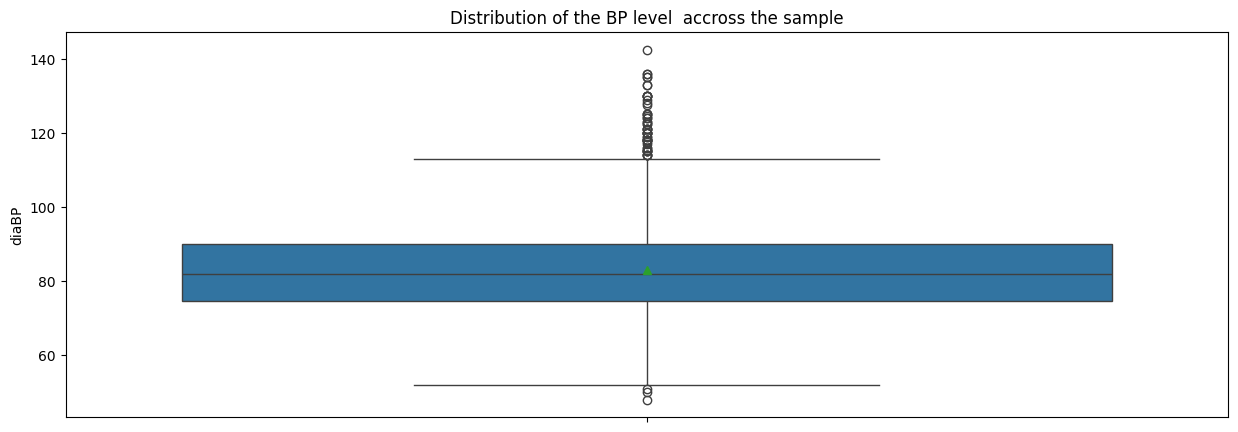

In [ ]:
# Chart - 12 visualization code
sns.boxplot(dataset['diaBP'],showmeans = True)
plt.title("Distribution of the BP level  accross the sample")
plt.show()

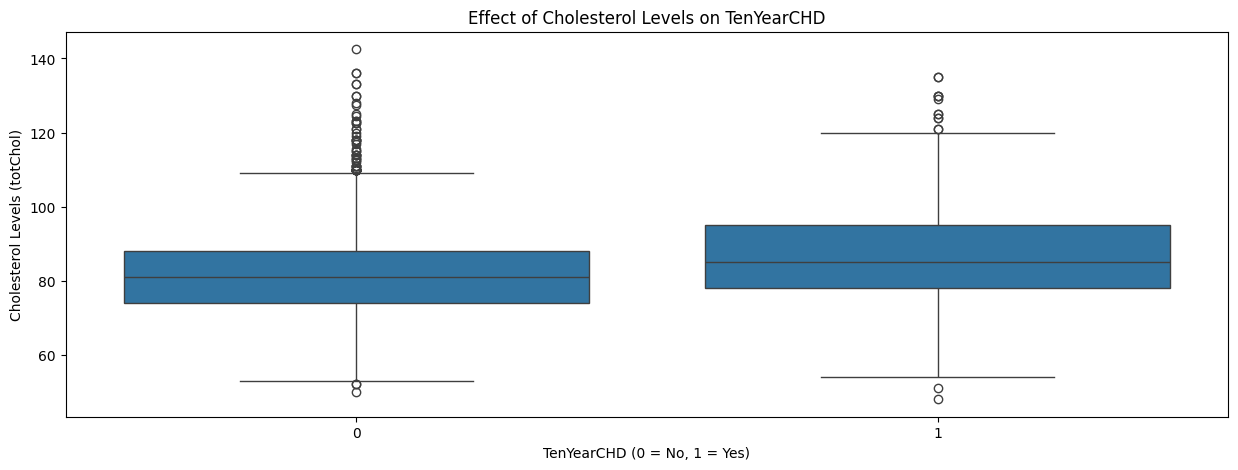

In [ ]:
sns.boxplot(x='TenYearCHD', y='diaBP', data=dataset)
plt.title('Effect of Cholesterol Levels on TenYearCHD')
plt.xlabel('TenYearCHD (0 = No, 1 = Yes)')
plt.ylabel('Cholesterol Levels (totChol)')
plt.show()

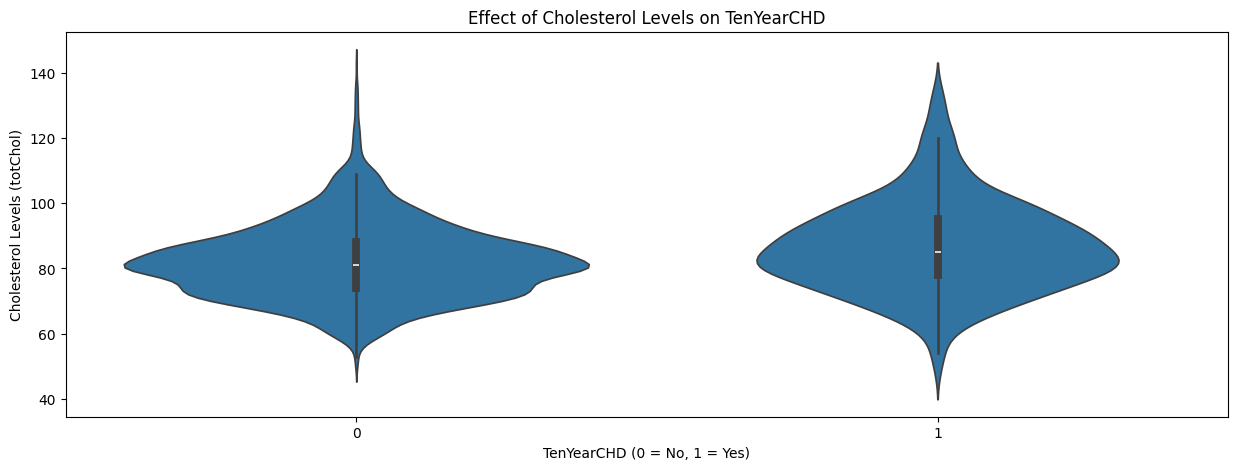

In [ ]:
sns.violinplot(x='TenYearCHD', y='diaBP', data=dataset)
plt.title('Effect of Cholesterol Levels on TenYearCHD')
plt.xlabel('TenYearCHD (0 = No, 1 = Yes)')
plt.ylabel('Cholesterol Levels (totChol)')
plt.show()

We can clearly see that BP level is more CHD patient significanlty.

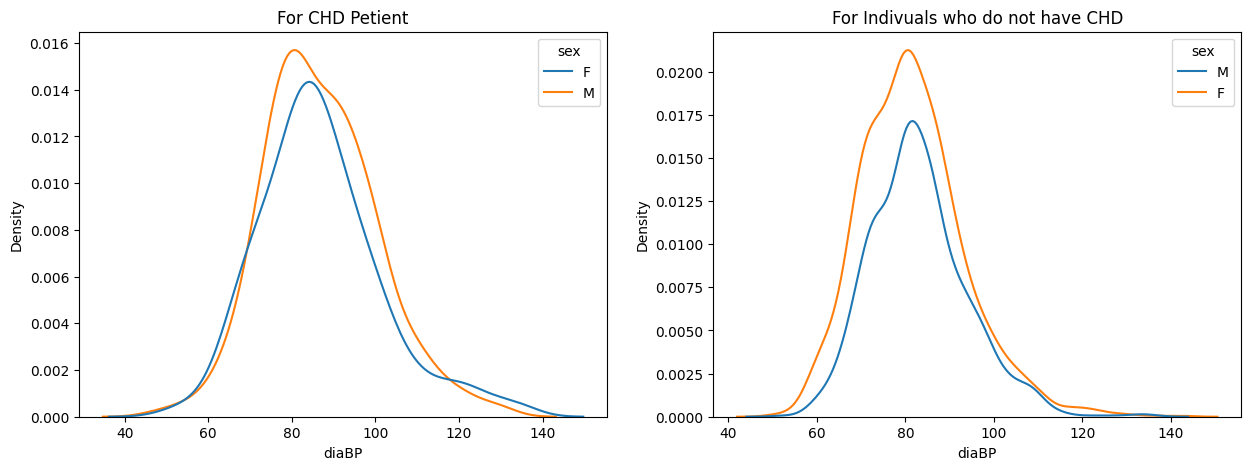

In [ ]:
dataset_CHD = dataset[dataset['TenYearCHD'] == 1]
dataset_no_CHD = dataset[dataset['TenYearCHD'] == 0]


plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.kdeplot(data = dataset_CHD,x = 'diaBP',hue = 'sex')
plt.title('For CHD Petient')

plt.subplot(1,2,2)
sns.kdeplot(data = dataset_no_CHD,x = 'diaBP',hue = 'sex')
plt.title('For Indivuals who do not have CHD')

plt.show()

##### 1. Why did you pick the specific chart?

A histogram is a classic visualization tool that represents the distribution of one or more variables by counting the number of observations that fall within discrete bins.

Scatter plots are used to plot data points on a horizontal and a vertical axis in the attempt to show how much one variable is affected by another.

The regression plots in seaborn are primarily intended to add a visual guide that helps to emphasize patterns in a dataset during exploratory data analysis.

##### 2. What is/are the insight(s) found from the chart?

We can see that Visibility is correlated with Demand with the correlation coeficeint of +.2 indicating no significant linear relationship between demand and Visibility.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

No significant relationship between demand and Visibility.

#### Chart - 13 Analysing 'BMI' : Body Mass Index

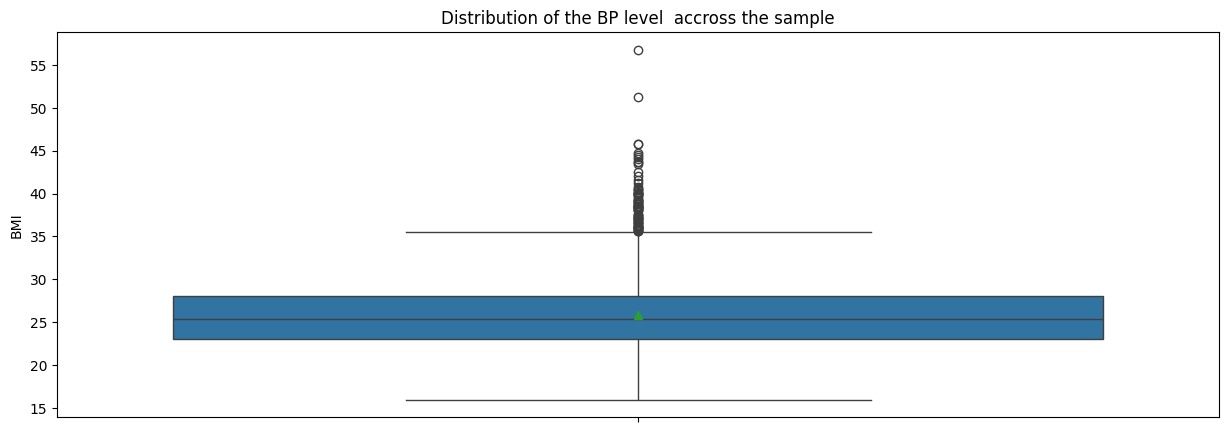

In [ ]:
# Chart - 13 visualization code
sns.boxplot(dataset['BMI'],showmeans = True)
plt.title("Distribution of the BP level  accross the sample")
plt.show()

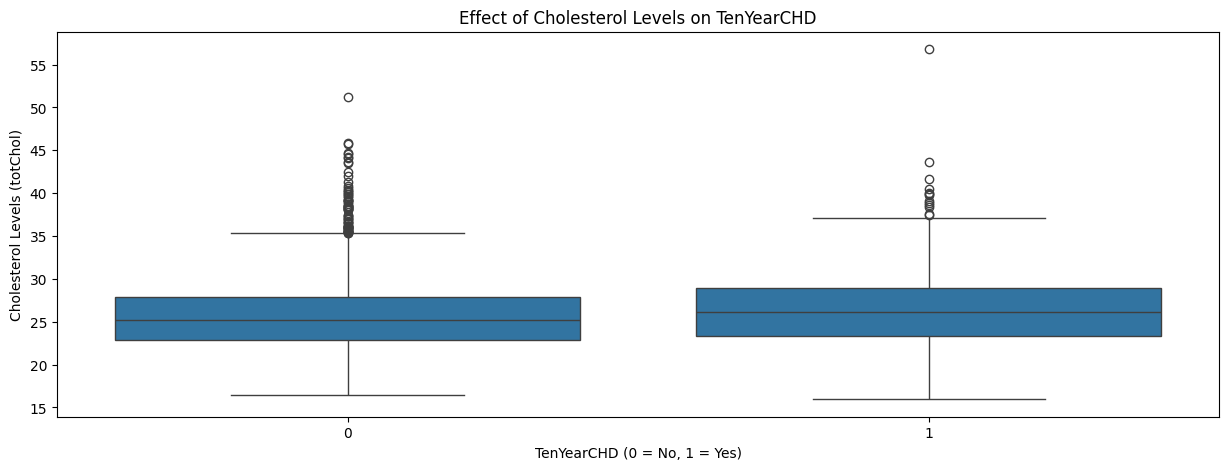

In [ ]:
# Chart - 13 visualization code
sns.boxplot(x='TenYearCHD', y='BMI', data=dataset)
plt.title('Effect of Cholesterol Levels on TenYearCHD')
plt.xlabel('TenYearCHD (0 = No, 1 = Yes)')
plt.ylabel('Cholesterol Levels (totChol)')
plt.show()

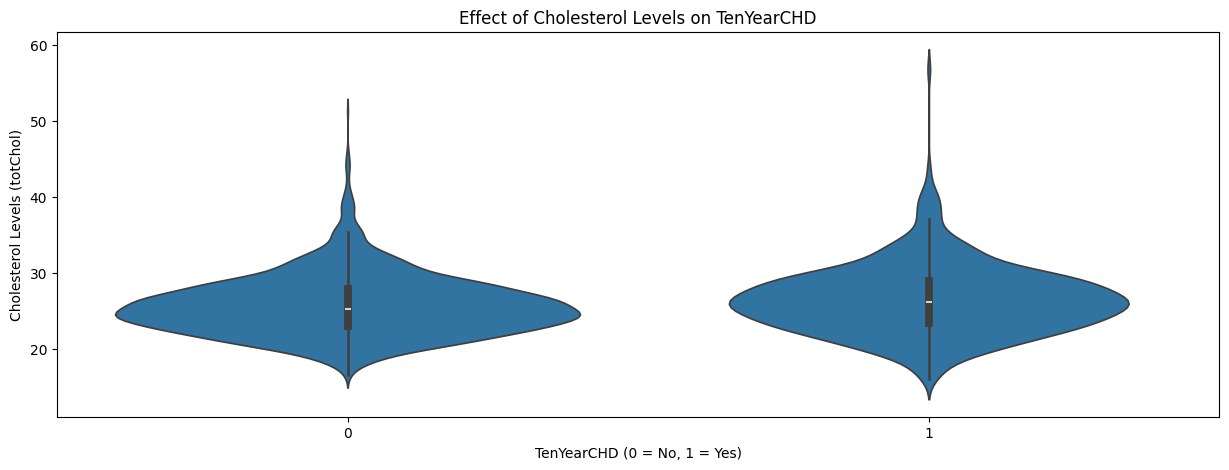

In [ ]:
sns.violinplot(x='TenYearCHD', y='BMI', data=dataset)
plt.title('Effect of Cholesterol Levels on TenYearCHD')
plt.xlabel('TenYearCHD (0 = No, 1 = Yes)')
plt.ylabel('Cholesterol Levels (totChol)')
plt.show()

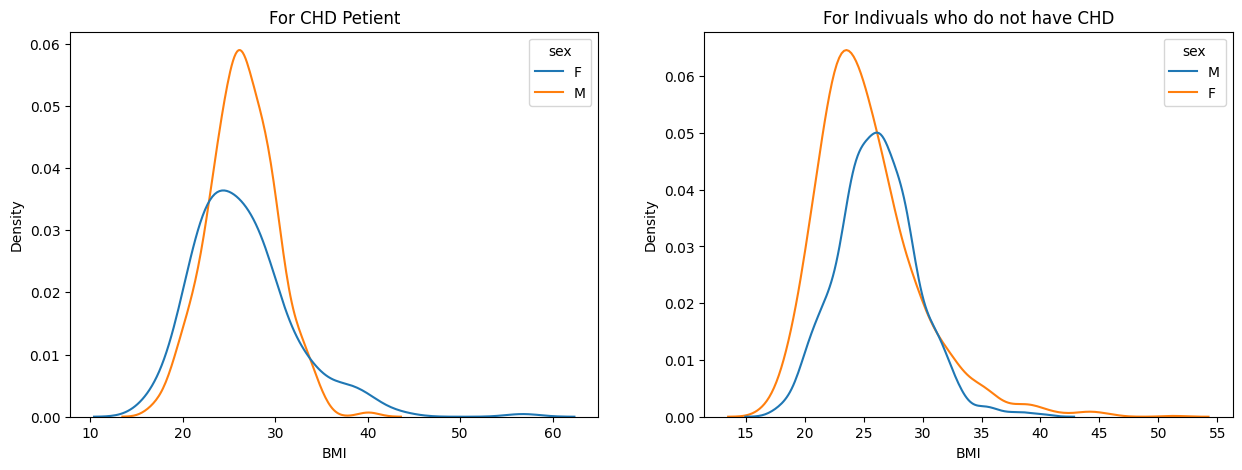

In [ ]:
dataset_CHD = dataset[dataset['TenYearCHD'] == 1]
dataset_no_CHD = dataset[dataset['TenYearCHD'] == 0]


plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.kdeplot(data = dataset_CHD,x = 'BMI',hue = 'sex')
plt.title('For CHD Petient')

plt.subplot(1,2,2)
sns.kdeplot(data = dataset_no_CHD,x = 'BMI',hue = 'sex')
plt.title('For Indivuals who do not have CHD')

plt.show()

##### 1. Why did you pick the specific chart?

A histogram is a classic visualization tool that represents the distribution of one or more variables by counting the number of observations that fall within discrete bins.

Scatter plots are used to plot data points on a horizontal and a vertical axis in the attempt to show how much one variable is affected by another.

The regression plots in seaborn are primarily intended to add a visual guide that helps to emphasize patterns in a dataset during exploratory data analysis.

##### 2. What is/are the insight(s) found from the chart?

We can see that Solar Radiation is correlated with Demand with the correlation coeficeint of +.26 indicating weak linear relationship between demand and Solar Radiation.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We can see that Solar Radiation is correlated with Demand with the correlation coeficeint of +.26 indicating weak linear relationship between demand and Solar Radiation.

#### Chart - 14 - Analysing 'heartRate'

In [ ]:
dataset['heartRate'].describe(include ='All')

count    3389.000000
mean       75.977279
std        11.971868
min        45.000000
25%        68.000000
50%        75.000000
75%        83.000000
max       143.000000
Name: heartRate, dtype: float64

The normal resting heart rate for most adults is typically between 60 and 100 beats per minute (bpm). However, this range can vary based on factors like age, fitness level, and individual health.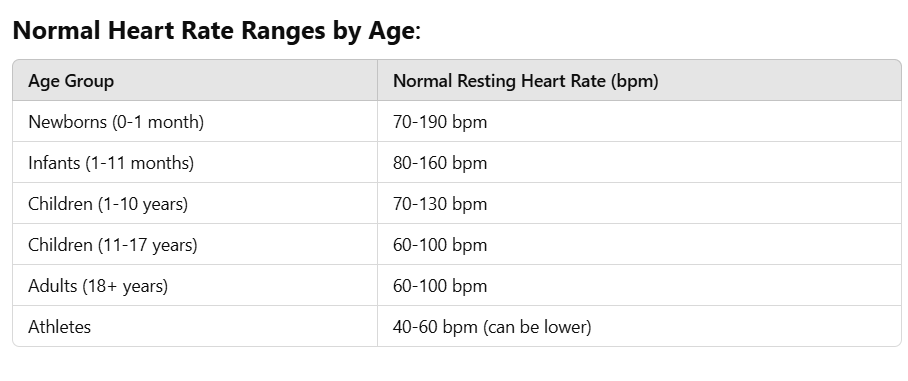

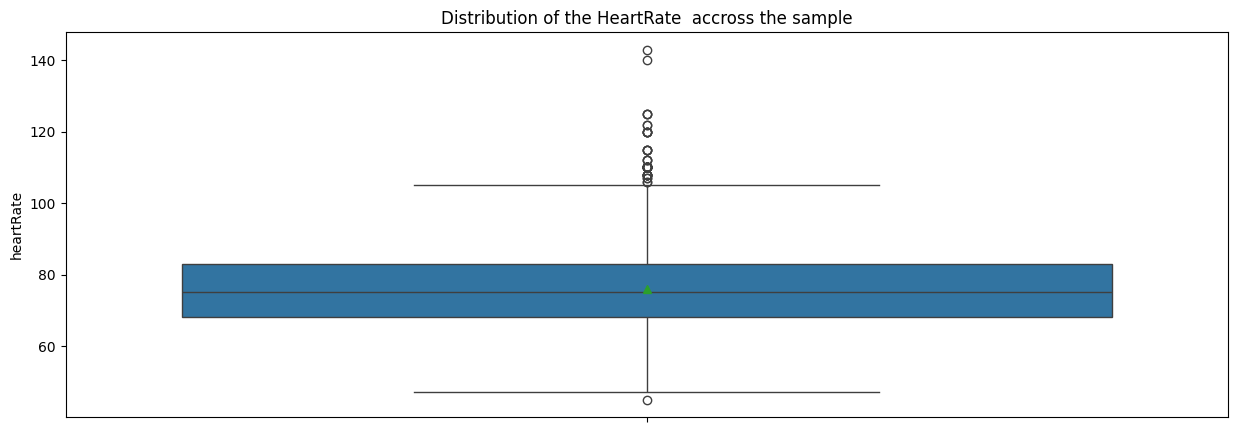

In [ ]:
# Chart - 14 visualization code
sns.boxplot(dataset['heartRate'],showmeans = True)
plt.title("Distribution of the HeartRate  accross the sample")
plt.show()

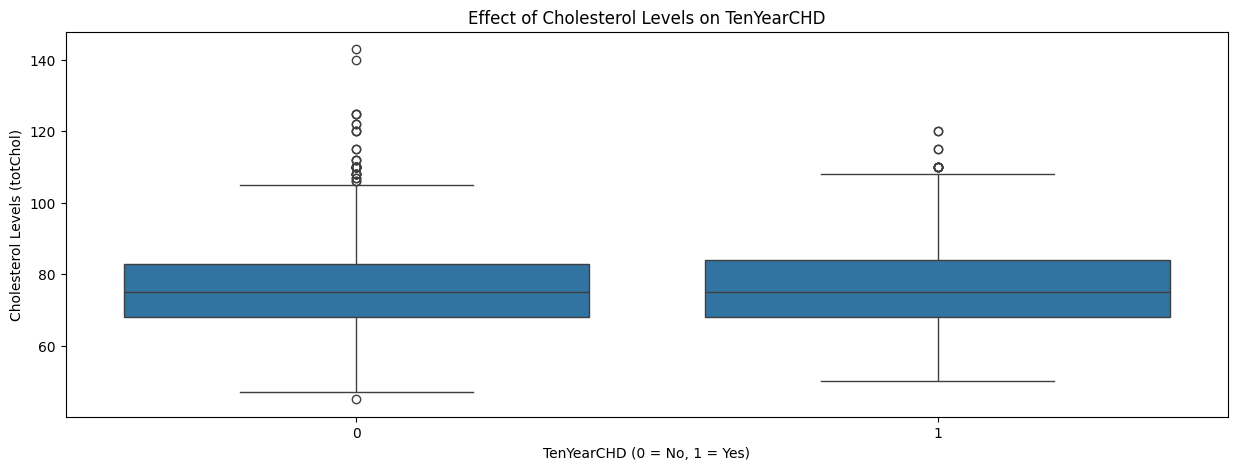

In [ ]:
# Chart - 13 visualization code
sns.boxplot(x='TenYearCHD', y='heartRate', data=dataset)
plt.title('Effect of Cholesterol Levels on TenYearCHD')
plt.xlabel('TenYearCHD (0 = No, 1 = Yes)')
plt.ylabel('Cholesterol Levels (totChol)')
plt.show()

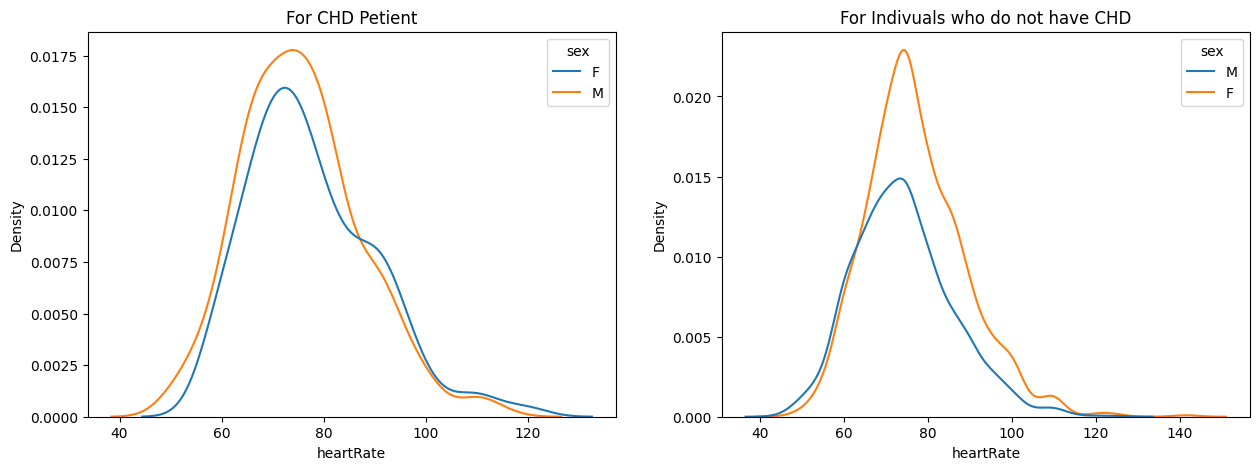

In [ ]:
dataset_CHD = dataset[dataset['TenYearCHD'] == 1]
dataset_no_CHD = dataset[dataset['TenYearCHD'] == 0]


plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.kdeplot(data = dataset_CHD,x = 'heartRate',hue = 'sex')
plt.title('For CHD Petient')

plt.subplot(1,2,2)
sns.kdeplot(data = dataset_no_CHD,x = 'heartRate',hue = 'sex')
plt.title('For Indivuals who do not have CHD')

plt.show()

#### Chart - 15 - Analysing 'glucose'

In [ ]:
dataset.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

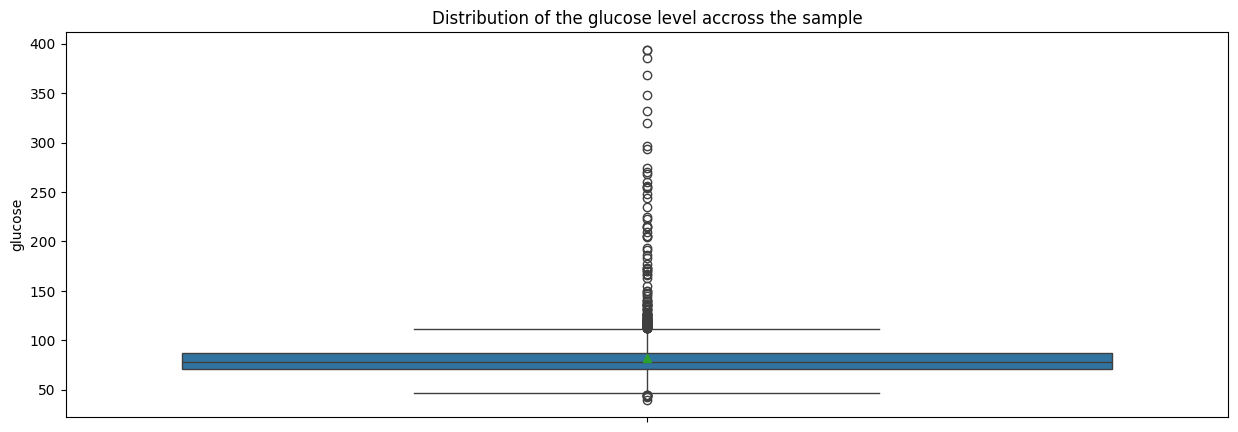

In [ ]:
# Chart - 15 visualization code
sns.boxplot(dataset['glucose'],showmeans = True)
plt.title("Distribution of the glucose level accross the sample")
plt.show()

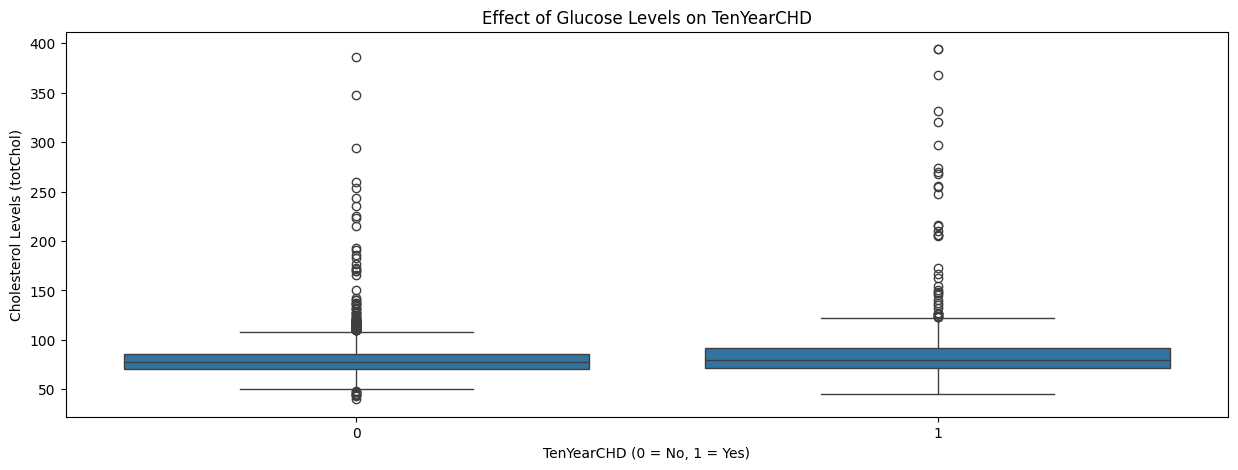

In [ ]:
# Chart - 15 visualization code
sns.boxplot(x='TenYearCHD', y='glucose', data=dataset)
plt.title('Effect of Glucose Levels on TenYearCHD')
plt.xlabel('TenYearCHD (0 = No, 1 = Yes)')
plt.ylabel('Cholesterol Levels (totChol)')
plt.show()

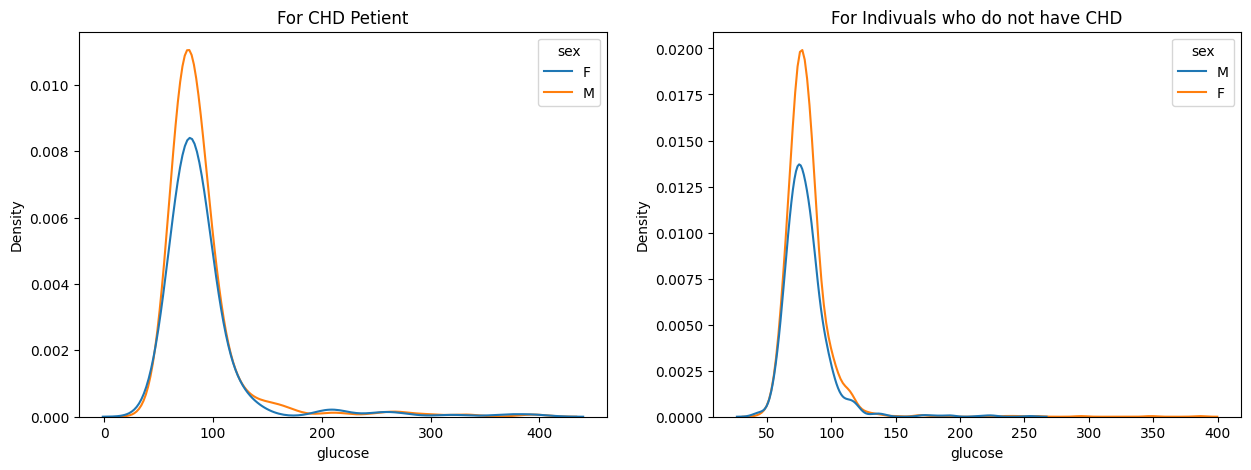

In [ ]:
dataset_CHD = dataset[dataset['TenYearCHD'] == 1]
dataset_no_CHD = dataset[dataset['TenYearCHD'] == 0]


plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.kdeplot(data = dataset_CHD,x = 'glucose',hue = 'sex')
plt.title('For CHD Petient')

plt.subplot(1,2,2)
sns.kdeplot(data = dataset_no_CHD,x = 'glucose',hue = 'sex')
plt.title('For Indivuals who do not have CHD')

plt.show()

#### Chart - 16 - Correlation Heatmap

In [ ]:
dataset.describe().columns

Index(['id', 'age', 'education', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
cor_dataset = dataset[[ 'age','cigsPerDay','totChol', 'sysBP', 'diaBP', 'BMI','heartRate', 'glucose']]

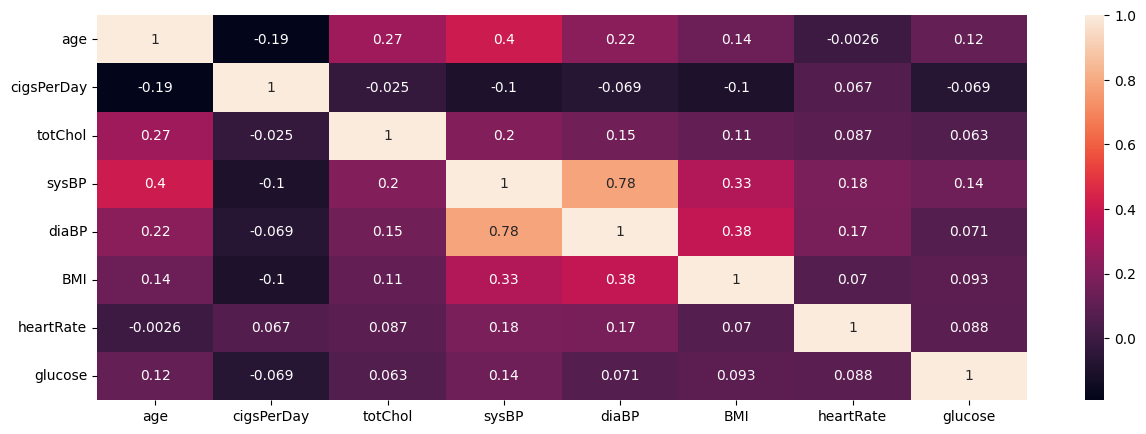

In [ ]:
# Correlation Heatmap visualization code
sns.heatmap(data = cor_dataset.corr(),annot = True)
plt.show()

##### 1. Why did you pick the specific chart?

The heatmap function generates a colour-coded matrix that illustrates how strongly two or more of variables in a dataset correlate with one another.

##### 2. What is/are the insight(s) found from the chart?

From above the above dataset we can see that highest postively correlated feature are Temperature and Dew point temperature with correlation coefficiently of 0.91.

With least Coefficient of correlation i.e -0.02 Rainfall and Wind speed are least co-related features.

#### Checking Multicollinearity Using VIF

In [ ]:
dataset.isnull().sum().sum()

np.int64(510)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
dataset_copy = dataset.copy()
dataset_copy.dropna(inplace = True)

In [ ]:
dataset_copy.isnull().sum().sum()

np.int64(0)

In [ ]:
dataset_copy.shape

(2927, 17)

In [ ]:
dataset_copy.describe().columns

Index(['id', 'age', 'education', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
calc_vif(dataset_copy[[i for i in dataset_copy.describe().columns if i not in ['id', 'education', 'BPMeds', 'prevalentStroke','prevalentHyp', 'diabetes','TenYearCHD']]])

variables         VIF
0         age   40.044014
1  cigsPerDay    1.617961
2     totChol   30.579800
3       sysBP  108.853541
4       diaBP  124.363127
5         BMI   43.181133
6   heartRate   35.098033
7     glucose   12.582604

##### 1. What is/are the insight(s) found from the chart?

VIF for Temperature(°C) and Dew point temperature(°C) is very high

**Implications of High VIF**

1. A high VIF indicates that the independent variable contributes redundant information to the model.
2. It inflates the standard errors of coefficients, reducing their statistical significance.
3. This makes it challenging to interpret the effect of individual predictors.

**How to Address High VIF**

1. Remove Variables: Eliminate one of the correlated variables.
2. Combine Variables: Create a composite variable (e.g., by averaging or principal component analysis).
3. Regularization Techniques: Use methods like Ridge Regression or Lasso Regression that penalize large coefficients.
4. Center Variables: Standardize the variables (e.g., subtract the mean), which can sometimes reduce multicollinearity.


By identifying and addressing high VIF values, you can improve the reliability and interpretability of your regression model.

## ***5. Feature Engineering & Data Pre-processing***

### 5.1. Handling Missing Values

In [ ]:
print("The percentage loss in data we remove nun values : ",round(((dataset.shape[0] - dataset_copy.shape[0])/(dataset.shape[0]) * 100),2))

The percentage loss in data we remove nun values :  13.66


Data loss in more than 10% if we are removing the null values. hence we should impute missing values.

In [ ]:
# Handling Missing Values & Missing Value Imputation
dataset.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

We have numerical column which have missing values i.e = cigsPerDay, totChol, BMI and glucose.

In [ ]:
#immuting median in numerical columns.
Numerical_columns = ['cigsPerDay', 'totChol', 'BMI','glucose','heartRate']
for col in Numerical_columns:
  dataset[col].fillna(dataset[col].median(),inplace = True)

In [ ]:
dataset.isnull().sum()

id                  0
age                 0
education          87
sex                 0
is_smoking          0
cigsPerDay          0
BPMeds             44
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol             0
sysBP               0
diaBP               0
BMI                 0
heartRate           0
glucose             0
TenYearCHD          0
dtype: int64

In [ ]:
print(dataset['education'].value_counts())
print('\n')
print(dataset['BPMeds'].value_counts())

education
1.0    1391
2.0     990
3.0     549
4.0     373
Name: count, dtype: int64


BPMeds
0.0    3246
1.0     100
Name: count, dtype: int64


In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')

# Apply the imputer to multiple columns
dataset[['BPMeds', 'education']] = imputer.fit_transform(dataset[['BPMeds', 'education']])

In [ ]:
dataset.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

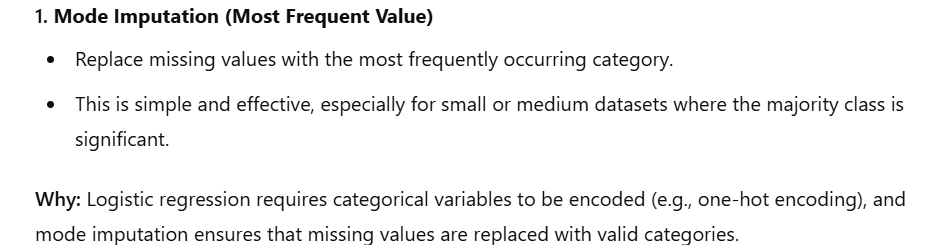

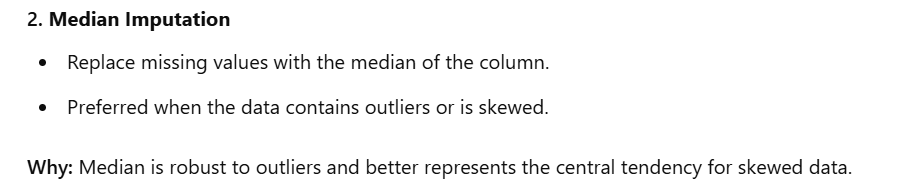

### 5.2. Handling Outliers

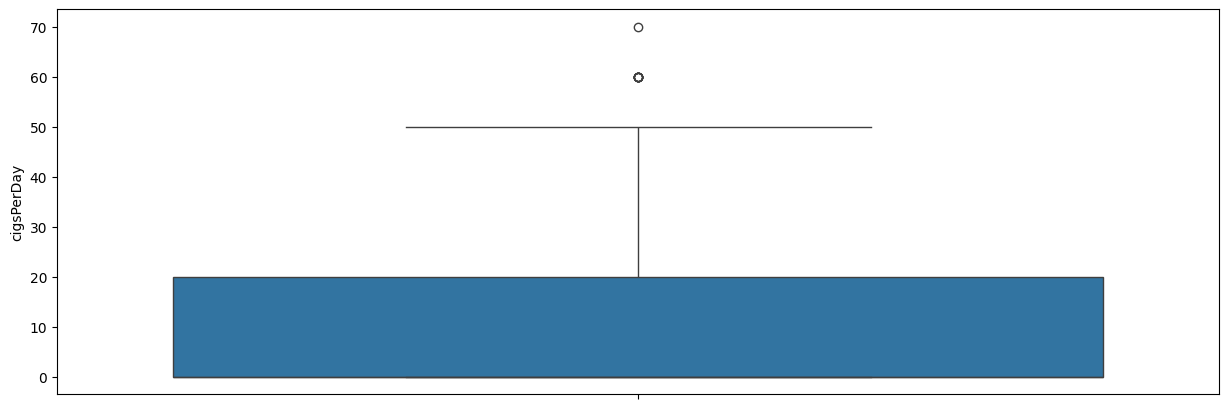

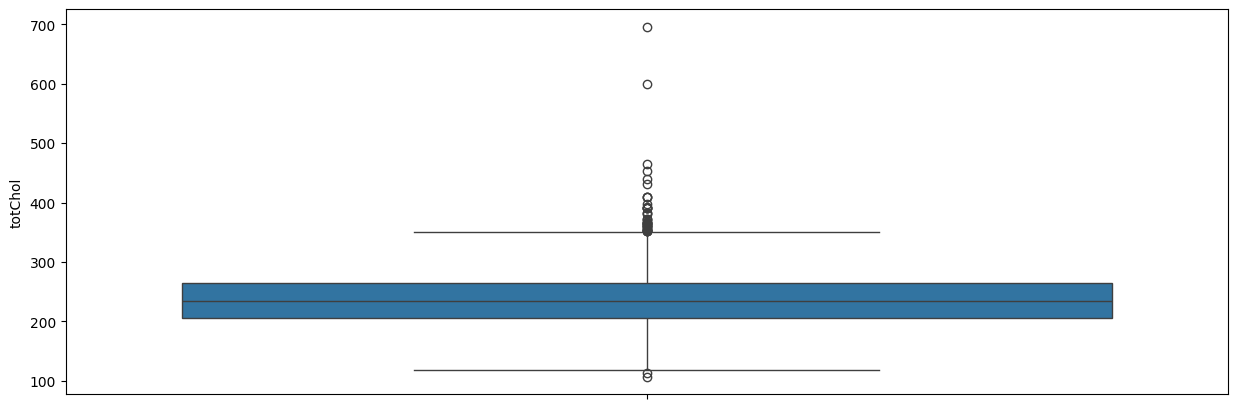

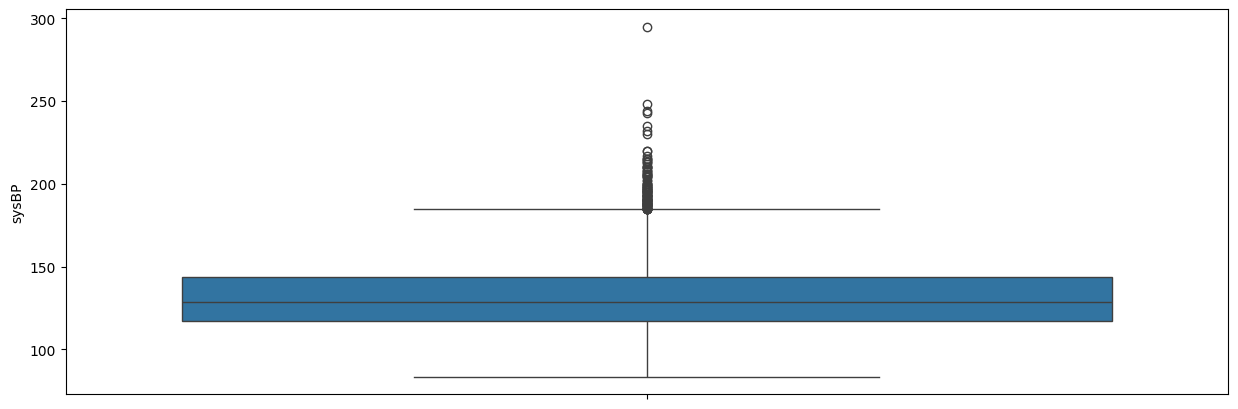

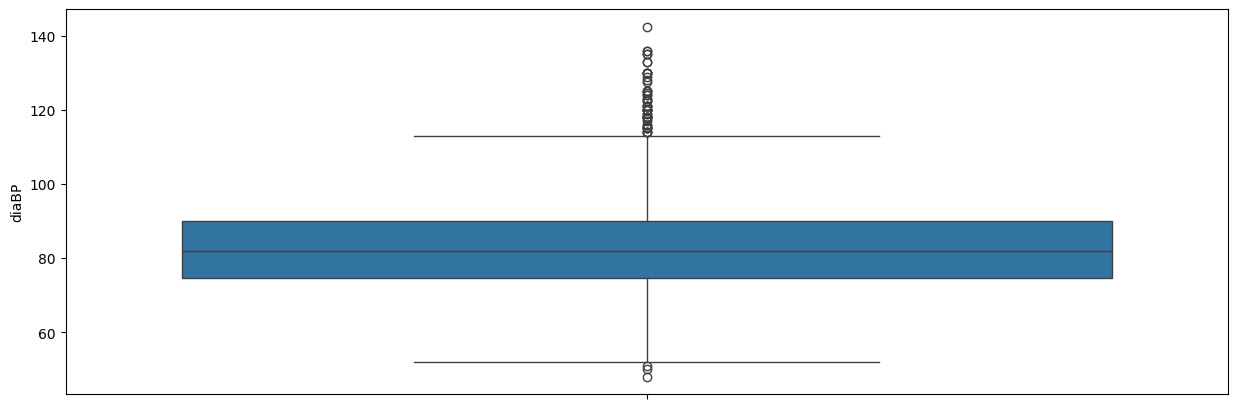

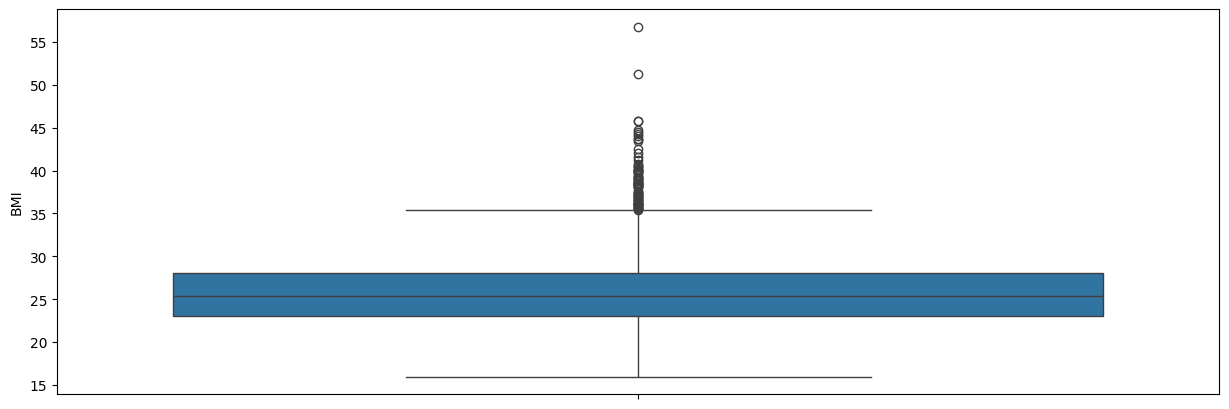

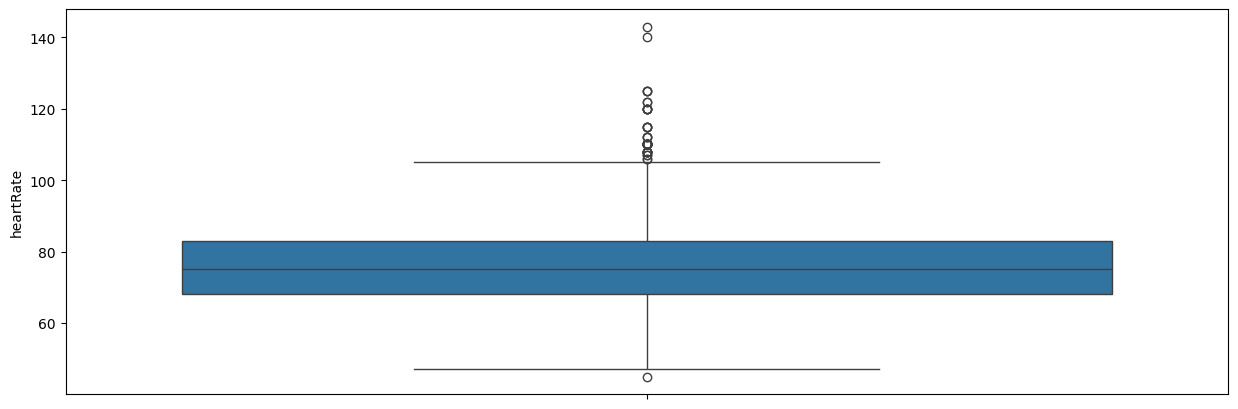

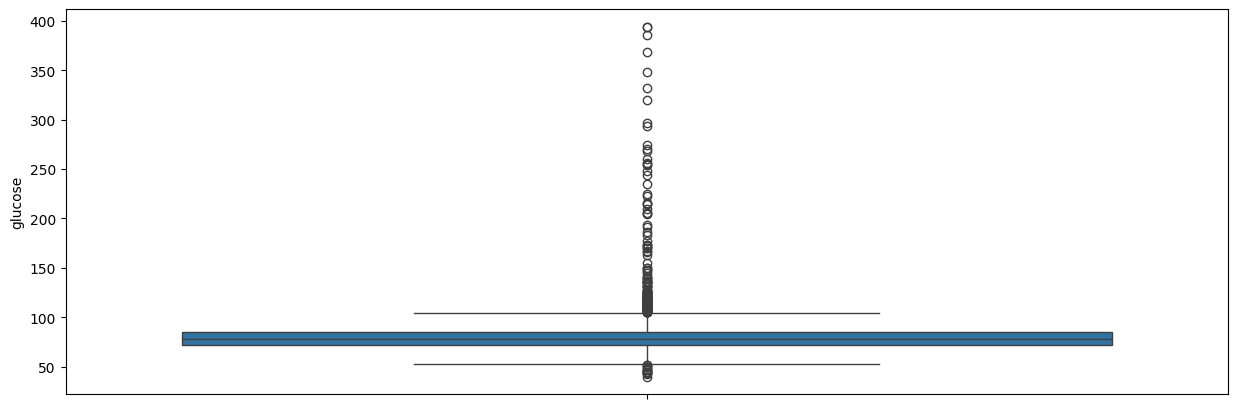

In [ ]:
Numerical_columns = ['cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI','heartRate', 'glucose']
for col in Numerical_columns:
  sns.boxplot(dataset[col])
  plt.show()

In [ ]:
#checking IQR for Rainfall and Windspeed

for col in Numerical_columns:
  print('IQR for',col,'is :',upper_limit(dataset,col))
  print('IQR for',col,'is :',lower_limit(dataset,col))
  upper = upper_limit(dataset, col)
  lower = lower_limit(dataset, col)

  # Apply the lambda function to cap outliers
  dataset[col] = dataset[col].apply(lambda x: upper if x > upper else lower if x < lower else x)
  # Cap values in the column using clip()
  #dataset[col] = dataset[col].clip(lower=lower, upper=upper)

  print('\n')

IQR for cigsPerDay is : 50.0
IQR for cigsPerDay is : -30.0


IQR for totChol is : 351.0
IQR for totChol is : 119.0


IQR for sysBP is : 184.5
IQR for sysBP is : 76.5


IQR for diaBP is : 113.25
IQR for diaBP is : 51.25


IQR for BMI is : 35.44875
IQR for BMI is : 15.578750000000005


IQR for heartRate is : 105.5
IQR for heartRate is : 45.5


IQR for glucose is : 104.5
IQR for glucose is : 52.5




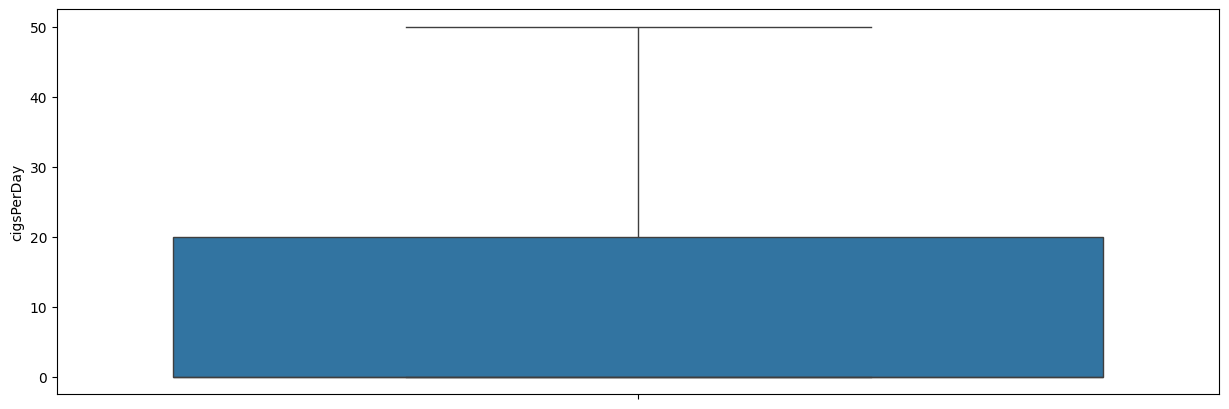

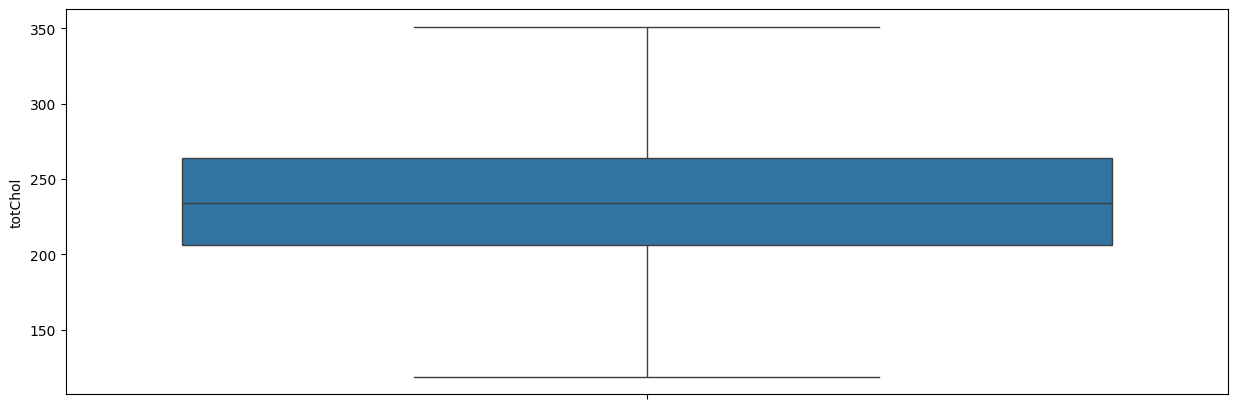

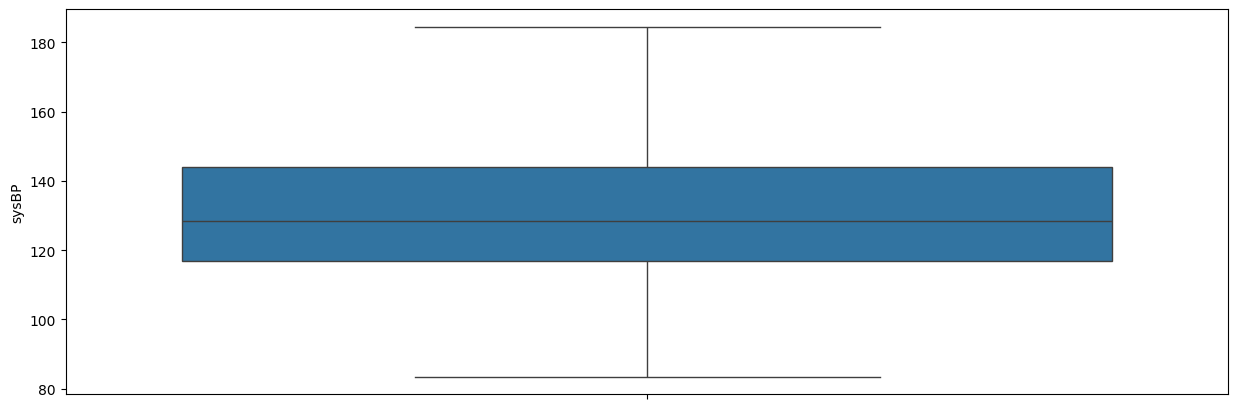

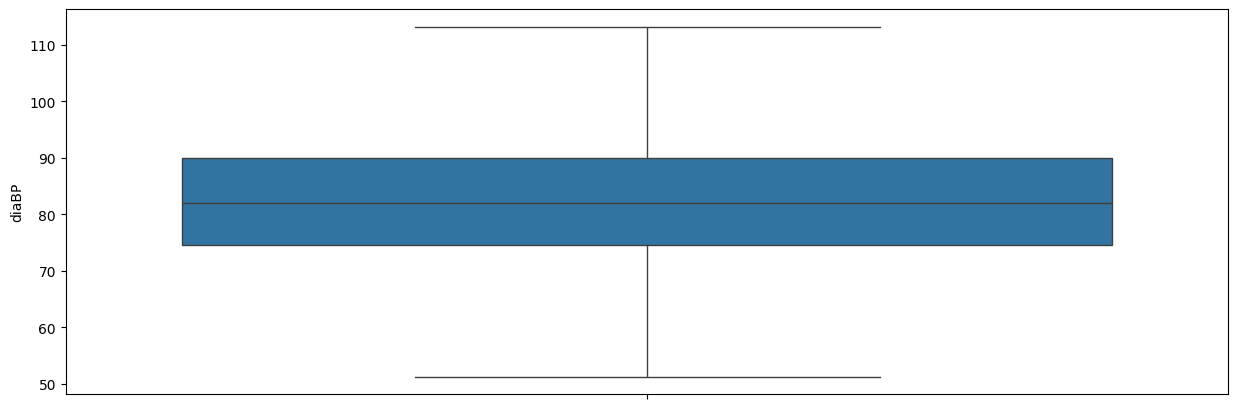

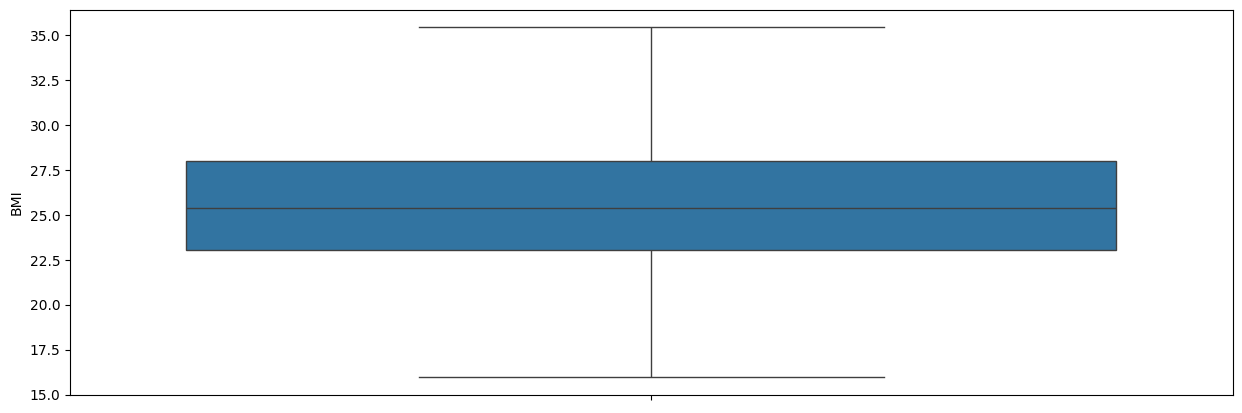

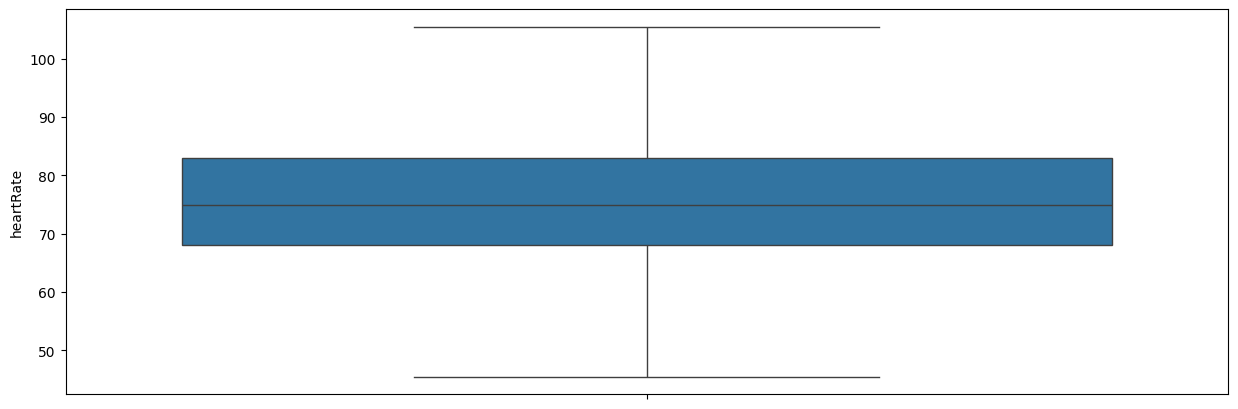

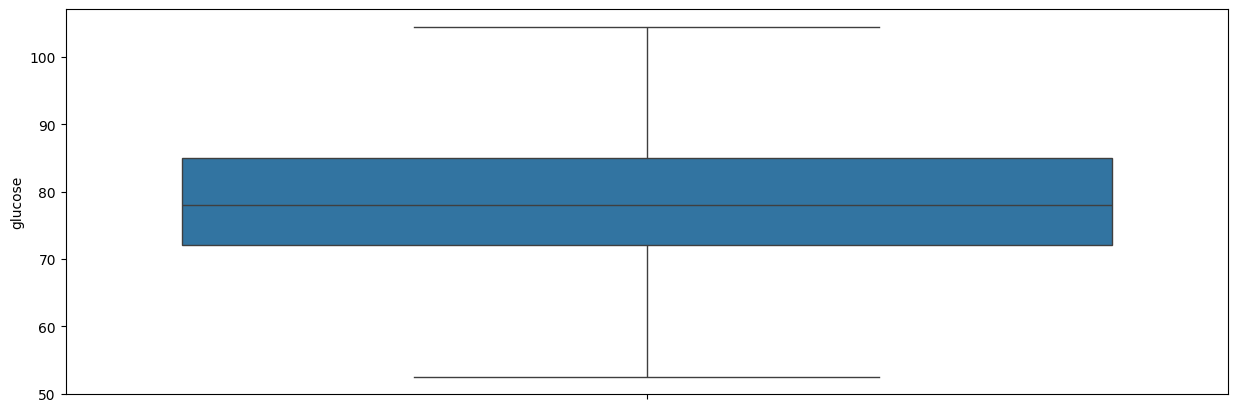

In [ ]:
Numerical_columns = ['cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI','heartRate', 'glucose']
for col in Numerical_columns:
  sns.boxplot(dataset[col])
  plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

**Capping**

In this technique called “outlier detection,” we cap our data to set limits. For instance, if we decide on a specific value, any data point above or below that value is considered an outlier. The number of outliers in the dataset then gives us insight into that capping number. It’s like setting a boundary and saying, “Anything beyond this point is unusual,” and by doing so, we identify and count the outliers in our data.

For example, if you’re working on the income feature, you might find that people above a certain income level behave similarly to those with a lower income. In this case, you can cap the income value at a level that keeps that intact and accordingly treat the outliers.

### 5.3. Feature Manipulation

#### 5.3.1. Feature Manipulation

Changing data types

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3390 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3390 non-null   float64
 6   BPMeds           3390 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3390 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3390 non-null   float64
 14  heartRate        3390 non-null   float64
 15  glucose          3390 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [ ]:
categorical_col = ['is_smoking','sex']
for x in categorical_col:
  dataset[x] = dataset[x].astype('category')

The category data type in Pandas is a special data type for categorical data, which typically represents a fixed number of possible values or categories. It is an optimized data type compared to the default object or string data type, especially useful when working with large datasets.

Features of the category Data Type:

1. Memory Efficient.
2. Improved Performance.
3. Supports Order.
4. Useful for Fixed Categories.

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   id               3390 non-null   int64   
 1   age              3390 non-null   int64   
 2   education        3390 non-null   float64 
 3   sex              3390 non-null   category
 4   is_smoking       3390 non-null   category
 5   cigsPerDay       3390 non-null   float64 
 6   BPMeds           3390 non-null   float64 
 7   prevalentStroke  3390 non-null   int64   
 8   prevalentHyp     3390 non-null   int64   
 9   diabetes         3390 non-null   int64   
 10  totChol          3390 non-null   float64 
 11  sysBP            3390 non-null   float64 
 12  diaBP            3390 non-null   float64 
 13  BMI              3390 non-null   float64 
 14  heartRate        3390 non-null   float64 
 15  glucose          3390 non-null   float64 
 16  TenYearCHD       3390 non-null   int64   


#### 5.3.2. Feature Selection

In [ ]:
columns = ['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds','prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP','diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']

In [ ]:
# Select your features wisely to avoid overfitting
dataset_fit1 = dataset[['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds','prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP','diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']]

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

#### 5.3.3. Categorical Encoding

In [ ]:
categorical_columns = ['is_smoking', 'sex','education']

In [ ]:
dataset_fit1.head()

age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   64        2.0   F        YES         3.0     0.0                0   
1   36        4.0   M         NO         0.0     0.0                0   
2   46        1.0   F        YES        10.0     0.0                0   
3   50        1.0   M        YES        20.0     0.0                0   
4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0  25.38       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

In [ ]:
# Encode your categorical columns
for col in categorical_columns:
    dataset_fit1 = one_hot_encoding(dataset_fit1, col)


In [ ]:
dataset_fit1.head()

age  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  diabetes  totChol  \
0   64         3.0     0.0                0             0         0    221.0   
1   36         0.0     0.0                0             1         0    212.0   
2   46        10.0     0.0                0             0         0    250.0   
3   50        20.0     0.0                0             1         0    233.0   
4   64        30.0     0.0                0             0         0    241.0   

   sysBP  diaBP    BMI  heartRate  glucose  TenYearCHD  is_smoking_YES  sex_M  \
0  148.0   85.0  25.38       90.0     80.0           1               1      0   
1  168.0   98.0  29.77       72.0     75.0           0               0      1   
2  116.0   71.0  20.35       88.0     94.0           0               1      0   
3  158.0   88.0  28.26       68.0     94.0           1               1      1   
4  136.5   85.0  26.42       70.0     77.0           0               1      0   

   education_2.0  education_3.0  education_4.0  
0              1              0              0  
1              0              0              1  
2              0              0              0  
3              0              0              0  
4              0              0              0

##### What all categorical encoding techniques have you used & why did you use those techniques?

**One Hot Encoding**

One hot encoding is a technique that we use to represent categorical variables as numerical values in a machine learning model.

### 5.4. Data Scaling

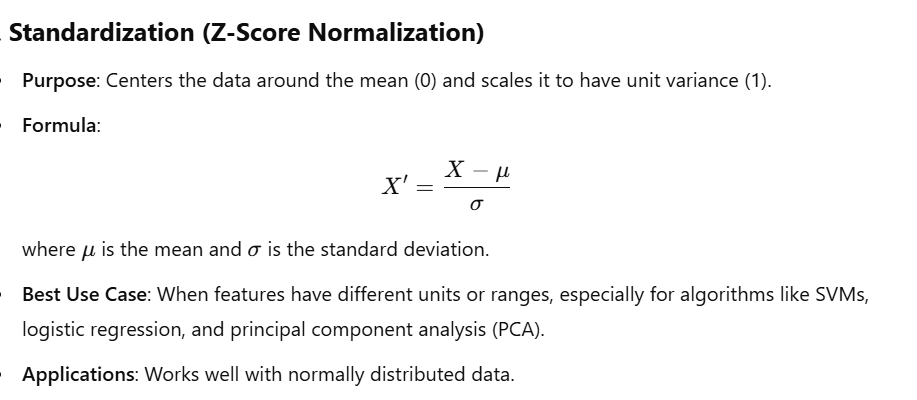

In [ ]:
from sklearn.preprocessing import StandardScaler

def standardize_columns(data, columns):
    """
    Standardizes specified columns in the DataFrame using Z-Score Normalization.

    Parameters:
        data (pd.DataFrame): Input DataFrame.
        columns (list): List of column names to be standardized.

    Returns:
        pd.DataFrame: DataFrame with standardized columns.
    """
    scaler = StandardScaler()  # Initialize the scaler
    data[columns] = scaler.fit_transform(data[columns])  # Apply standardization
    return data

In [ ]:
columns = ['age','cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI','heartRate', 'glucose']
dataset_fit1 = standardize_columns(dataset_fit1, columns)

In [ ]:
dataset_fit1.head()

age  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  diabetes  \
0  1.682783   -0.509309     0.0                0             0         0   
1 -1.576210   -0.764767     0.0                0             1         0   
2 -0.412284    0.086760     0.0                0             0         0   
3  0.053287    0.938287     0.0                0             1         0   
4  1.682783    1.789814     0.0                0             0         0   

    totChol     sysBP     diaBP       BMI  heartRate   glucose  TenYearCHD  \
0 -0.362779  0.765478  0.196952 -0.085301   1.226815  0.044207           1   
1 -0.572897  1.729390  1.324986  1.066765  -0.332741 -0.389669           0   
2  0.314268 -0.776781 -1.017855 -1.405321   1.053531  1.259059           0   
3 -0.082622  1.247434  0.457267  0.670496  -0.679309  1.259059           1   
4  0.104150  0.211229  0.196952  0.187626  -0.506025 -0.216119           0   

   is_smoking_YES  sex_M  education_2.0  education_3.0  education_4.0  
0               1      0              1              0              0  
1               0      1              0              0              1  
2               1      0              0              0              0  
3               1      1              0              0              0  
4               1      0              0              0              0

##### Which method have you used to scale you data and why?

In [ ]:
X = dataset_fit1.drop(['TenYearCHD'],axis = 'columns')
X.head()

age  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  diabetes  \
0  1.682783   -0.509309     0.0                0             0         0   
1 -1.576210   -0.764767     0.0                0             1         0   
2 -0.412284    0.086760     0.0                0             0         0   
3  0.053287    0.938287     0.0                0             1         0   
4  1.682783    1.789814     0.0                0             0         0   

    totChol     sysBP     diaBP       BMI  heartRate   glucose  \
0 -0.362779  0.765478  0.196952 -0.085301   1.226815  0.044207   
1 -0.572897  1.729390  1.324986  1.066765  -0.332741 -0.389669   
2  0.314268 -0.776781 -1.017855 -1.405321   1.053531  1.259059   
3 -0.082622  1.247434  0.457267  0.670496  -0.679309  1.259059   
4  0.104150  0.211229  0.196952  0.187626  -0.506025 -0.216119   

   is_smoking_YES  sex_M  education_2.0  education_3.0  education_4.0  
0               1      0              1              0              0  
1               0      1              0              0              1  
2               1      0              0              0              0  
3               1      1              0              0              0  
4               1      0              0              0              0

In [ ]:
y = dataset_fit1['TenYearCHD']
y.head()

0    1
1    0
2    0
3    1
4    0
Name: TenYearCHD, dtype: int64

### 5.5. Handling Data Imbalance

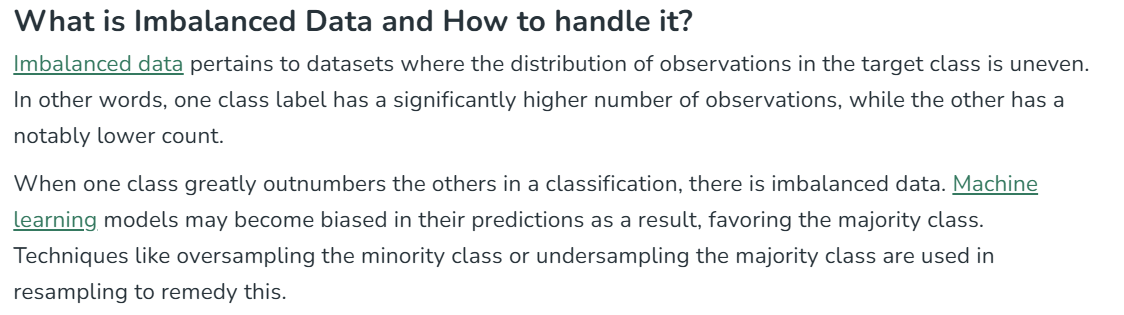

**Synthetic Minority Over-Sampling Technique**

The Synthetic Minority Over-Sampling Technique (SMOTE) is a powerful method used to handle class imbalance in datasets. SMOTE handles this issue by generating samples of minority classes to make the class distribution balanced. SMOTE works by generating synthetic examples in the feature space of the minority class.

**Working Procedure of SMOTE**

1. **Identify Minority Class Instances:** SMOTE operates on datasets where one or more classes are significantly underrepresented compared to others. The first step is to identify the minority class or classes in the dataset.

2. **Nearest Neighbor Selection:** For each minority class instance, SMOTE identifies its k nearest neighbors in the feature space. The number of nearest neighbors, denoted as k, is a parameter specified by the user.

3. **Synthetic Sample Generation:** For each minority class instance, SMOTE randomly selects one of its k nearest neighbors. It then generates synthetic samples along the line segment joining the minority class instance and the selected nearest neighbor in the feature space.

4. **Controlled Oversampling:** The amount of oversampling is controlled by a parameter called the oversampling ratio, which specifies the desired ratio of synthetic samples to real minority class samples. By default, SMOTE typically aims to balance the class distribution by generating synthetic samples until the minority class reaches the same size as the majority class.

5. **Repeat for All Minority Class Instances:**
 Steps 2-4 are repeated for all minority class instances in the dataset, generating synthetic samples to augment the minority class.

6. **Create Balanced Dataset:** After generating synthetic samples for the minority class, the resulting dataset becomes more balanced, with a more equitable distribution of instances across classes.

In [ ]:
from imblearn.over_sampling import SMOTE

smote=SMOTE(sampling_strategy='minority')
X,y=smote.fit_resample(X,y)
y.value_counts()

TenYearCHD
1    2879
0    2879
Name: count, dtype: int64

using sampling techniques my AUC-ROC score increases to .75 from .53. that we later in this python project


### 5.6. Feature selection

In [ ]:
dataset_fit1.head()

age  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  diabetes  \
0  1.682783   -0.509309     0.0                0             0         0   
1 -1.576210   -0.764767     0.0                0             1         0   
2 -0.412284    0.086760     0.0                0             0         0   
3  0.053287    0.938287     0.0                0             1         0   
4  1.682783    1.789814     0.0                0             0         0   

    totChol     sysBP     diaBP       BMI  heartRate   glucose  TenYearCHD  \
0 -0.362779  0.765478  0.196952 -0.085301   1.226815  0.044207           1   
1 -0.572897  1.729390  1.324986  1.066765  -0.332741 -0.389669           0   
2  0.314268 -0.776781 -1.017855 -1.405321   1.053531  1.259059           0   
3 -0.082622  1.247434  0.457267  0.670496  -0.679309  1.259059           1   
4  0.104150  0.211229  0.196952  0.187626  -0.506025 -0.216119           0   

   is_smoking_YES  sex_M  education_2.0  education_3.0  education_4.0  
0               1      0              1              0              0  
1               0      1              0              0              1  
2               1      0              0              0              0  
3               1      1              0              0              0  
4               1      0              0              0              0

In [ ]:
dataset_fit1.columns

Index(['age', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp',
       'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose',
       'TenYearCHD', 'is_smoking_YES', 'sex_M', 'education_2.0',
       'education_3.0', 'education_4.0'],
      dtype='object')

In [ ]:
calc_vif(dataset_fit1[[i for i in dataset_fit1.describe().columns ]])

variables       VIF
0               age  1.458740
1        cigsPerDay  1.905844
2            BPMeds  1.135858
3   prevalentStroke  1.029984
4      prevalentHyp  2.766456
5          diabetes  1.120467
6           totChol  1.126693
7             sysBP  3.803996
8             diaBP  2.852078
9               BMI  1.250489
10        heartRate  1.098197
11          glucose  1.104384
12       TenYearCHD  1.279070
13   is_smoking_YES  3.177277
14            sex_M  1.875286
15    education_2.0  1.532938
16    education_3.0  1.271089
17    education_4.0  1.235039

VIF for every feature is less than 5, hence we are good to go

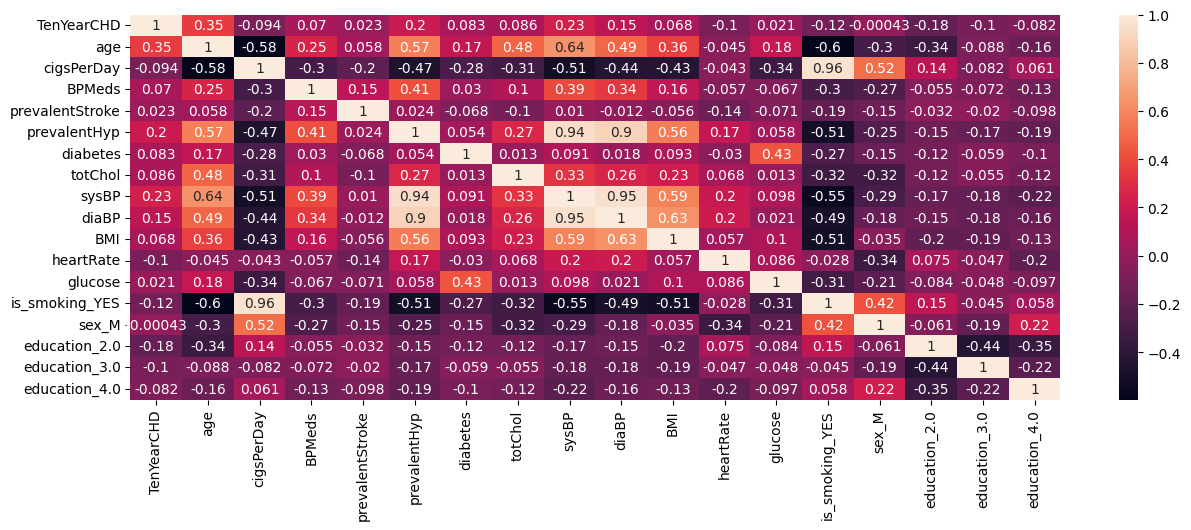

In [ ]:
dataset_fit1 = dataset_fit1[['TenYearCHD','age', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp','diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose','is_smoking_YES', 'sex_M',
       'education_2.0', 'education_3.0', 'education_4.0']]

corr_matrix = dataset_fit1.corr()

sns.heatmap(data = corr_matrix.corr(),annot = True)
plt.show()

### 5.7. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(4606, 17)
(1152, 17)


In [ ]:
y_train.value_counts()

TenYearCHD
0    2326
1    2280
Name: count, dtype: int64

In [ ]:
y_test.value_counts()

TenYearCHD
1    599
0    553
Name: count, dtype: int64

##### What data splitting ratio have you used and why?

We used spliting ratio of 0.2.

## ***6. ML Model Implementation***

Recall measures how many actual CHD cases were correctly predicted with respect to total CHD in dataset. Focus on Person should not be classified as No-CHD if they were prone to CHD.

### 6.1 ML Model - 1 : Logistic Regression

In [ ]:
# ML Model - 1 Implementation
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True, max_iter=10000,penalty=None,random_state=42)
clf.fit(X_train, y_train)


#Specifies if a constant (a.k.a. bias or intercept) should be added to the decision function.

LogisticRegression(max_iter=10000, penalty=None, random_state=42)

In [ ]:
# Get the model coefficients, The clf.coef_ attribute returns the coefficients of the features in the trained logistic regression model.
print(clf.coef_)
print(clf.coef_.shape)

#for multiclass, clf.coef_ is a 2D array of shape (n_classes, n_features), where each row corresponds to the coefficients for one class.

[[ 0.49750498  0.47216576  0.40917889 -0.76828064 -0.36521148 -0.04419303
   0.14855788  0.32896582  0.12625369 -0.0396084  -0.07388114  0.12173638
  -0.25005183 -0.12729895 -1.11631975 -1.32954861 -1.23466298]]
(1, 17)


In [ ]:
# Get the model coefficients, The clf.intercept_ attribute returns the coefficients of the features in the trained logistic regression model.
clf.intercept_

#For multiclass, clf.intercept_ is a 1D array of shape (n_classes,), where each value corresponds to the intercept for one class.

array([0.52237779])

In [ ]:
coeff = list(clf.coef_)
coeff_list = []
for x in coeff:
  for y in x:
    coeff_list.append(y)


In [ ]:
list_of_col = X.columns.to_list()
intercept_list = [ round(x,2) for x in coeff_list ]

In [ ]:
# Get the predicted probabilities
train_preds = clf.predict_proba(X_train)  #retrieves the predicted probabilities for each class for the input data X_train using the trained logistic regression model. Here’s what it does in detail:
test_preds = clf.predict_proba(X_test)

In [ ]:
train_preds

array([[0.68049364, 0.31950636],
       [0.73300901, 0.26699099],
       [0.84991642, 0.15008358],
       ...,
       [0.72747767, 0.27252233],
       [0.84007964, 0.15992036],
       [0.69676078, 0.30323922]])

In [ ]:
print(train_preds.shape)

(4606, 2)


In [ ]:
test_preds

array([[0.75557754, 0.24442246],
       [0.90246082, 0.09753918],
       [0.07382036, 0.92617964],
       ...,
       [0.56369153, 0.43630847],
       [0.89362225, 0.10637775],
       [0.64401048, 0.35598952]])

In [ ]:
# Get the predicted classes
train_class_preds = clf.predict(X_train)  #Predict class labels for samples in X_train(X train consist shape(n_samples, n_features)).
test_class_preds = clf.predict(X_test)

In [ ]:
train_class_preds

array([0, 0, 0, ..., 0, 0, 0])

calculates the training accuracy of your logistic regression model using the predictions (train_class_preds)(Predicted and the true labels (y_train)(original label).

#### 6.1.1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix,roc_auc_score,average_precision_score
from sklearn.metrics import precision_score, recall_score

[[1595  731]
 [ 659 1621]]


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

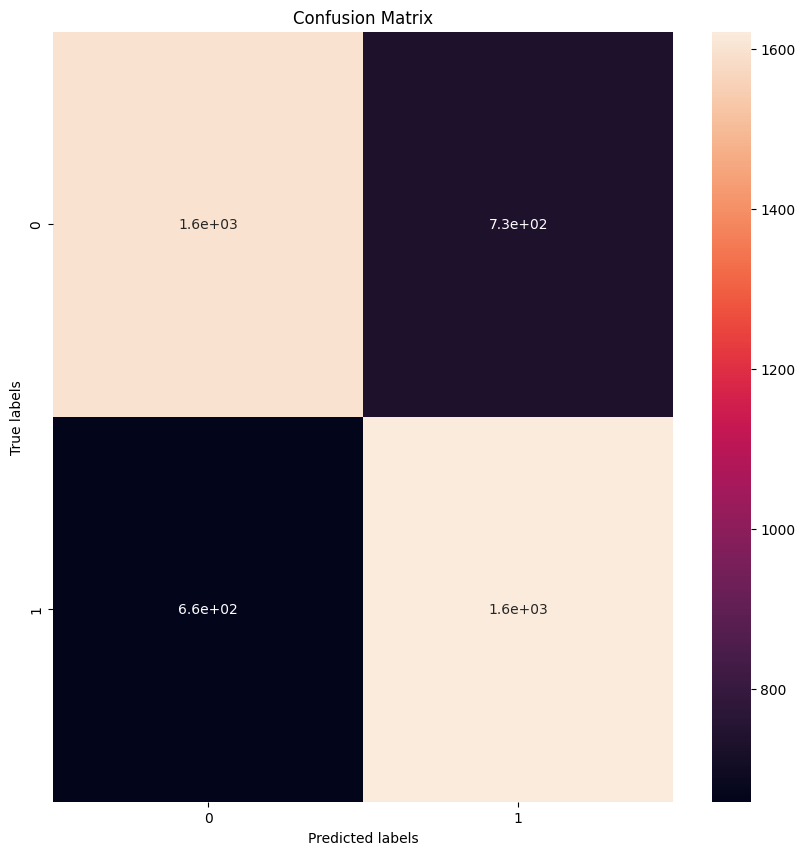

In [ ]:
#checking all the relevant metrics for Train Data
# Get the confusion matrix for both train and test

labels = ['0', '1']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

plt.figure(figsize=(10,10))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
print('TP: Predicted as future CHD, Actual CHD: ' ,cm[-1][-1])
print('TN: Predicted as No future CHD, Actual No CHD: ',cm[0][0])
print('FP: Predicted as future CHD, Actual No future CHD: ', cm[0][1])
print('FN: Predicted as No future CHD, Actual Future CHD: ', cm[1][0])

TP: Predicted as future CHD, Actual CHD:  1621
TN: Predicted as No future CHD, Actual No CHD:  1595
FP: Predicted as future CHD, Actual No future CHD:  731
FN: Predicted as No future CHD, Actual Future CHD:  659


In [ ]:
#For Train dataset
#Get the accuracy scores
train_accuracy = accuracy_score(y_train,train_class_preds)
print("The accuracy on train data is ", train_accuracy)

#precision
train_precision = precision_score(y_train, train_class_preds)   #sklearn.metrics.precision_score(y_true, y_pred)
print("The precision on train data is ", train_precision)

#recall
train_recall = recall_score( y_train,train_class_preds)
print("The recall on train data is ", train_recall)

The accuracy on train data is  0.6982197134172818
The precision on train data is  0.6892006802721088
The recall on train data is  0.7109649122807018


In [ ]:
roc_auc = roc_auc_score(y_train,train_class_preds)
print(roc_auc)

0.6983457407491214


In [ ]:
#Metrics Data frame for Train Data
dict1 = {'Accuracy' : round(train_accuracy,3), 'Precision':round(train_precision,3) , 'Recall':round(train_recall,3), 'ROC-AUC':round(roc_auc,3)}

Train_DF = pd.DataFrame(dict1,index=['Logistic Regression'])
Train_DF

Accuracy  Precision  Recall  ROC-AUC
Logistic Regression     0.698      0.689   0.711    0.698

[[377 176]
 [165 434]]


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

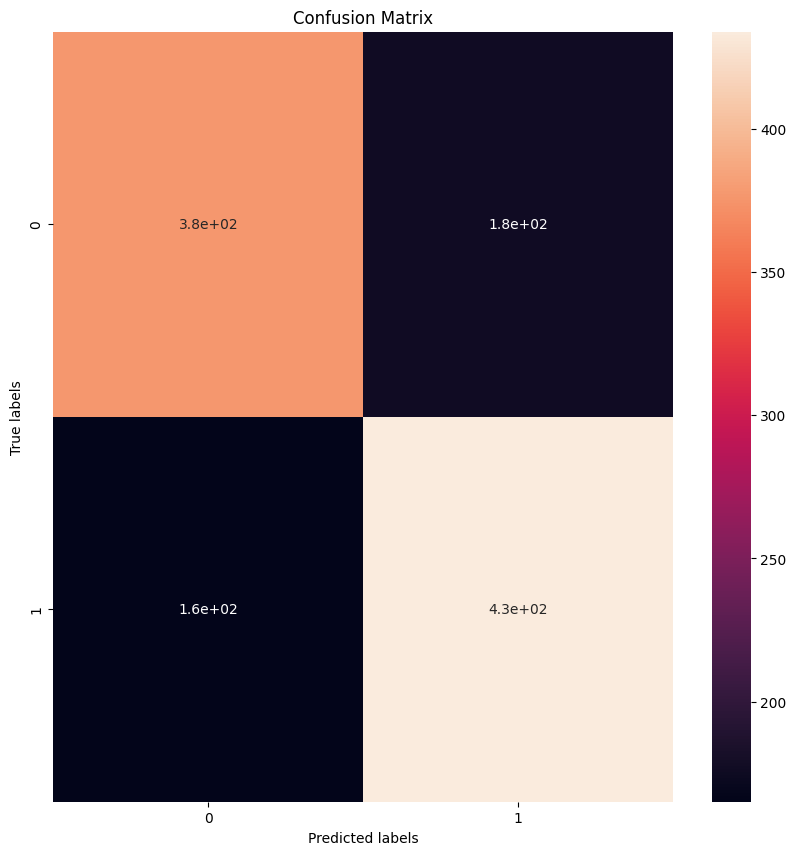

In [ ]:
#checking all the relevant metrics for Test Data
# Get the confusion matrix for both train and test
labels = ['0', '1']
cm = confusion_matrix(y_test,test_class_preds)
print(cm)

plt.figure(figsize=(10,10))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
print('TP: Predicted as future CHD, Actual CHD: ' ,cm[-1][-1])
print('TN: Predicted as No future CHD, Actual No CHD: ',cm[0][0])
print('FP: Predicted as future CHD, Actual No future CHD: ', cm[0][1])
print('FN: Predicted as No future CHD, Actual Future CHD: ', cm[1][0])

TP: Predicted as future CHD, Actual CHD:  434
TN: Predicted as No future CHD, Actual No CHD:  377
FP: Predicted as future CHD, Actual No future CHD:  176
FN: Predicted as No future CHD, Actual Future CHD:  165


In [ ]:
#For Test Data
#Get the accuracy score
test_accuracy = accuracy_score(y_test,test_class_preds)
print("The accuracy on test data is ", test_accuracy)

#Get the precssion score
test_precision = precision_score(y_test, test_class_preds)
print("The precision on test data is ", test_precision)

#recall
test_recall = recall_score( y_test,test_class_preds)
print("The recall on test data is ", test_recall)

The accuracy on test data is  0.7039930555555556
The precision on test data is  0.7114754098360656
The recall on test data is  0.7245409015025042


In [ ]:
roc_auc = roc_auc_score(y_test,test_class_preds)
print(roc_auc)

0.703138443517979


In [ ]:
dict2 = {'Accuracy' : round(test_accuracy,3), 'Precision':round(test_precision,3) , 'Recall':round(test_recall,3), 'ROC-AUC':round(roc_auc,3)}

Test_DF = pd.DataFrame(dict2,index=['Logistic Regression'])
Test_DF

Accuracy  Precision  Recall  ROC-AUC
Logistic Regression     0.704      0.711   0.725    0.703

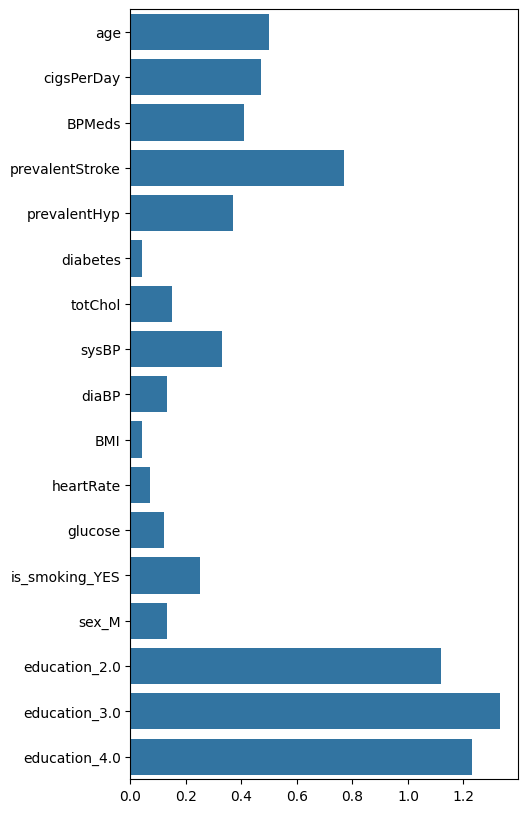

In [ ]:
#Importance of respective features
plt.rcParams['figure.figsize'] = (5,10)
y_imf = X.columns.to_list()
x_imf = np.absolute(intercept_list)
sns.barplot(x= x_imf,y = y_imf)
plt.show()

#### 6.1.2 Cross- Validation & Hyperparameter Tuning in logistic regression.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
'''
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Regularization methods
    'C': [0.1, 10, 100],           # Regularization strength
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga'],  # Optimization solvers
    'l1_ratio': [0.1, 0.5,None],                  # ElasticNet mixing ratio (only for 'elasticnet')
    'class_weight': ['balanced'],           # Handle class imbalance
    'max_iter': [40,50,100, 200],                  # Maximum iterations for convergence
    'tol': [1e-3,1e-4]                     # Stopping tolerance
}

clf = LogisticRegression(fit_intercept=True,random_state=42)

#Define Cross-Validation Scheme
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    scoring='recall',  # Evaluate models using recall   (can I use scoring also in hyperparameter tuning)
    cv=cv,
    verbose=2,
)


grid_search.fit(X_train, y_train)
'''

"\nparam_grid = {\n    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Regularization methods\n    'C': [0.1, 10, 100],           # Regularization strength\n    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga'],  # Optimization solvers\n    'l1_ratio': [0.1, 0.5,None],                  # ElasticNet mixing ratio (only for 'elasticnet')\n    'class_weight': ['balanced'],           # Handle class imbalance\n    'max_iter': [40,50,100, 200],                  # Maximum iterations for convergence\n    'tol': [1e-3,1e-4]                     # Stopping tolerance\n}\n\nclf = LogisticRegression(fit_intercept=True,random_state=42)\n\n#Define Cross-Validation Scheme\ncv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)\n\ngrid_search = GridSearchCV(\n    estimator=clf,\n    param_grid=param_grid,\n    scoring='recall',  # Evaluate models using recall   (can I use scoring also in hyperparameter tuning)\n    cv=cv,\n    verbose=2,\n)\n\n\ngrid_search.fit(X_train, y_train)\n"

In [ ]:
'''
print("\nBest Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validated Recall:", grid_search.best_score_)

#best_model = grid_search.best_estimator_
'''

'\nprint("\nBest Hyperparameters:", grid_search.best_params_)\nprint("Best Cross-Validated Recall:", grid_search.best_score_)\n\n#best_model = grid_search.best_estimator_\n'

Best Hyperparameters: {'C': 100, 'class_weight': 'balanced', 'l1_ratio': 0.1, 'max_iter': 40, 'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.001}

In [ ]:
param_grid = {
    'penalty': ['l2'],  # Regularization methods
    'C': [100],           # Regularization strength
    'solver': ['lbfgs'],  # Optimization solvers
    'l1_ratio': [0.1],                  # ElasticNet mixing ratio (only for 'elasticnet')
    'class_weight': ['balanced'],           # Handle class imbalance
    'max_iter': [40],                  # Maximum iterations for convergence
    'tol': [1e-3]                     # Stopping tolerance
}

clf = LogisticRegression(fit_intercept=True,random_state=42)

#Define Cross-Validation Scheme
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    scoring='recall',  # Evaluate models using recall   (can I use scoring also in hyperparameter tuning)
    cv=cv,
    verbose=2,
)


grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END C=100, class_weight=balanced, l1_ratio=0.1, max_iter=40, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.1s
[CV] END C=100, class_weight=balanced, l1_ratio=0.1, max_iter=40, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.2s
[CV] END C=100, class_weight=balanced, l1_ratio=0.1, max_iter=40, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.2s
[CV] END C=100, class_weight=balanced, l1_ratio=0.1, max_iter=40, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.3s
[CV] END C=100, class_weight=balanced, l1_ratio=0.1, max_iter=40, penalty=l2, solver=lbfgs, tol=0.001; total time=   0.2s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(random_state=42),
             param_grid={'C': [100], 'class_weight': ['balanced'],
                         'l1_ratio': [0.1], 'max_iter': [40], 'penalty': ['l2'],
                         'solver': ['lbfgs'], 'tol': [0.001]},
             scoring='recall', verbose=2)

In [ ]:
best_model = grid_search.best_estimator_

In [ ]:
# Get the predicted classes
train_class_preds = best_model.predict(X_train)  #Predict class labels for samples in X_train(X train consist shape(n_samples, n_features)).
test_class_preds = best_model.predict(X_test)

#### 6.1.3. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[[1577  749]
 [ 638 1642]]


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

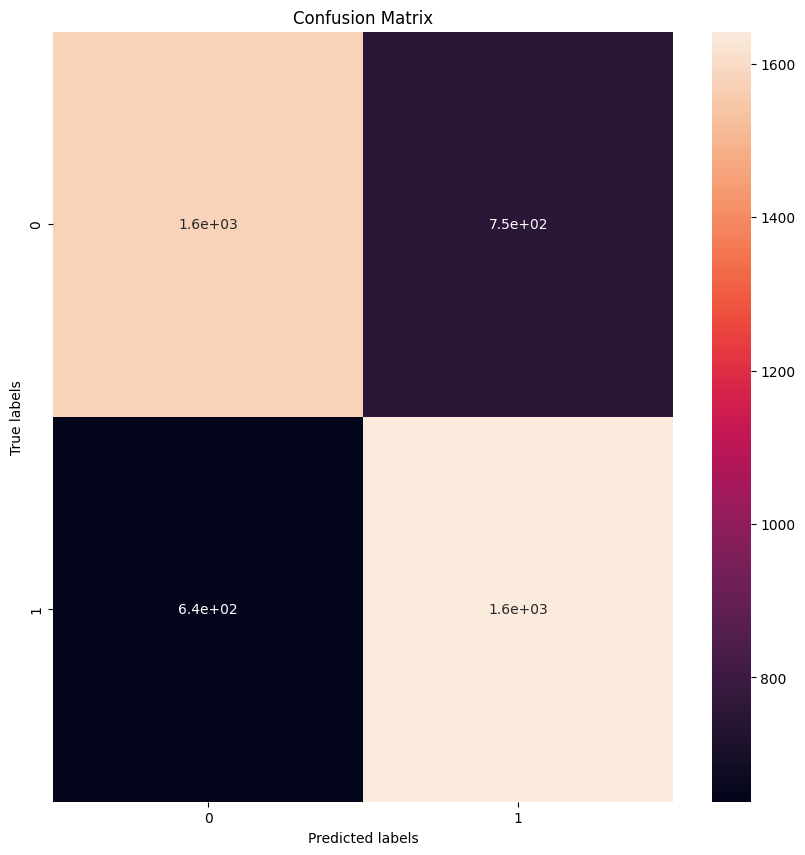

In [ ]:
#checking all the relevant metrics for Train Data
# Get the confusion matrix for both train and test

labels = ['0', '1']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

plt.figure(figsize=(10,10))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
print('TP: Predicted as future CHD, Actual CHD: ' ,cm[-1][-1])
print('TN: Predicted as No future CHD, Actual No CHD: ',cm[0][0])
print('FP: Predicted as future CHD, Actual No future CHD: ', cm[0][1])
print('FN: Predicted as No future CHD, Actual Future CHD: ', cm[1][0])


#For Train dataset
#Get the accuracy scores
train_accuracy = accuracy_score(y_train,train_class_preds)
print("The accuracy on train data is ", train_accuracy)

#precision
train_precision = precision_score(y_train, train_class_preds)   #sklearn.metrics.precision_score(y_true, y_pred)
print("The precision on train data is ", train_precision)

#recall
train_recall = recall_score( y_train,train_class_preds)
print("The recall on train data is ", train_recall)

#ROC
roc_auc = roc_auc_score(y_train,train_class_preds)
print("The auc-roc on train data is ",roc_auc)

TP: Predicted as future CHD, Actual CHD:  1642
TN: Predicted as No future CHD, Actual No CHD:  1577
FP: Predicted as future CHD, Actual No future CHD:  749
FN: Predicted as No future CHD, Actual Future CHD:  638
The accuracy on train data is  0.6988710377768128
The precision on train data is  0.6867419489753241
The recall on train data is  0.7201754385964912
The auc-roc on train data is  0.6990817003816506


In [ ]:
#Metrics Data frame for Train Data
dict3 = {'Accuracy' : round(train_accuracy,3), 'Precision':round(train_precision,3) , 'Recall':round(train_recall,3), 'ROC-AUC':round(roc_auc,3)}

# Convert the dictionary to a DataFrame with the desired index and concatenate
new_row = pd.DataFrame(dict3, index=['GridCV'])
Train_DF = pd.concat([Train_DF, new_row])

print(Train_DF)

                     Accuracy  Precision  Recall  ROC-AUC
Logistic Regression     0.698      0.689   0.711    0.698
GridCV                  0.699      0.687   0.720    0.699


[[374 179]
 [164 435]]


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

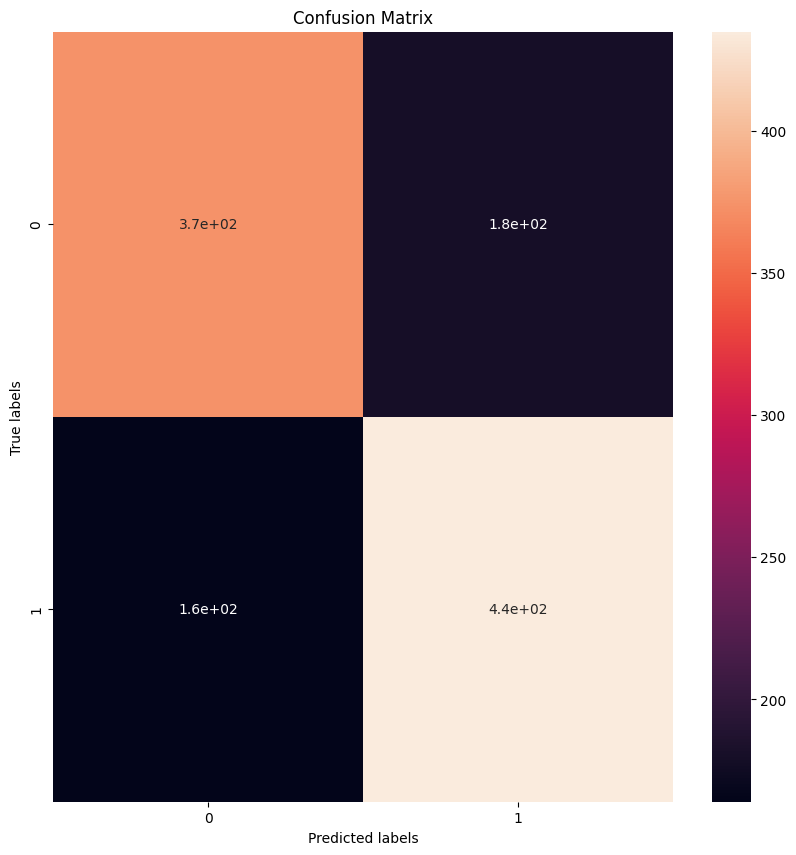

In [ ]:
#checking all the relevant metrics for Test Data
# Get the confusion matrix for both train and test
labels = ['0', '1']
cm = confusion_matrix(y_test,test_class_preds)
print(cm)

plt.figure(figsize=(10,10))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
print('TP: Predicted as future CHD, Actual CHD: ' ,cm[-1][-1])
print('TN: Predicted as No future CHD, Actual No CHD: ',cm[0][0])
print('FP: Predicted as future CHD, Actual No future CHD: ', cm[0][1])
print('FN: Predicted as No future CHD, Actual Future CHD: ', cm[1][0])

#For Test Data
#Get the accuracy score
test_accuracy = accuracy_score(y_test,test_class_preds)
print("The accuracy on test data is ", test_accuracy)

#Get the precssion score
test_precision = precision_score(y_test, test_class_preds)
print("The precision on test data is ", test_precision)

#recall
test_recall = recall_score( y_test,test_class_preds)
print("The recall on test data is ", test_recall)


#AUC-ROC
roc_auc = roc_auc_score(y_test,test_class_preds)
print("The recall on test data is ", roc_auc)

TP: Predicted as future CHD, Actual CHD:  435
TN: Predicted as No future CHD, Actual No CHD:  374
FP: Predicted as future CHD, Actual No future CHD:  179
FN: Predicted as No future CHD, Actual Future CHD:  164
The accuracy on test data is  0.7022569444444444
The precision on test data is  0.7084690553745928
The recall on test data is  0.7262103505843072
The recall on test data is  0.7012606906628588


In [ ]:
#Metrics Data frame for Test Data
dict4 = {'Accuracy' : round(test_accuracy,3), 'Precision':round(test_precision,3) , 'Recall':round(test_recall,3), 'ROC-AUC':round(roc_auc,3)}

# Convert the dictionary to a DataFrame with the desired index and concatenate
new_row = pd.DataFrame(dict4, index=['GridCV'])
Test_DF = pd.concat([Test_DF, new_row])

print(Test_DF)

                     Accuracy  Precision  Recall  ROC-AUC
Logistic Regression     0.704      0.711   0.725    0.703
GridCV                  0.702      0.708   0.726    0.701


### 6.2 ML Model - 2 : Decision Tree.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#Fit on Train Set
DT_classifier = DecisionTreeClassifier(criterion='gini', max_leaf_nodes=None, random_state=42)
DT_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Get the predicted classes
train_class_preds = DT_classifier.predict(X_train)
test_class_preds = DT_classifier.predict(X_test)

#### 6.2.1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[[2326    0]
 [   0 2280]]


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

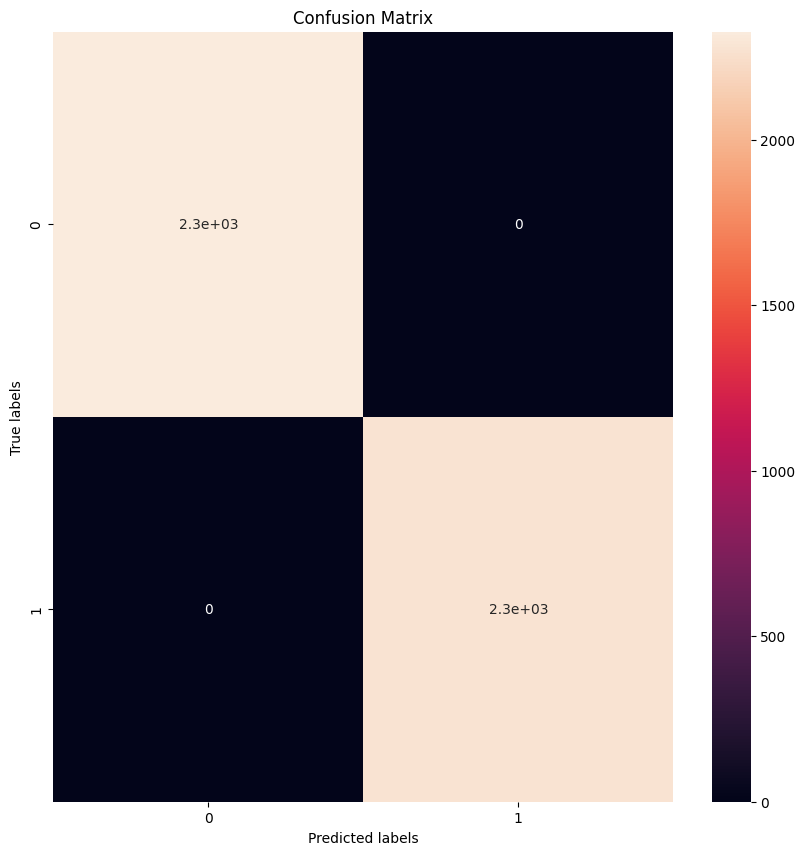

In [ ]:
#checking all the relevant metrics for Train Data
# Get the confusion matrix for both train and test

labels = ['0', '1']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

plt.figure(figsize=(10,10))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
print('TP: Predicted as future CHD, Actual CHD: ' ,cm[-1][-1])
print('TN: Predicted as No future CHD, Actual No CHD: ',cm[0][0])
print('FP: Predicted as future CHD, Actual No future CHD: ', cm[0][1])
print('FN: Predicted as No future CHD, Actual Future CHD: ', cm[1][0])

TP: Predicted as future CHD, Actual CHD:  2280
TN: Predicted as No future CHD, Actual No CHD:  2326
FP: Predicted as future CHD, Actual No future CHD:  0
FN: Predicted as No future CHD, Actual Future CHD:  0


In [ ]:
#For Train dataset
#Get the accuracy scores
train_accuracy = accuracy_score(y_train,train_class_preds)
print("The accuracy on train data is ", train_accuracy)

#precision
train_precision = precision_score(y_train, train_class_preds)   #sklearn.metrics.precision_score(y_true, y_pred)
print("The precision on train data is ", train_precision)

#recall
train_recall = recall_score( y_train,train_class_preds)
print("The recall on train data is ", train_recall)

roc_auc = roc_auc_score(y_train,train_class_preds)
print("The AOC-RUC on train data is ", roc_auc)

The accuracy on train data is  1.0
The precision on train data is  1.0
The recall on train data is  1.0
The AOC-RUC on train data is  1.0


In [ ]:
#Metrics Data frame for Train Data
dictDT = {'Accuracy' : round(train_accuracy,3), 'Precision':round(train_precision,3) , 'Recall':round(train_recall,3), 'ROC-AUC':round(roc_auc,3)
}

# Convert the dictionary to a DataFrame with the desired index and concatenate
new_row = pd.DataFrame(dictDT, index=['Decision Tree'])
Train_DF = pd.concat([Train_DF, new_row])

print(Train_DF)

                     Accuracy  Precision  Recall  ROC-AUC
Logistic Regression     0.698      0.689   0.711    0.698
GridCV                  0.699      0.687   0.720    0.699
Decision Tree           1.000      1.000   1.000    1.000


[[434 119]
 [125 474]]


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

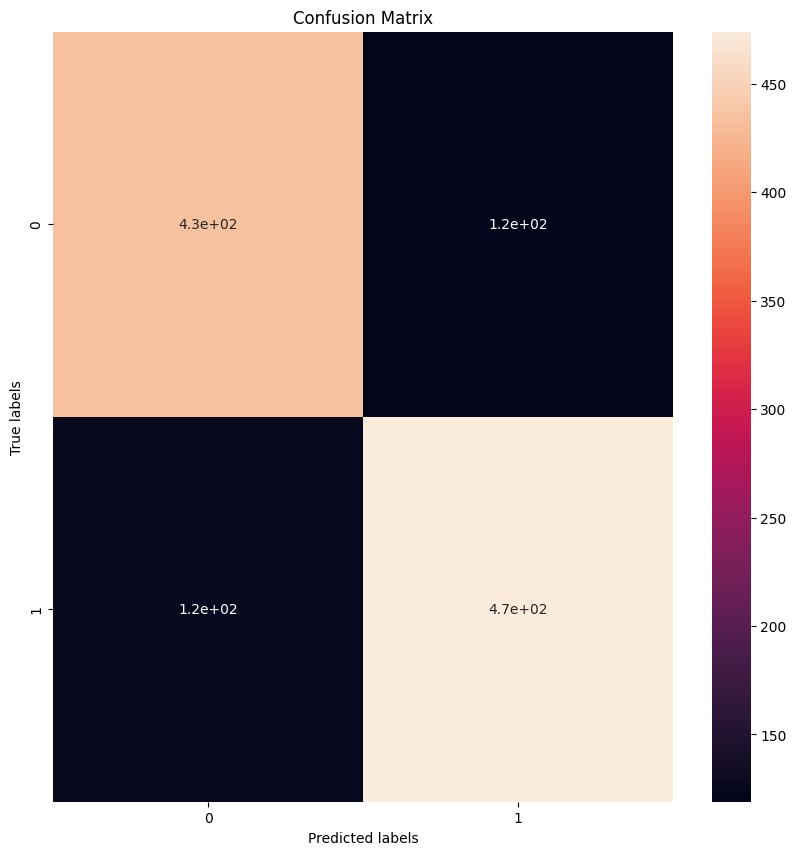

In [ ]:
#checking all the relevant metrics for Test Data
# Get the confusion matrix for both train and test
labels = ['0', '1']
cm = confusion_matrix(y_test,test_class_preds)
print(cm)

plt.figure(figsize=(10,10))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
print('TP: Predicted as future CHD, Actual CHD: ' ,cm[-1][-1])
print('TN: Predicted as No future CHD, Actual No CHD: ',cm[0][0])
print('FP: Predicted as future CHD, Actual No future CHD: ', cm[0][1])
print('FN: Predicted as No future CHD, Actual Future CHD: ', cm[1][0])

TP: Predicted as future CHD, Actual CHD:  474
TN: Predicted as No future CHD, Actual No CHD:  434
FP: Predicted as future CHD, Actual No future CHD:  119
FN: Predicted as No future CHD, Actual Future CHD:  125


In [ ]:
#For Test Data
#Get the accuracy score
test_accuracy = accuracy_score(y_test,test_class_preds)
print("The accuracy on test data is ", test_accuracy)

#Get the precssion score
test_precision = precision_score(y_test, test_class_preds)
print("The precision on test data is ", test_precision)

#recall
test_recall = recall_score( y_test,test_class_preds)
print("The recall on test data is ", test_recall)


#AUC-ROC
roc_auc = roc_auc_score(y_test,test_class_preds)
print("The ROC-AUC on test data is ", roc_auc)

The accuracy on test data is  0.7881944444444444
The precision on test data is  0.7993254637436762
The recall on test data is  0.7913188647746243
The ROC-AUC on test data is  0.7880644956784514


In [ ]:
#Metrics Data frame for Train Data
dictDT = {'Accuracy' : round(test_accuracy,3), 'Precision':round(test_precision,3) , 'Recall':round(test_recall,3), 'ROC-AUC':round(roc_auc,3)
}

# Convert the dictionary to a DataFrame with the desired index and concatenate
new_row = pd.DataFrame(dictDT, index=['Decision Tree'])
Test_DF = pd.concat([Test_DF, new_row])

print(Test_DF)

                     Accuracy  Precision  Recall  ROC-AUC
Logistic Regression     0.704      0.711   0.725    0.703
GridCV                  0.702      0.708   0.726    0.701
Decision Tree           0.788      0.799   0.791    0.788


#### 6.2.2. Visulaizing Decision Tree

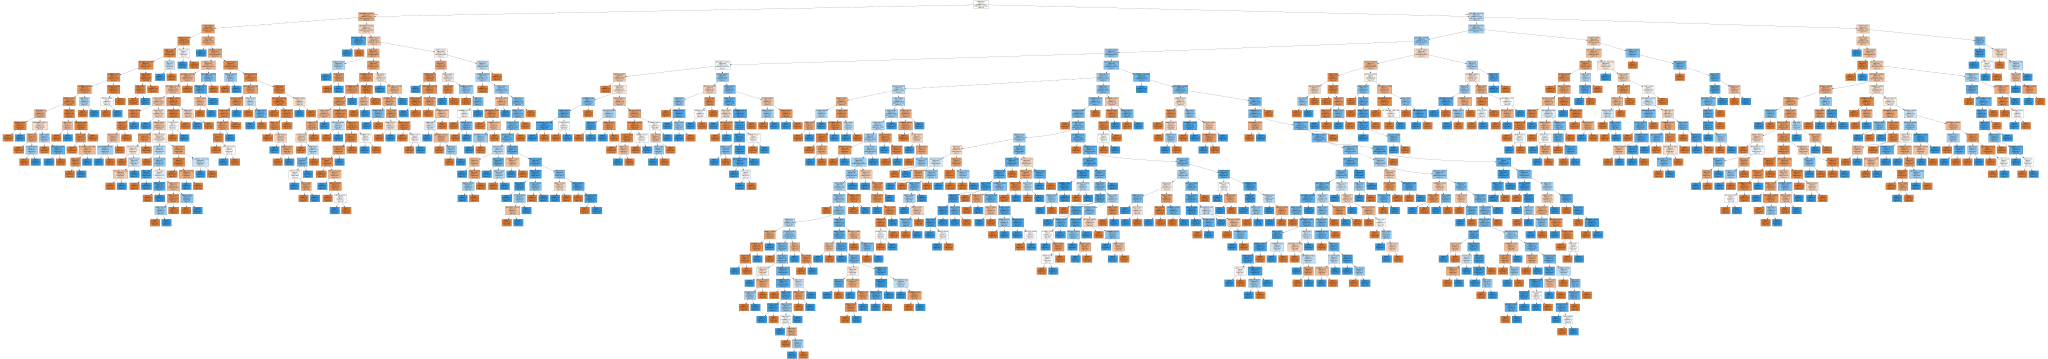

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

graph = Source(tree.export_graphviz(DT_classifier, out_file=None
   , feature_names=X_train.columns, class_names=['0', '1']
   , filled = True))
display(SVG(graph.pipe(format='svg')))

#### 6.2.3 Cross- Validation & Hyperparameter Tuning in Decision Tree.

In [ ]:
'''
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['sqrt', 'log2', None]
}

# Initialize Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)

# Perform GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='recall', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Recall:", grid_search.best_score_)
'''


'\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.tree import DecisionTreeClassifier\n\n# Define the hyperparameter grid\nparam_grid = {\n    \'criterion\': [\'gini\', \'entropy\'],\n    \'max_depth\': [3, 5, 10, None],\n    \'min_samples_split\': [2, 5, 10],\n    \'min_samples_leaf\': [1, 5, 10],\n    \'max_features\': [\'sqrt\', \'log2\', None]\n}\n\n# Initialize Decision Tree Classifier\ndt = DecisionTreeClassifier(random_state=42)\n\n# Perform GridSearchCV with 5-fold cross-validation\ngrid_search = GridSearchCV(dt, param_grid, cv=5, scoring=\'recall\', n_jobs=-1)\ngrid_search.fit(X_train, y_train)\n\n# Print the best parameters and best score\nprint("Best Parameters:", grid_search.best_params_)\nprint("Best Recall:", grid_search.best_score_)\n'

Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 'srt', 'min_samples_leaf': 1, 'min_samples_split': 2}

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the hyperparameter grid
param_grid = {
    'criterion': ['gini'],
    'max_depth': [3],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    'max_features': ['sqrt']
}

# Initialize Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)

# Perform GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [3],
                         'max_features': ['sqrt'], 'min_samples_leaf': [1],
                         'min_samples_split': [2]},
             scoring='accuracy')

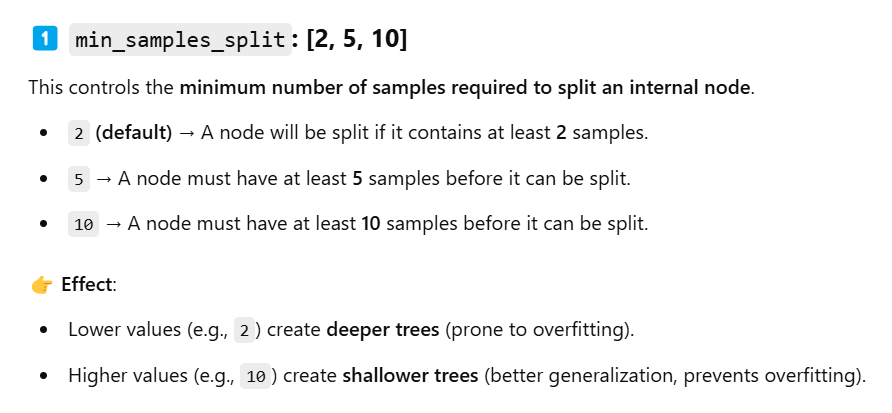

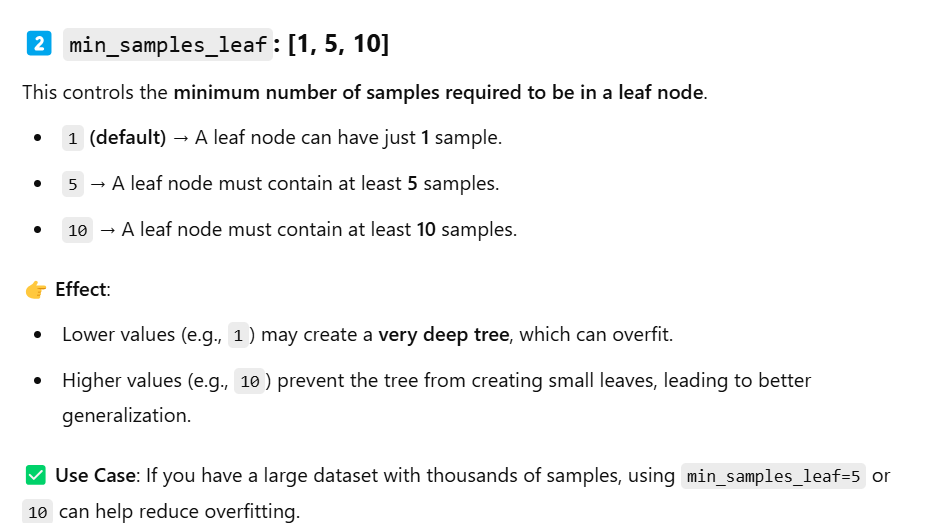

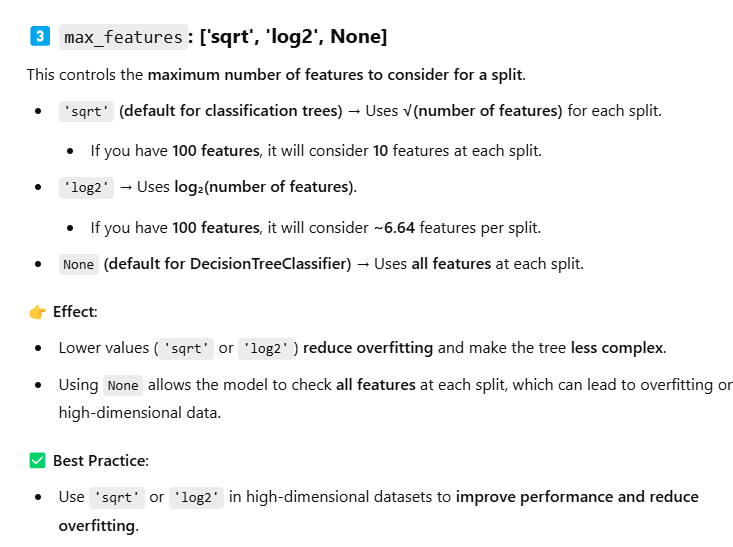

In [ ]:
best_model = grid_search.best_estimator_

In [ ]:
# Get the predicted classes
train_class_preds = best_model.predict(X_train)  #Predict class labels for samples in X_train(X train consist shape(n_samples, n_features)).
test_class_preds = best_model.predict(X_test)

#### 6.2.4. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[[1014 1312]
 [ 400 1880]]


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

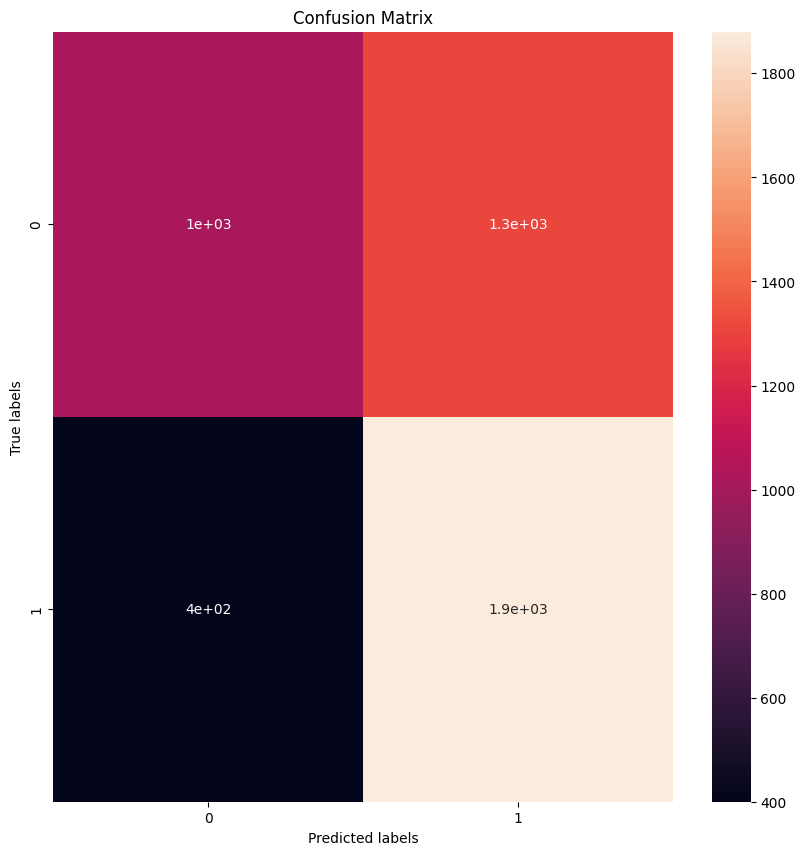

In [ ]:
#checking all the relevant metrics for Train Data
# Get the confusion matrix for both train and test

labels = ['0', '1']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

plt.figure(figsize=(10,10))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
print('TP: Predicted as future CHD, Actual CHD: ' ,cm[-1][-1])
print('TN: Predicted as No future CHD, Actual No CHD: ',cm[0][0])
print('FP: Predicted as future CHD, Actual No future CHD: ', cm[0][1])
print('FN: Predicted as No future CHD, Actual Future CHD: ', cm[1][0])


#For Train dataset
#Get the accuracy scores
train_accuracy = accuracy_score(y_train,train_class_preds)
print("The accuracy on train data is ", train_accuracy)

#precision
train_precision = precision_score(y_train, train_class_preds)   #sklearn.metrics.precision_score(y_true, y_pred)
print("The precision on train data is ", train_precision)

#recall
train_recall = recall_score( y_train,train_class_preds)
print("The recall on train data is ", train_recall)

#ROC
roc_auc = roc_auc_score(y_train,train_class_preds)
print("The auc-roc on train data is ",roc_auc)

TP: Predicted as future CHD, Actual CHD:  1880
TN: Predicted as No future CHD, Actual No CHD:  1014
FP: Predicted as future CHD, Actual No future CHD:  1312
FN: Predicted as No future CHD, Actual Future CHD:  400
The accuracy on train data is  0.6283108988276161
The precision on train data is  0.5889724310776943
The recall on train data is  0.8245614035087719
The auc-roc on train data is  0.6302514670166387


In [ ]:
#Metrics Data frame for Train Data
dictDT_CV = {'Accuracy' : round(train_accuracy,3), 'Precision':round(train_precision,3) , 'Recall':round(train_recall,3), 'ROC-AUC':round(roc_auc,3)}

# Convert the dictionary to a DataFrame with the desired index and concatenate
new_row = pd.DataFrame(dictDT_CV, index=['Decision Tree_GridCV'])
Train_DF = pd.concat([Train_DF, new_row])

print(Train_DF)

                      Accuracy  Precision  Recall  ROC-AUC
Logistic Regression      0.698      0.689   0.711    0.698
GridCV                   0.699      0.687   0.720    0.699
Decision Tree            1.000      1.000   1.000    1.000
Decision Tree_GridCV     0.628      0.589   0.825    0.630


[[236 317]
 [110 489]]


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

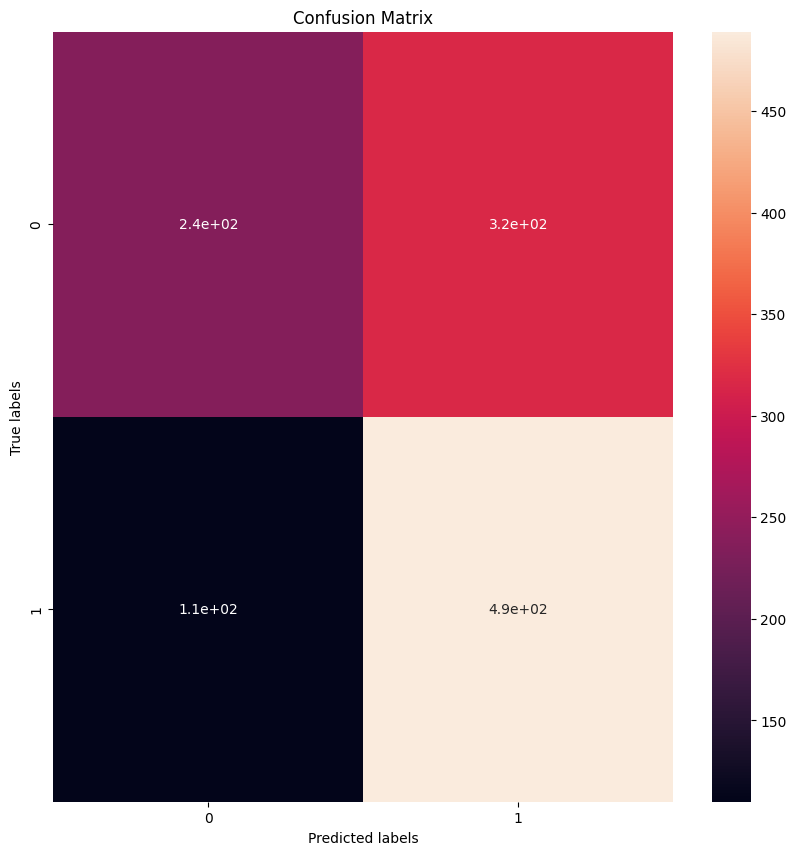

In [ ]:
#checking all the relevant metrics for Test Data
# Get the confusion matrix for both train and test
labels = ['0', '1']
cm = confusion_matrix(y_test,test_class_preds)
print(cm)

plt.figure(figsize=(10,10))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
print('TP: Predicted as future CHD, Actual CHD: ' ,cm[-1][-1])
print('TN: Predicted as No future CHD, Actual No CHD: ',cm[0][0])
print('FP: Predicted as future CHD, Actual No future CHD: ', cm[0][1])
print('FN: Predicted as No future CHD, Actual Future CHD: ', cm[1][0])

#For Test Data
#Get the accuracy score
test_accuracy = accuracy_score(y_test,test_class_preds)
print("The accuracy on test data is ", test_accuracy)

#Get the precssion score
test_precision = precision_score(y_test, test_class_preds)
print("The precision on test data is ", test_precision)

#recall
test_recall = recall_score( y_test,test_class_preds)
print("The recall on test data is ", test_recall)


#AUC-ROC
roc_auc = roc_auc_score(y_test,test_class_preds)
print("The ROC-AUC on test data is ", roc_auc)

TP: Predicted as future CHD, Actual CHD:  489
TN: Predicted as No future CHD, Actual No CHD:  236
FP: Predicted as future CHD, Actual No future CHD:  317
FN: Predicted as No future CHD, Actual Future CHD:  110
The accuracy on test data is  0.6293402777777778
The precision on test data is  0.6066997518610422
The recall on test data is  0.8163606010016694
The ROC-AUC on test data is  0.6215618556545417


In [ ]:
#Metrics Data frame for Train Data
dictDT_CV = {'Accuracy' : round(test_accuracy,3), 'Precision':round(test_precision,3) , 'Recall':round(test_recall,3), 'ROC-AUC':round(roc_auc,3)}

# Convert the dictionary to a DataFrame with the desired index and concatenate
new_row = pd.DataFrame(dictDT_CV, index=['Decision Tree_GridCV'])
Test_DF = pd.concat([Test_DF, new_row])

print(Test_DF)

                      Accuracy  Precision  Recall  ROC-AUC
Logistic Regression      0.704      0.711   0.725    0.703
GridCV                   0.702      0.708   0.726    0.701
Decision Tree            0.788      0.799   0.791    0.788
Decision Tree_GridCV     0.629      0.607   0.816    0.622


### 6.3 ML Model - 3 : Random forest.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Get the predicted classes
train_class_preds = DT_classifier.predict(X_train)
test_class_preds = DT_classifier.predict(X_test)

#### 6.3.1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[[2326    0]
 [   0 2280]]


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

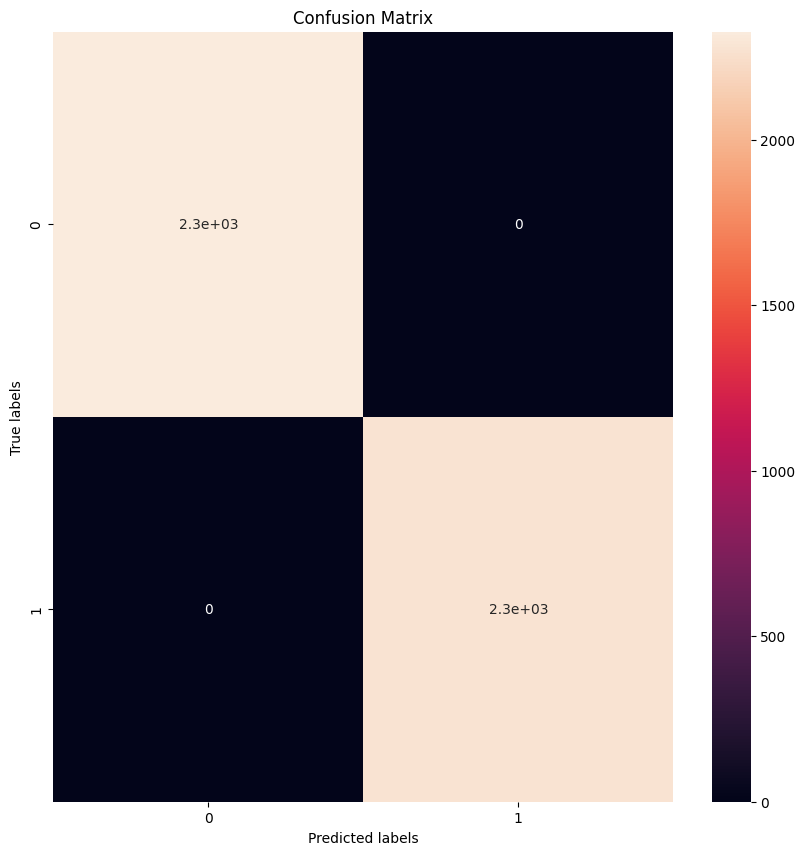

In [ ]:
#checking all the relevant metrics for Train Data
# Get the confusion matrix for both train and test

labels = ['0', '1']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

plt.figure(figsize=(10,10))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
print('TP: Predicted as future CHD, Actual CHD: ' ,cm[-1][-1])
print('TN: Predicted as No future CHD, Actual No CHD: ',cm[0][0])
print('FP: Predicted as future CHD, Actual No future CHD: ', cm[0][1])
print('FN: Predicted as No future CHD, Actual Future CHD: ', cm[1][0])

#For Train dataset
#Get the accuracy scores
train_accuracy = accuracy_score(y_train,train_class_preds)
print("The accuracy on train data is ", train_accuracy)

#precision
train_precision = precision_score(y_train, train_class_preds)   #sklearn.metrics.precision_score(y_true, y_pred)
print("The precision on train data is ", train_precision)

#recall
train_recall = recall_score( y_train,train_class_preds)
print("The recall on train data is ", train_recall)

roc_auc = roc_auc_score(y_train,train_class_preds)
print("The AOC-RUC on train data is ", roc_auc)

TP: Predicted as future CHD, Actual CHD:  2280
TN: Predicted as No future CHD, Actual No CHD:  2326
FP: Predicted as future CHD, Actual No future CHD:  0
FN: Predicted as No future CHD, Actual Future CHD:  0
The accuracy on train data is  1.0
The precision on train data is  1.0
The recall on train data is  1.0
The AOC-RUC on train data is  1.0


In [ ]:
#Metrics Data frame for Train Data
dictRF = {'Accuracy' : round(train_accuracy,3), 'Precision':round(train_precision,3) , 'Recall':round(train_recall,3), 'ROC-AUC':round(roc_auc,3)}

# Convert the dictionary to a DataFrame with the desired index and concatenate
new_row = pd.DataFrame(dictRF, index=['Random forest'])
Train_DF = pd.concat([Train_DF, new_row])

print(Train_DF)

                      Accuracy  Precision  Recall  ROC-AUC
Logistic Regression      0.698      0.689   0.711    0.698
GridCV                   0.699      0.687   0.720    0.699
Decision Tree            1.000      1.000   1.000    1.000
Decision Tree_GridCV     0.628      0.589   0.825    0.630
Random forest            1.000      1.000   1.000    1.000


[[434 119]
 [125 474]]


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

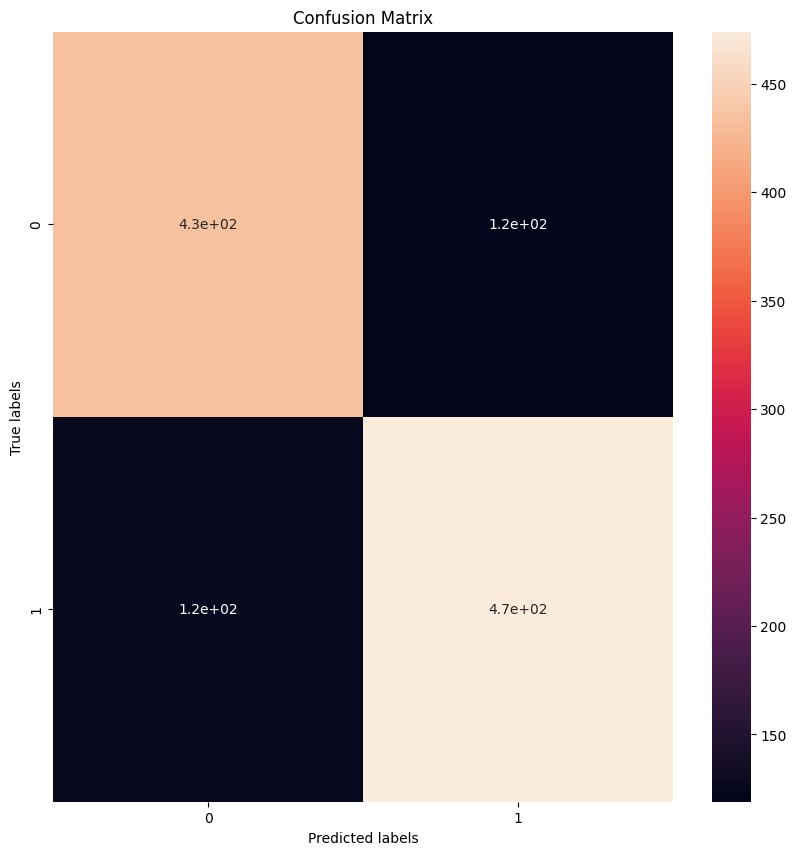

In [ ]:
#checking all the relevant metrics for Test Data
# Get the confusion matrix for both train and test
labels = ['0', '1']
cm = confusion_matrix(y_test,test_class_preds)
print(cm)

plt.figure(figsize=(10,10))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
print('TP: Predicted as future CHD, Actual CHD: ' ,cm[-1][-1])
print('TN: Predicted as No future CHD, Actual No CHD: ',cm[0][0])
print('FP: Predicted as future CHD, Actual No future CHD: ', cm[0][1])
print('FN: Predicted as No future CHD, Actual Future CHD: ', cm[1][0])

#For Test Data
#Get the accuracy score
test_accuracy = accuracy_score(y_test,test_class_preds)
print("The accuracy on test data is ", test_accuracy)

#Get the precssion score
test_precision = precision_score(y_test, test_class_preds)
print("The precision on test data is ", test_precision)

#recall
test_recall = recall_score( y_test,test_class_preds)
print("The recall on test data is ", test_recall)


#AUC-ROC
roc_auc = roc_auc_score(y_test,test_class_preds)
print("The ROC-AUC on test data is ", roc_auc)

TP: Predicted as future CHD, Actual CHD:  474
TN: Predicted as No future CHD, Actual No CHD:  434
FP: Predicted as future CHD, Actual No future CHD:  119
FN: Predicted as No future CHD, Actual Future CHD:  125
The accuracy on test data is  0.7881944444444444
The precision on test data is  0.7993254637436762
The recall on test data is  0.7913188647746243
The ROC-AUC on test data is  0.7880644956784514


In [ ]:
#Metrics Data frame for Train Data
dictRF = {'Accuracy' : round(test_accuracy,3), 'Precision':round(test_precision,3) , 'Recall':round(test_recall,3), 'ROC-AUC':round(roc_auc,3)}

# Convert the dictionary to a DataFrame with the desired index and concatenate
new_row = pd.DataFrame(dictRF, index=['Random forest'])
Test_DF = pd.concat([Test_DF, new_row])

print(Test_DF)

                      Accuracy  Precision  Recall  ROC-AUC
Logistic Regression      0.704      0.711   0.725    0.703
GridCV                   0.702      0.708   0.726    0.701
Decision Tree            0.788      0.799   0.791    0.788
Decision Tree_GridCV     0.629      0.607   0.816    0.622
Random forest            0.788      0.799   0.791    0.788


#### 6.3.2 Cross- Validation & Hyperparameter Tuning in Random forest.

In [ ]:
'''
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'criterion' : ['gini','entropy', 'log_loss'],
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid,
                           cv=5, scoring='recall', n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)
'''

"\nfrom sklearn.model_selection import GridSearchCV\n\n# Define the parameter grid\nparam_grid = {\n    'criterion' : ['gini','entropy', 'log_loss'],\n    'n_estimators': [50, 100, 200],\n    'max_depth': [None, 10, 20],\n    'min_samples_split': [2, 5, 10],\n    'min_samples_leaf': [1, 2, 4]\n}\n\n# Initialize RandomForestClassifier\nrf_classifier = RandomForestClassifier(random_state=42)\n\n# Perform Grid Search with 5-fold cross-validation\ngrid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid,\n                           cv=5, scoring='recall', n_jobs=-1, verbose=2)\n\n# Fit the model\ngrid_search.fit(X_train, y_train)\n"

In [ ]:
'''
# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
'''

'\n# Print the best parameters and best score\nprint("Best Parameters:", grid_search.best_params_)\n'

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100],
    'max_depth': [None],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}

# Initialize RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the model
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None], 'min_samples_leaf': [1],
                         'min_samples_split': [2], 'n_estimators': [100]},
             scoring='accuracy', verbose=1)

In [ ]:
best_model = grid_search.best_estimator_

# Get the predicted classes
train_class_preds = best_model.predict(X_train)  #Predict class labels for samples in X_train(X train consist shape(n_samples, n_features)).
test_class_preds = best_model.predict(X_test)

#### 6.3.3. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[[2326    0]
 [   0 2280]]


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

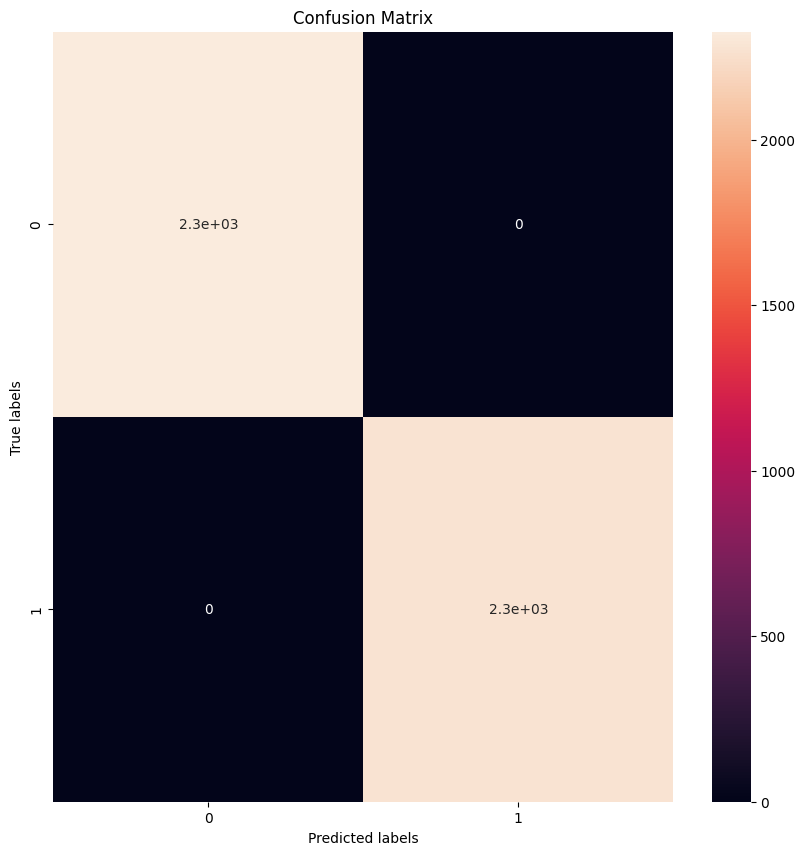

In [ ]:
#checking all the relevant metrics for Train Data
# Get the confusion matrix for both train and test

labels = ['0', '1']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

plt.figure(figsize=(10,10))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
print('TP: Predicted as future CHD, Actual CHD: ' ,cm[-1][-1])
print('TN: Predicted as No future CHD, Actual No CHD: ',cm[0][0])
print('FP: Predicted as future CHD, Actual No future CHD: ', cm[0][1])
print('FN: Predicted as No future CHD, Actual Future CHD: ', cm[1][0])


#For Train dataset
#Get the accuracy scores
train_accuracy = accuracy_score(y_train,train_class_preds)
print("The accuracy on train data is ", train_accuracy)

#precision
train_precision = precision_score(y_train, train_class_preds)   #sklearn.metrics.precision_score(y_true, y_pred)
print("The precision on train data is ", train_precision)

#recall
train_recall = recall_score( y_train,train_class_preds)
print("The recall on train data is ", train_recall)

#ROC
roc_auc = roc_auc_score(y_train,train_class_preds)
print("The auc-roc on train data is ",roc_auc)

TP: Predicted as future CHD, Actual CHD:  2280
TN: Predicted as No future CHD, Actual No CHD:  2326
FP: Predicted as future CHD, Actual No future CHD:  0
FN: Predicted as No future CHD, Actual Future CHD:  0
The accuracy on train data is  1.0
The precision on train data is  1.0
The recall on train data is  1.0
The auc-roc on train data is  1.0


In [ ]:
#Metrics Data frame for Train Data
dictRF_CV = {'Accuracy' : round(train_accuracy,3), 'Precision':round(train_precision,3) , 'Recall':round(train_recall,3), 'ROC-AUC':round(roc_auc,3)}

# Convert the dictionary to a DataFrame with the desired index and concatenate
new_row = pd.DataFrame(dictRF_CV, index=['Random forest_GridCV'])
Train_DF = pd.concat([Train_DF, new_row])

print(Train_DF)

                      Accuracy  Precision  Recall  ROC-AUC
Logistic Regression      0.698      0.689   0.711    0.698
GridCV                   0.699      0.687   0.720    0.699
Decision Tree            1.000      1.000   1.000    1.000
Decision Tree_GridCV     0.628      0.589   0.825    0.630
Random forest            1.000      1.000   1.000    1.000
Random forest_GridCV     1.000      1.000   1.000    1.000


[[492  61]
 [ 57 542]]


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

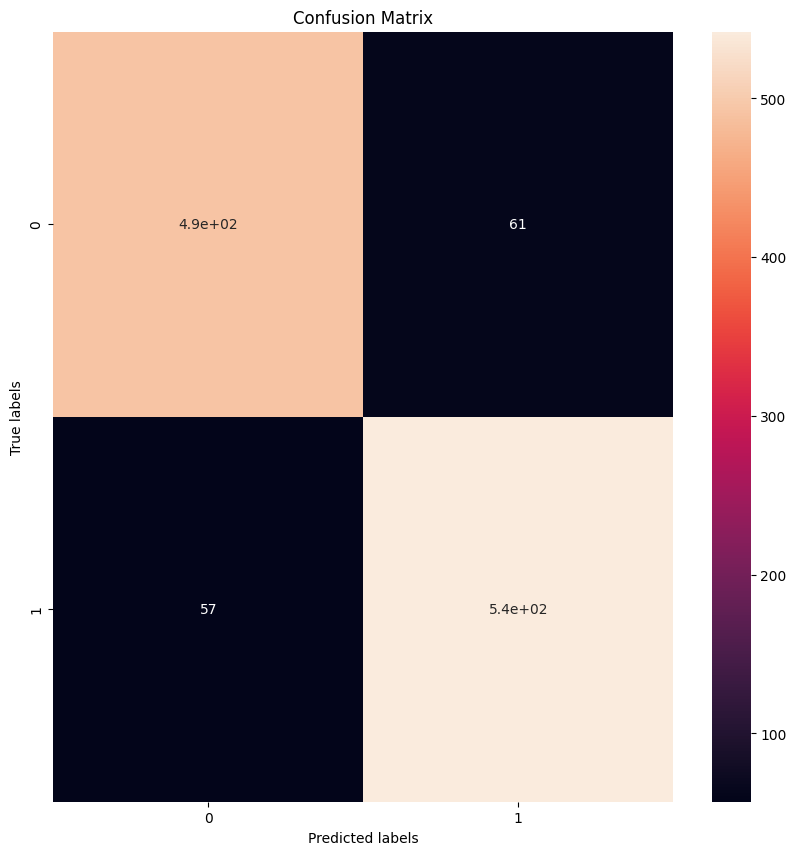

In [ ]:
#checking all the relevant metrics for Test Data
# Get the confusion matrix for both train and test
labels = ['0', '1']
cm = confusion_matrix(y_test,test_class_preds)
print(cm)

plt.figure(figsize=(10,10))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
print('TP: Predicted as future CHD, Actual CHD: ' ,cm[-1][-1])
print('TN: Predicted as No future CHD, Actual No CHD: ',cm[0][0])
print('FP: Predicted as future CHD, Actual No future CHD: ', cm[0][1])
print('FN: Predicted as No future CHD, Actual Future CHD: ', cm[1][0])

#For Test Data
#Get the accuracy score
test_accuracy = accuracy_score(y_test,test_class_preds)
print("The accuracy on test data is ", test_accuracy)

#Get the precssion score
test_precision = precision_score(y_test, test_class_preds)
print("The precision on test data is ", test_precision)

#recall
test_recall = recall_score( y_test,test_class_preds)
print("The recall on test data is ", test_recall)


#AUC-ROC
roc_auc = roc_auc_score(y_test,test_class_preds)
print("The ROC-AUC on test data is ", roc_auc)

TP: Predicted as future CHD, Actual CHD:  542
TN: Predicted as No future CHD, Actual No CHD:  492
FP: Predicted as future CHD, Actual No future CHD:  61
FN: Predicted as No future CHD, Actual Future CHD:  57
The accuracy on test data is  0.8975694444444444
The precision on test data is  0.8988391376451078
The recall on test data is  0.9048414023372288
The ROC-AUC on test data is  0.8972669941161732


In [ ]:
#Metrics Data frame for Train Data
dictRF_CV = {'Accuracy' : round(test_accuracy,3), 'Precision':round(test_precision,3) , 'Recall':round(test_recall,3), 'ROC-AUC':round(roc_auc,3)
}

# Convert the dictionary to a DataFrame with the desired index and concatenate
new_row = pd.DataFrame(dictRF_CV, index=['Random forest_GridCV'])
Test_DF = pd.concat([Test_DF, new_row])

print(Test_DF)

                      Accuracy  Precision  Recall  ROC-AUC
Logistic Regression      0.704      0.711   0.725    0.703
GridCV                   0.702      0.708   0.726    0.701
Decision Tree            0.788      0.799   0.791    0.788
Decision Tree_GridCV     0.629      0.607   0.816    0.622
Random forest            0.788      0.799   0.791    0.788
Random forest_GridCV     0.898      0.899   0.905    0.897


### 6.4 ML Model - 4 : Boosting algorithim : Gradient Boost.

Scikit-learn provides two implementations of gradient-boosted trees:

HistGradientBoostingClassifier(Inspired by LightGBM) vs GradientBoostingClassifier for classification, and the corresponding classes for regression.

GradientBoostingClassifier and GradientBoostingRegressor might be preferred for small sample sizes since binning may lead to split points that are too approximate in this setting.

Since our dataset size is small we can go with GradientBoostingClassifier.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1,max_depth=3, random_state=42,min_samples_split=5, min_samples_leaf=1)
clf.fit(X_train, y_train)

# Get the predicted classes
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

#### 6.4.1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[[1929  397]
 [ 336 1944]]


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

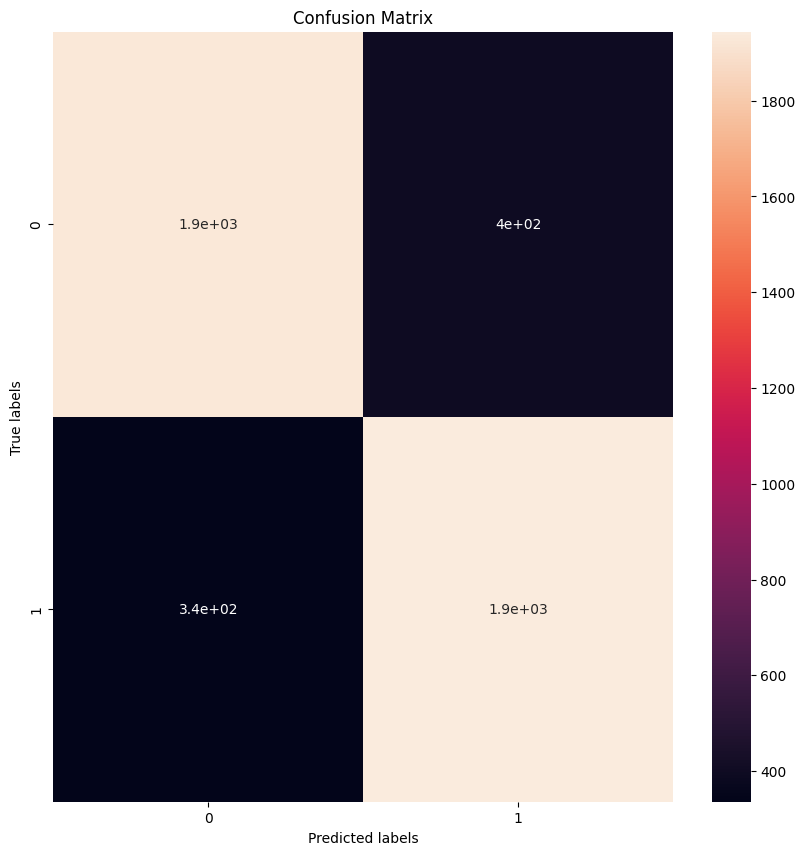

In [ ]:
#checking all the relevant metrics for Train Data
# Get the confusion matrix for both train and test

labels = ['0', '1']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

plt.figure(figsize=(10,10))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
print('TP: Predicted as future CHD, Actual CHD: ' ,cm[-1][-1])
print('TN: Predicted as No future CHD, Actual No CHD: ',cm[0][0])
print('FP: Predicted as future CHD, Actual No future CHD: ', cm[0][1])
print('FN: Predicted as No future CHD, Actual Future CHD: ', cm[1][0])

#For Train dataset
#Get the accuracy scores
train_accuracy = accuracy_score(y_train,train_class_preds)
print("The accuracy on train data is ", train_accuracy)

#precision
train_precision = precision_score(y_train, train_class_preds)   #sklearn.metrics.precision_score(y_true, y_pred)
print("The precision on train data is ", train_precision)

#recall
train_recall = recall_score( y_train,train_class_preds)
print("The recall on train data is ", train_recall)

roc_auc = roc_auc_score(y_train,train_class_preds)
print("The AOC-RUC on train data is ", roc_auc)

TP: Predicted as future CHD, Actual CHD:  1944
TN: Predicted as No future CHD, Actual No CHD:  1929
FP: Predicted as future CHD, Actual No future CHD:  397
FN: Predicted as No future CHD, Actual Future CHD:  336
The accuracy on train data is  0.840859748154581
The precision on train data is  0.8304143528406663
The recall on train data is  0.8526315789473684
The AOC-RUC on train data is  0.8409761506086799


In [ ]:
#Metrics Data frame for Train Data
dictGBM = {'Accuracy' : round(train_accuracy,3), 'Precision':round(train_precision,3) , 'Recall':round(train_recall,3), 'ROC-AUC':round(roc_auc,3)}

# Convert the dictionary to a DataFrame with the desired index and concatenate
new_row = pd.DataFrame(dictGBM, index=['Gradient Boosting'])
Train_DF = pd.concat([Train_DF, new_row])

print(Train_DF)

                      Accuracy  Precision  Recall  ROC-AUC
Logistic Regression      0.698      0.689   0.711    0.698
GridCV                   0.699      0.687   0.720    0.699
Decision Tree            1.000      1.000   1.000    1.000
Decision Tree_GridCV     0.628      0.589   0.825    0.630
Random forest            1.000      1.000   1.000    1.000
Random forest_GridCV     1.000      1.000   1.000    1.000
Gradient Boosting        0.841      0.830   0.853    0.841


[[439 114]
 [105 494]]


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

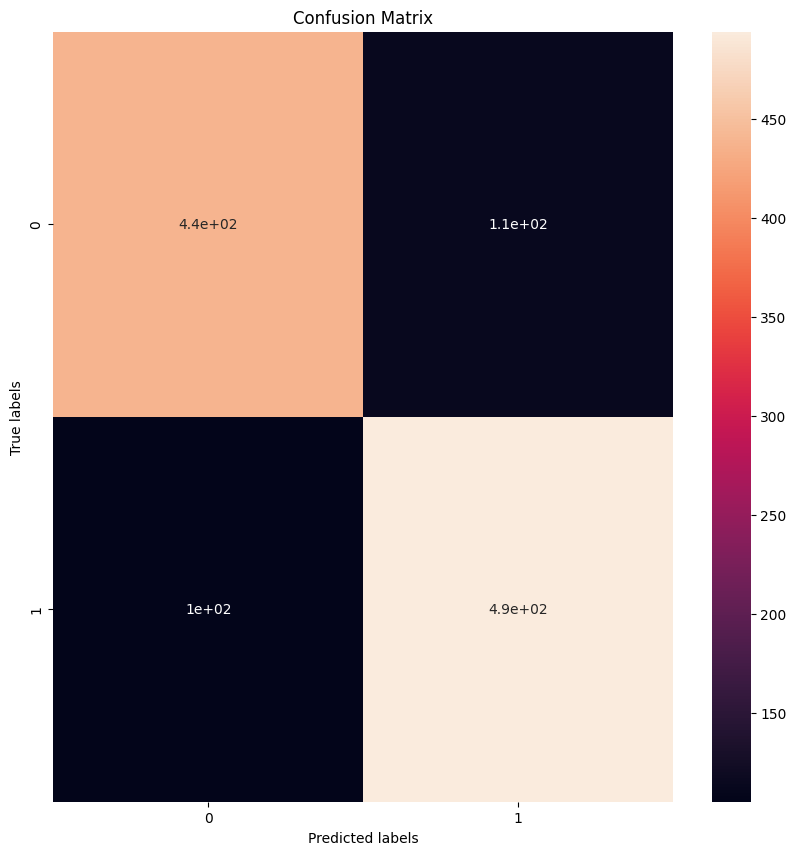

In [ ]:
#checking all the relevant metrics for Test Data
# Get the confusion matrix for both train and test
labels = ['0', '1']
cm = confusion_matrix(y_test,test_class_preds)
print(cm)

plt.figure(figsize=(10,10))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
print('TP: Predicted as future CHD, Actual CHD: ' ,cm[-1][-1])
print('TN: Predicted as No future CHD, Actual No CHD: ',cm[0][0])
print('FP: Predicted as future CHD, Actual No future CHD: ', cm[0][1])
print('FN: Predicted as No future CHD, Actual Future CHD: ', cm[1][0])

#For Test Data
#Get the accuracy score
test_accuracy = accuracy_score(y_test,test_class_preds)
print("The accuracy on test data is ", test_accuracy)

#Get the precssion score
test_precision = precision_score(y_test, test_class_preds)
print("The precision on test data is ", test_precision)

#recall
test_recall = recall_score( y_test,test_class_preds)
print("The recall on test data is ", test_recall)


#AUC-ROC
roc_auc = roc_auc_score(y_test,test_class_preds)
print("The ROC-AUC on test data is ", roc_auc)

TP: Predicted as future CHD, Actual CHD:  494
TN: Predicted as No future CHD, Actual No CHD:  439
FP: Predicted as future CHD, Actual No future CHD:  114
FN: Predicted as No future CHD, Actual Future CHD:  105
The accuracy on test data is  0.8098958333333334
The precision on test data is  0.8125
The recall on test data is  0.8247078464106845
The ROC-AUC on test data is  0.8092797821565176


In [ ]:
#Metrics Data frame for Test Data
dictGBM = {'Accuracy' : round(test_accuracy,3), 'Precision':round(test_precision,3) , 'Recall':round(test_recall,3), 'ROC-AUC':round(roc_auc,3)}

# Convert the dictionary to a DataFrame with the desired index and concatenate
new_row = pd.DataFrame(dictGBM, index=['Gradient Boosting'])
Test_DF = pd.concat([Test_DF, new_row])

print(Test_DF)

                      Accuracy  Precision  Recall  ROC-AUC
Logistic Regression      0.704      0.711   0.725    0.703
GridCV                   0.702      0.708   0.726    0.701
Decision Tree            0.788      0.799   0.791    0.788
Decision Tree_GridCV     0.629      0.607   0.816    0.622
Random forest            0.788      0.799   0.791    0.788
Random forest_GridCV     0.898      0.899   0.905    0.897
Gradient Boosting        0.810      0.812   0.825    0.809


### 6.5 ML Model - 5 : Boosting algorithim : Adaboost.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize and train
clf = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42,estimator=DecisionTreeClassifier(max_depth=3))
clf.fit(X_train, y_train)

# Get the predicted classes
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

#### 6.5.1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[[1918  408]
 [ 362 1918]]


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

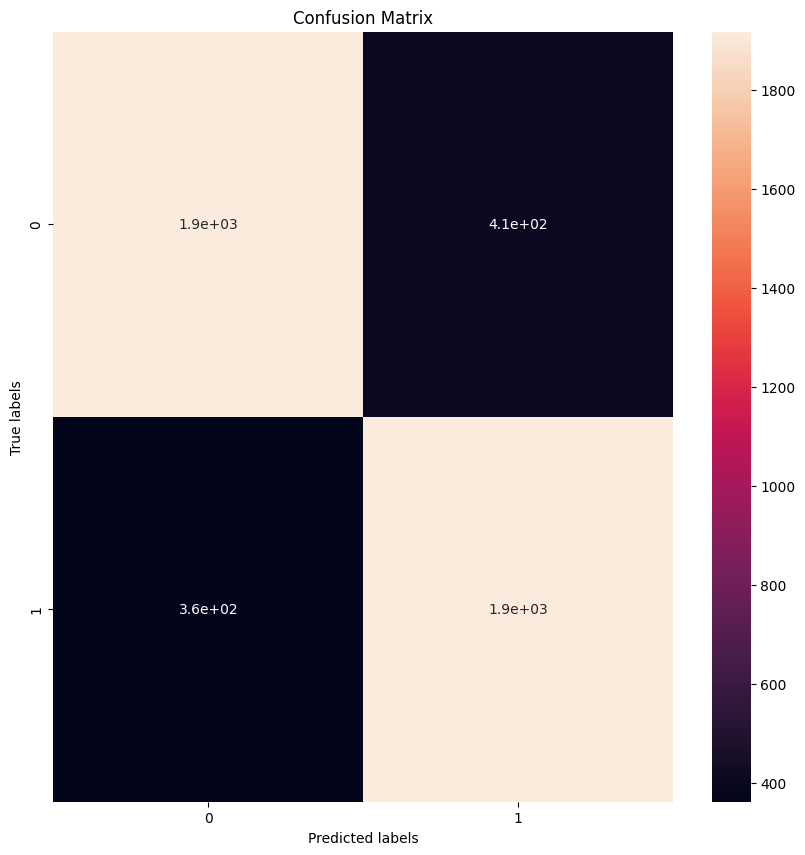

In [ ]:
#checking all the relevant metrics for Train Data
# Get the confusion matrix for both train and test

labels = ['0', '1']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

plt.figure(figsize=(10,10))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
print('TP: Predicted as future CHD, Actual CHD: ' ,cm[-1][-1])
print('TN: Predicted as No future CHD, Actual No CHD: ',cm[0][0])
print('FP: Predicted as future CHD, Actual No future CHD: ', cm[0][1])
print('FN: Predicted as No future CHD, Actual Future CHD: ', cm[1][0])

#For Train dataset
#Get the accuracy scores
train_accuracy = accuracy_score(y_train,train_class_preds)
print("The accuracy on train data is ", train_accuracy)

#precision
train_precision = precision_score(y_train, train_class_preds)   #sklearn.metrics.precision_score(y_true, y_pred)
print("The precision on train data is ", train_precision)

#recall
train_recall = recall_score( y_train,train_class_preds)
print("The recall on train data is ", train_recall)

roc_auc = roc_auc_score(y_train,train_class_preds)
print("The AOC-RUC on train data is ", roc_auc)

TP: Predicted as future CHD, Actual CHD:  1918
TN: Predicted as No future CHD, Actual No CHD:  1918
FP: Predicted as future CHD, Actual No future CHD:  408
FN: Predicted as No future CHD, Actual Future CHD:  362
The accuracy on train data is  0.8328267477203647
The precision on train data is  0.8245915735167669
The recall on train data is  0.8412280701754385
The AOC-RUC on train data is  0.8329098218461027


In [ ]:
#Metrics Data frame for Train Data
dictAB = {'Accuracy' : round(train_accuracy,3), 'Precision':round(train_precision,3) , 'Recall':round(train_recall,3), 'ROC-AUC':round(roc_auc,3)
}

# Convert the dictionary to a DataFrame with the desired index and concatenate
new_row = pd.DataFrame(dictAB, index=['Adaboost'])
Train_DF = pd.concat([Train_DF, new_row])

print(Train_DF)

                      Accuracy  Precision  Recall  ROC-AUC
Logistic Regression      0.698      0.689   0.711    0.698
GridCV                   0.699      0.687   0.720    0.699
Decision Tree            1.000      1.000   1.000    1.000
Decision Tree_GridCV     0.628      0.589   0.825    0.630
Random forest            1.000      1.000   1.000    1.000
Random forest_GridCV     1.000      1.000   1.000    1.000
Gradient Boosting        0.841      0.830   0.853    0.841
Adaboost                 0.833      0.825   0.841    0.833


[[429 124]
 [109 490]]


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

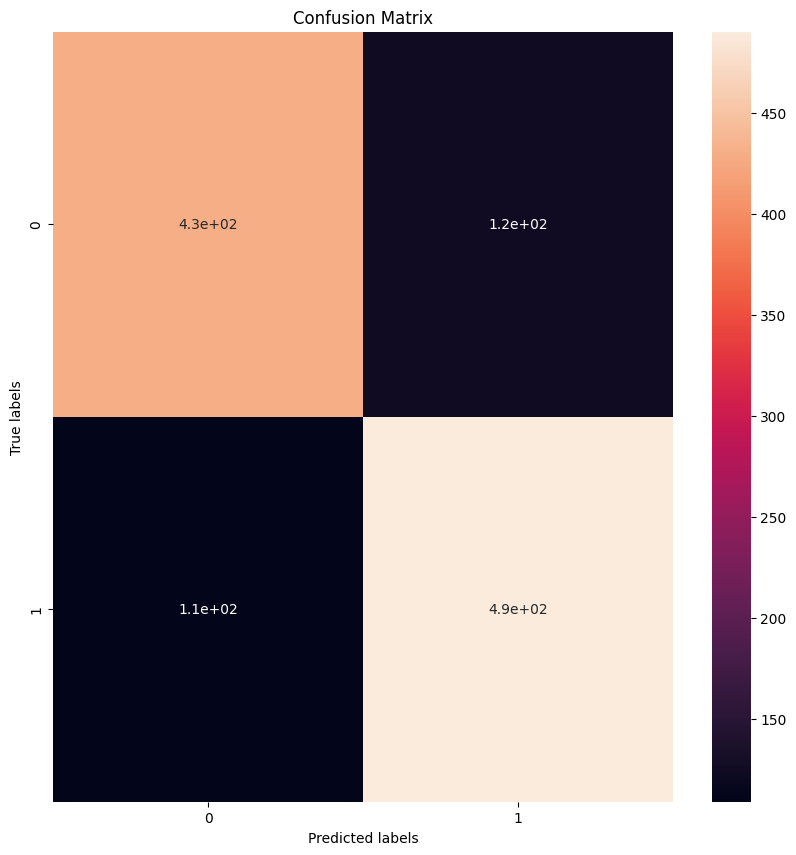

In [ ]:
#checking all the relevant metrics for Test Data
# Get the confusion matrix for both train and test
labels = ['0', '1']
cm = confusion_matrix(y_test,test_class_preds)
print(cm)

plt.figure(figsize=(10,10))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
print('TP: Predicted as future CHD, Actual CHD: ' ,cm[-1][-1])
print('TN: Predicted as No future CHD, Actual No CHD: ',cm[0][0])
print('FP: Predicted as future CHD, Actual No future CHD: ', cm[0][1])
print('FN: Predicted as No future CHD, Actual Future CHD: ', cm[1][0])

#For Test Data
#Get the accuracy score
test_accuracy = accuracy_score(y_test,test_class_preds)
print("The accuracy on test data is ", test_accuracy)

#Get the precssion score
test_precision = precision_score(y_test, test_class_preds)
print("The precision on test data is ", test_precision)

#recall
test_recall = recall_score( y_test,test_class_preds)
print("The recall on test data is ", test_recall)


#AUC-ROC
roc_auc = roc_auc_score(y_test,test_class_preds)
print("The ROC-AUC on test data is ", roc_auc)

TP: Predicted as future CHD, Actual CHD:  490
TN: Predicted as No future CHD, Actual No CHD:  429
FP: Predicted as future CHD, Actual No future CHD:  124
FN: Predicted as No future CHD, Actual Future CHD:  109
The accuracy on test data is  0.7977430555555556
The precision on test data is  0.7980456026058632
The recall on test data is  0.8180300500834724
The ROC-AUC on test data is  0.7968992926728392


In [ ]:
#Metrics Data frame for Test Data
dictAB = {'Accuracy' : round(test_accuracy,3), 'Precision':round(test_precision,3) , 'Recall':round(test_recall,3), 'ROC-AUC':round(roc_auc,3)}

# Convert the dictionary to a DataFrame with the desired index and concatenate
new_row = pd.DataFrame(dictAB, index=['Adaboost'])
Test_DF = pd.concat([Test_DF, new_row])

print(Test_DF)

                      Accuracy  Precision  Recall  ROC-AUC
Logistic Regression      0.704      0.711   0.725    0.703
GridCV                   0.702      0.708   0.726    0.701
Decision Tree            0.788      0.799   0.791    0.788
Decision Tree_GridCV     0.629      0.607   0.816    0.622
Random forest            0.788      0.799   0.791    0.788
Random forest_GridCV     0.898      0.899   0.905    0.897
Gradient Boosting        0.810      0.812   0.825    0.809
Adaboost                 0.798      0.798   0.818    0.797


### 6.6 ML Model - 6 : Boosting algorithim : XGboost.

In [ ]:
import xgboost as xgb
# Initialize and train
clf =  xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
clf.fit(X_train, y_train)

# Get the predicted classes
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

#### 6.6.1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[[1870  456]
 [ 402 1878]]


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

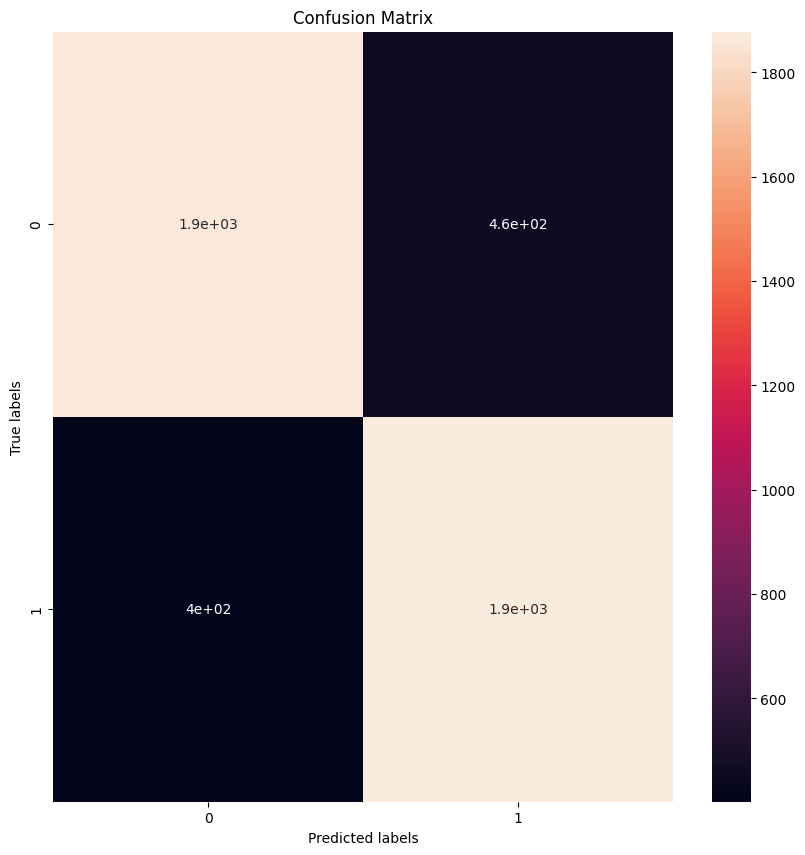

In [ ]:
#checking all the relevant metrics for Train Data
# Get the confusion matrix for both train and test

labels = ['0', '1']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

plt.figure(figsize=(10,10))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
print('TP: Predicted as future CHD, Actual CHD: ' ,cm[-1][-1])
print('TN: Predicted as No future CHD, Actual No CHD: ',cm[0][0])
print('FP: Predicted as future CHD, Actual No future CHD: ', cm[0][1])
print('FN: Predicted as No future CHD, Actual Future CHD: ', cm[1][0])

#For Train dataset
#Get the accuracy scores
train_accuracy = accuracy_score(y_train,train_class_preds)
print("The accuracy on train data is ", train_accuracy)

#precision
train_precision = precision_score(y_train, train_class_preds)   #sklearn.metrics.precision_score(y_true, y_pred)
print("The precision on train data is ", train_precision)

#recall
train_recall = recall_score( y_train,train_class_preds)
print("The recall on train data is ", train_recall)

roc_auc = roc_auc_score(y_train,train_class_preds)
print("The AOC-RUC on train data is ", roc_auc)

TP: Predicted as future CHD, Actual CHD:  1878
TN: Predicted as No future CHD, Actual No CHD:  1870
FP: Predicted as future CHD, Actual No future CHD:  456
FN: Predicted as No future CHD, Actual Future CHD:  402
The accuracy on train data is  0.8137212331741207
The precision on train data is  0.8046272493573264
The recall on train data is  0.8236842105263158
The AOC-RUC on train data is  0.8138197492872334


In [ ]:
#Metrics Data frame for Train Data
dictXGB = {'Accuracy' : round(train_accuracy,3), 'Precision':round(train_precision,3) , 'Recall':round(train_recall,3), 'ROC-AUC':round(roc_auc,3)}

# Convert the dictionary to a DataFrame with the desired index and concatenate
new_row = pd.DataFrame(dictXGB, index=['XGBoost'])
Train_DF = pd.concat([Train_DF, new_row])

print(Train_DF)

                      Accuracy  Precision  Recall  ROC-AUC
Logistic Regression      0.698      0.689   0.711    0.698
GridCV                   0.699      0.687   0.720    0.699
Decision Tree            1.000      1.000   1.000    1.000
Decision Tree_GridCV     0.628      0.589   0.825    0.630
Random forest            1.000      1.000   1.000    1.000
Random forest_GridCV     1.000      1.000   1.000    1.000
Gradient Boosting        0.841      0.830   0.853    0.841
Adaboost                 0.833      0.825   0.841    0.833
XGBoost                  0.814      0.805   0.824    0.814


[[422 131]
 [108 491]]


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

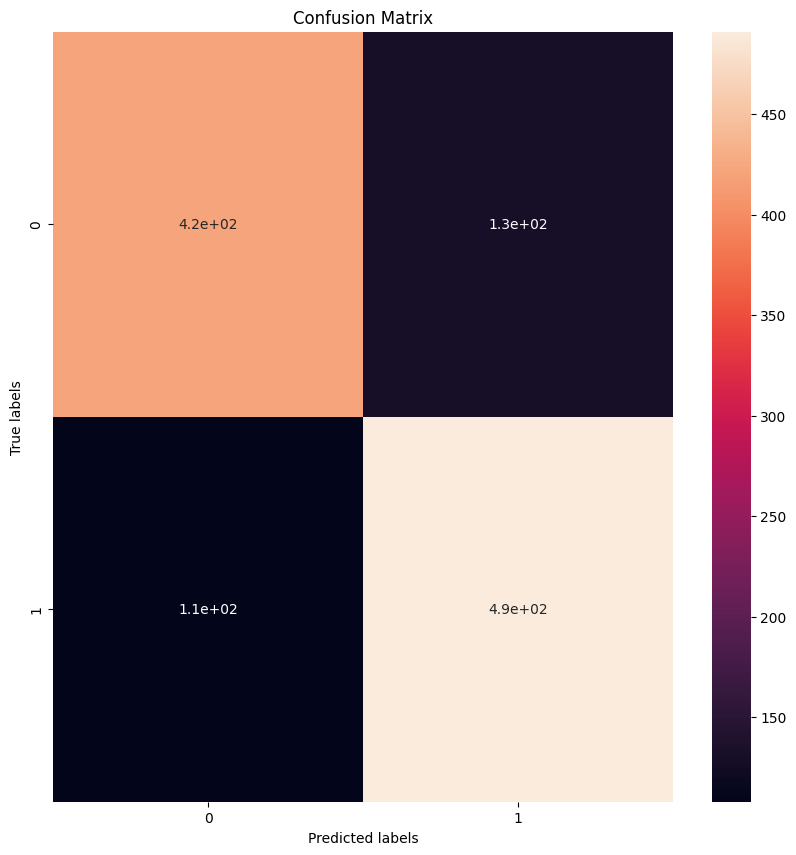

In [ ]:
#checking all the relevant metrics for Test Data
# Get the confusion matrix for both train and test
labels = ['0', '1']
cm = confusion_matrix(y_test,test_class_preds)
print(cm)

plt.figure(figsize=(10,10))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
print('TP: Predicted as future CHD, Actual CHD: ' ,cm[-1][-1])
print('TN: Predicted as No future CHD, Actual No CHD: ',cm[0][0])
print('FP: Predicted as future CHD, Actual No future CHD: ', cm[0][1])
print('FN: Predicted as No future CHD, Actual Future CHD: ', cm[1][0])

#For Test Data
#Get the accuracy score
test_accuracy = accuracy_score(y_test,test_class_preds)
print("The accuracy on test data is ", test_accuracy)

#Get the precssion score
test_precision = precision_score(y_test, test_class_preds)
print("The precision on test data is ", test_precision)

#recall
test_recall = recall_score( y_test,test_class_preds)
print("The recall on test data is ", test_recall)


#AUC-ROC
roc_auc = roc_auc_score(y_test,test_class_preds)
print("The ROC-AUC on test data is ", roc_auc)

TP: Predicted as future CHD, Actual CHD:  491
TN: Predicted as No future CHD, Actual No CHD:  422
FP: Predicted as future CHD, Actual No future CHD:  131
FN: Predicted as No future CHD, Actual Future CHD:  108
The accuracy on test data is  0.7925347222222222
The precision on test data is  0.7893890675241158
The recall on test data is  0.8196994991652755
The ROC-AUC on test data is  0.7914049032896903


In [ ]:
#Metrics Data frame for Test Data
dictAB = {'Accuracy' : round(test_accuracy,3), 'Precision':round(test_precision,3) , 'Recall':round(test_recall,3), 'ROC-AUC':round(roc_auc,3)}

# Convert the dictionary to a DataFrame with the desired index and concatenate
new_row = pd.DataFrame(dictAB, index=['XGboost'])
Test_DF = pd.concat([Test_DF, new_row])

print(Test_DF)

                      Accuracy  Precision  Recall  ROC-AUC
Logistic Regression      0.704      0.711   0.725    0.703
GridCV                   0.702      0.708   0.726    0.701
Decision Tree            0.788      0.799   0.791    0.788
Decision Tree_GridCV     0.629      0.607   0.816    0.622
Random forest            0.788      0.799   0.791    0.788
Random forest_GridCV     0.898      0.899   0.905    0.897
Gradient Boosting        0.810      0.812   0.825    0.809
Adaboost                 0.798      0.798   0.818    0.797
XGboost                  0.793      0.789   0.820    0.791


### 6.7 ML Model - 7 : Non Linear algorithim : Naive Bayes(Generative model).

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Initialize the model
clf = GaussianNB()

# Train the model
clf.fit(X_train, y_train)

# Get the predicted classes
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

#### 6.7.1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[[1636  690]
 [ 762 1518]]


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

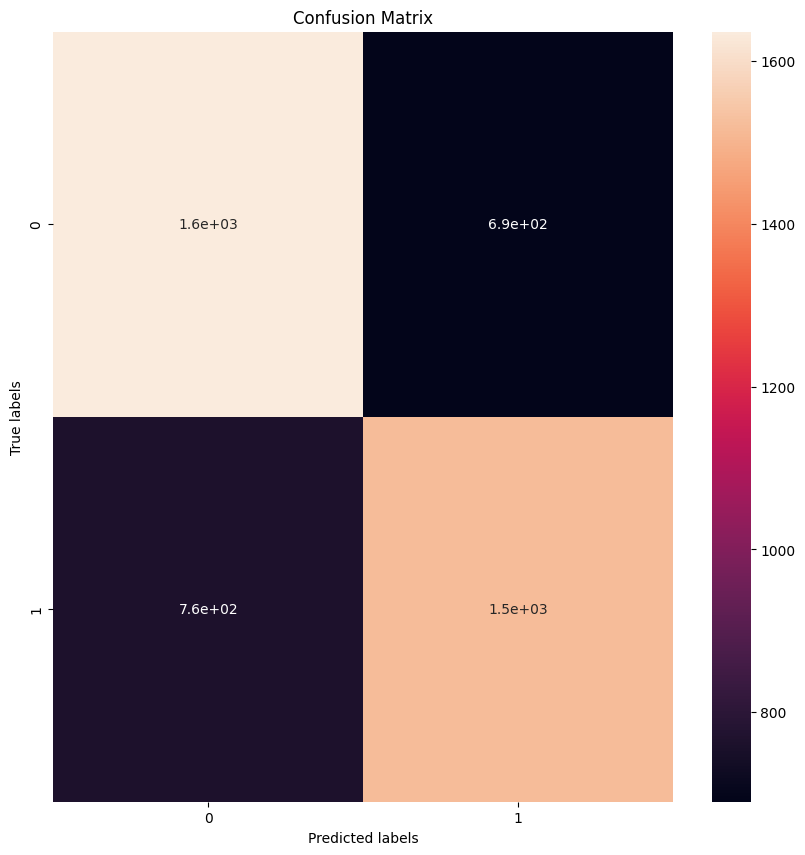

In [ ]:
#checking all the relevant metrics for Train Data
# Get the confusion matrix for both train and test

labels = ['0', '1']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

plt.figure(figsize=(10,10))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
print('TP: Predicted as future CHD, Actual CHD: ' ,cm[-1][-1])
print('TN: Predicted as No future CHD, Actual No CHD: ',cm[0][0])
print('FP: Predicted as future CHD, Actual No future CHD: ', cm[0][1])
print('FN: Predicted as No future CHD, Actual Future CHD: ', cm[1][0])

#For Train dataset
#Get the accuracy scores
train_accuracy = accuracy_score(y_train,train_class_preds)
print("The accuracy on train data is ", train_accuracy)

#precision
train_precision = precision_score(y_train, train_class_preds)   #sklearn.metrics.precision_score(y_true, y_pred)
print("The precision on train data is ", train_precision)

#recall
train_recall = recall_score( y_train,train_class_preds)
print("The recall on train data is ", train_recall)

roc_auc = roc_auc_score(y_train,train_class_preds)
print("The AOC-RUC on train data is ", roc_auc)

TP: Predicted as future CHD, Actual CHD:  1518
TN: Predicted as No future CHD, Actual No CHD:  1636
FP: Predicted as future CHD, Actual No future CHD:  690
FN: Predicted as No future CHD, Actual Future CHD:  762
The accuracy on train data is  0.6847590099869735
The precision on train data is  0.6875
The recall on train data is  0.6657894736842105
The AOC-RUC on train data is  0.6845714350364303


In [ ]:
#Metrics Data frame for Train Data
dictNB = {'Accuracy' : round(train_accuracy,3), 'Precision':round(train_precision,3) , 'Recall':round(train_recall,3), 'ROC-AUC':round(roc_auc,3)}

# Convert the dictionary to a DataFrame with the desired index and concatenate
new_row = pd.DataFrame(dictNB, index=['Naive Bayes'])
Train_DF = pd.concat([Train_DF, new_row])

print(Train_DF)

                      Accuracy  Precision  Recall  ROC-AUC
Logistic Regression      0.698      0.689   0.711    0.698
GridCV                   0.699      0.687   0.720    0.699
Decision Tree            1.000      1.000   1.000    1.000
Decision Tree_GridCV     0.628      0.589   0.825    0.630
Random forest            1.000      1.000   1.000    1.000
Random forest_GridCV     1.000      1.000   1.000    1.000
Gradient Boosting        0.841      0.830   0.853    0.841
Adaboost                 0.833      0.825   0.841    0.833
XGBoost                  0.814      0.805   0.824    0.814
Naive Bayes              0.685      0.688   0.666    0.685


[[377 176]
 [192 407]]


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

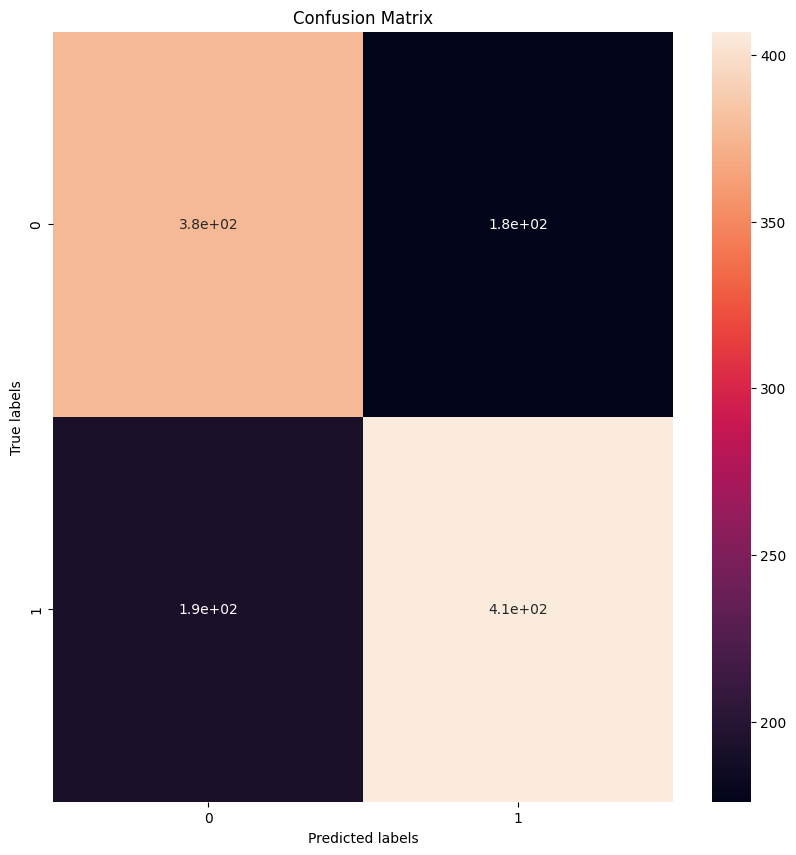

In [ ]:
#checking all the relevant metrics for Test Data
# Get the confusion matrix for both train and test
labels = ['0', '1']
cm = confusion_matrix(y_test,test_class_preds)
print(cm)

plt.figure(figsize=(10,10))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
print('TP: Predicted as future CHD, Actual CHD: ' ,cm[-1][-1])
print('TN: Predicted as No future CHD, Actual No CHD: ',cm[0][0])
print('FP: Predicted as future CHD, Actual No future CHD: ', cm[0][1])
print('FN: Predicted as No future CHD, Actual Future CHD: ', cm[1][0])

#For Test Data
#Get the accuracy score
test_accuracy = accuracy_score(y_test,test_class_preds)
print("The accuracy on test data is ", test_accuracy)

#Get the precssion score
test_precision = precision_score(y_test, test_class_preds)
print("The precision on test data is ", test_precision)

#recall
test_recall = recall_score( y_test,test_class_preds)
print("The recall on test data is ", test_recall)


#AUC-ROC
roc_auc = roc_auc_score(y_test,test_class_preds)
print("The ROC-AUC on test data is ", roc_auc)

TP: Predicted as future CHD, Actual CHD:  407
TN: Predicted as No future CHD, Actual No CHD:  377
FP: Predicted as future CHD, Actual No future CHD:  176
FN: Predicted as No future CHD, Actual Future CHD:  192
The accuracy on test data is  0.6805555555555556
The precision on test data is  0.6981132075471698
The recall on test data is  0.679465776293823
The ROC-AUC on test data is  0.6806008809136385


In [ ]:
#Metrics Data frame for Test Data
dictNB = {'Accuracy' : round(test_accuracy,3), 'Precision':round(test_precision,3) , 'Recall':round(test_recall,3), 'ROC-AUC':round(roc_auc,3)}

# Convert the dictionary to a DataFrame with the desired index and concatenate
new_row = pd.DataFrame(dictNB, index=['Naive Bayes'])
Test_DF = pd.concat([Test_DF, new_row])

print(Test_DF)

                      Accuracy  Precision  Recall  ROC-AUC
Logistic Regression      0.704      0.711   0.725    0.703
GridCV                   0.702      0.708   0.726    0.701
Decision Tree            0.788      0.799   0.791    0.788
Decision Tree_GridCV     0.629      0.607   0.816    0.622
Random forest            0.788      0.799   0.791    0.788
Random forest_GridCV     0.898      0.899   0.905    0.897
Gradient Boosting        0.810      0.812   0.825    0.809
Adaboost                 0.798      0.798   0.818    0.797
XGboost                  0.793      0.789   0.820    0.791
Naive Bayes              0.681      0.698   0.679    0.681


### 6.8 ML Model - 8 : SVM(Support Vector Machine ).

In [ ]:
from sklearn.svm import SVC

# Initialize the model
clf = SVC(
    kernel='rbf',     # 'rbf' and 'linear', 'poly', 'sigmoid' for poly degree 3 is defualt
    C=1.0,            # Regularization parameter
    gamma='scale',    # Kernel coefficient
    probability=False, # Enable if you want probability estimates,will slow down that method as it internally uses 5-fold cross-validation
    max_iter = -1,      #Hard limit on iterations within solver -1 indicates no limits
    random_state = 42,
    decision_function_shape = 'ovo' #one vs one or one vs rest
)


# Train the model
clf.fit(X_train, y_train)

# Get the predicted classes
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

#### 6.8.1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[[1781  545]
 [ 386 1894]]


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

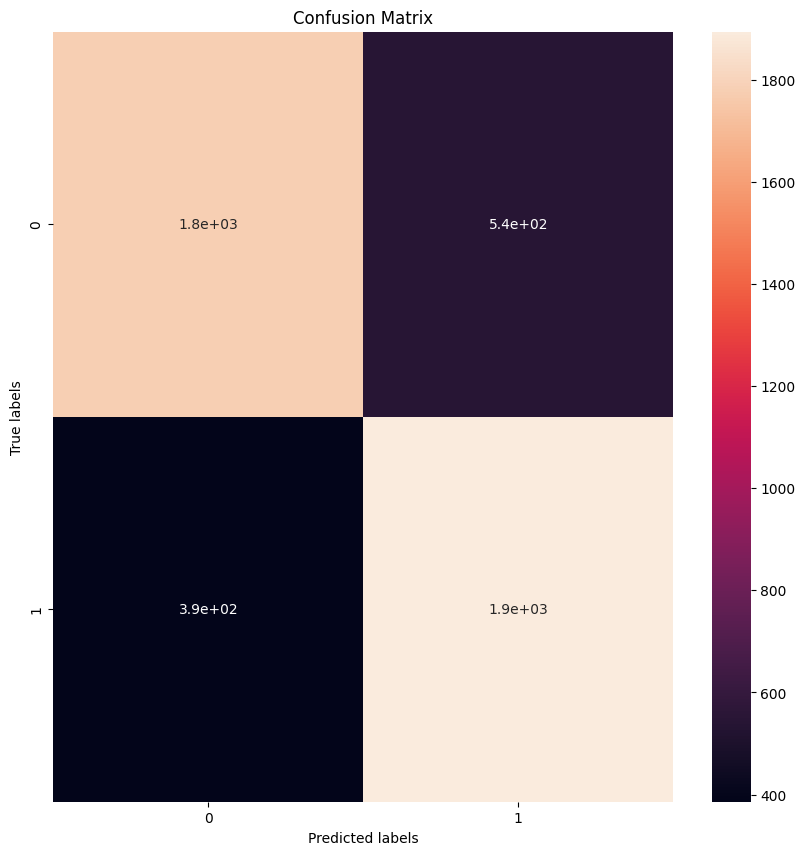

In [ ]:
#checking all the relevant metrics for Train Data
# Get the confusion matrix for both train and test

labels = ['0', '1']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

plt.figure(figsize=(10,10))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
print('TP: Predicted as future CHD, Actual CHD: ' ,cm[-1][-1])
print('TN: Predicted as No future CHD, Actual No CHD: ',cm[0][0])
print('FP: Predicted as future CHD, Actual No future CHD: ', cm[0][1])
print('FN: Predicted as No future CHD, Actual Future CHD: ', cm[1][0])

#For Train dataset
#Get the accuracy scores
train_accuracy = accuracy_score(y_train,train_class_preds)
print("The accuracy on train data is ", train_accuracy)

#precision
train_precision = precision_score(y_train, train_class_preds)   #sklearn.metrics.precision_score(y_true, y_pred)
print("The precision on train data is ", train_precision)

#recall
train_recall = recall_score( y_train,train_class_preds)
print("The recall on train data is ", train_recall)

roc_auc = roc_auc_score(y_train,train_class_preds)
print("The AOC-RUC on train data is ", roc_auc)

TP: Predicted as future CHD, Actual CHD:  1894
TN: Predicted as No future CHD, Actual No CHD:  1781
FP: Predicted as future CHD, Actual No future CHD:  545
FN: Predicted as No future CHD, Actual Future CHD:  386
The accuracy on train data is  0.7978723404255319
The precision on train data is  0.7765477654776548
The recall on train data is  0.8307017543859649
The AOC-RUC on train data is  0.7981969648971957


In [ ]:
#Metrics Data frame for Train Data
dictSVM = {'Accuracy' : round(train_accuracy,3), 'Precision':round(train_precision,3) , 'Recall':round(train_recall,3), 'ROC-AUC':round(roc_auc,3)}

# Convert the dictionary to a DataFrame with the desired index and concatenate
new_row = pd.DataFrame(dictSVM, index=['SVM'])
Train_DF = pd.concat([Train_DF, new_row])

print(Train_DF)

                      Accuracy  Precision  Recall  ROC-AUC
Logistic Regression      0.698      0.689   0.711    0.698
GridCV                   0.699      0.687   0.720    0.699
Decision Tree            1.000      1.000   1.000    1.000
Decision Tree_GridCV     0.628      0.589   0.825    0.630
Random forest            1.000      1.000   1.000    1.000
Random forest_GridCV     1.000      1.000   1.000    1.000
Gradient Boosting        0.841      0.830   0.853    0.841
Adaboost                 0.833      0.825   0.841    0.833
XGBoost                  0.814      0.805   0.824    0.814
Naive Bayes              0.685      0.688   0.666    0.685
SVM                      0.798      0.777   0.831    0.798


[[386 167]
 [127 472]]


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

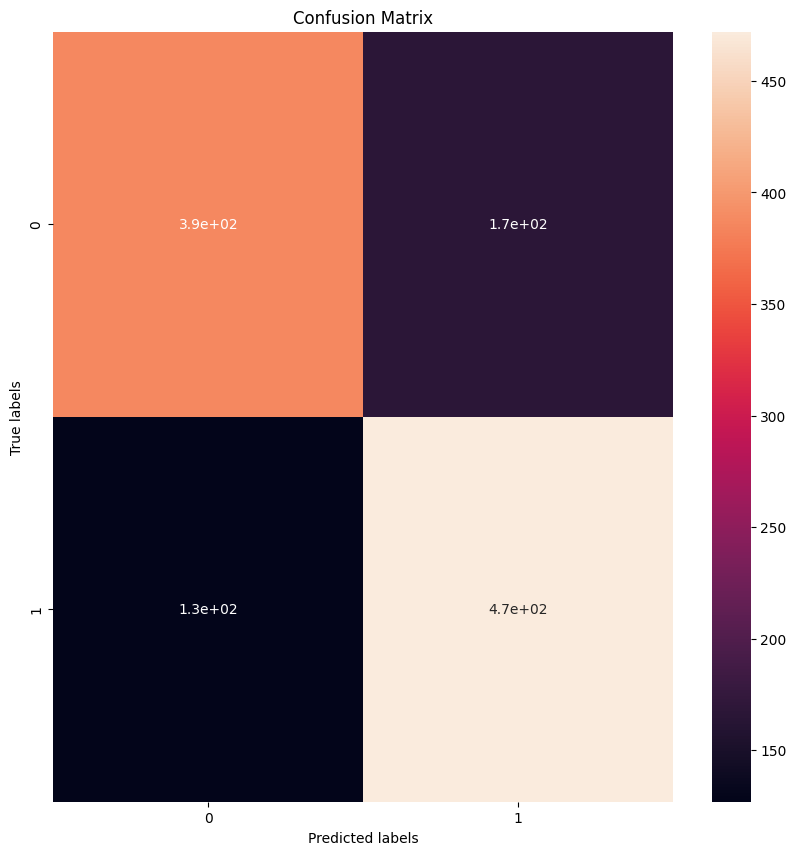

In [ ]:
#checking all the relevant metrics for Test Data
# Get the confusion matrix for both train and test
labels = ['0', '1']
cm = confusion_matrix(y_test,test_class_preds)
print(cm)

plt.figure(figsize=(10,10))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
print('TP: Predicted as future CHD, Actual CHD: ' ,cm[-1][-1])
print('TN: Predicted as No future CHD, Actual No CHD: ',cm[0][0])
print('FP: Predicted as future CHD, Actual No future CHD: ', cm[0][1])
print('FN: Predicted as No future CHD, Actual Future CHD: ', cm[1][0])

#For Test Data
#Get the accuracy score
test_accuracy = accuracy_score(y_test,test_class_preds)
print("The accuracy on test data is ", test_accuracy)

#Get the precssion score
test_precision = precision_score(y_test, test_class_preds)
print("The precision on test data is ", test_precision)

#recall
test_recall = recall_score( y_test,test_class_preds)
print("The recall on test data is ", test_recall)


#AUC-ROC
roc_auc = roc_auc_score(y_test,test_class_preds)
print("The ROC-AUC on test data is ", roc_auc)

TP: Predicted as future CHD, Actual CHD:  472
TN: Predicted as No future CHD, Actual No CHD:  386
FP: Predicted as future CHD, Actual No future CHD:  167
FN: Predicted as No future CHD, Actual Future CHD:  127
The accuracy on test data is  0.7447916666666666
The precision on test data is  0.7386541471048513
The recall on test data is  0.7879799666110183
The ROC-AUC on test data is  0.7429954082603012


In [ ]:
#Metrics Data frame for Test Data
dictSVM = {'Accuracy' : round(test_accuracy,3), 'Precision':round(test_precision,3) , 'Recall':round(test_recall,3), 'ROC-AUC':round(roc_auc,3)}

# Convert the dictionary to a DataFrame with the desired index and concatenate
new_row = pd.DataFrame(dictSVM, index=['SVM'])
Test_DF = pd.concat([Test_DF, new_row])

print(Test_DF)

                      Accuracy  Precision  Recall  ROC-AUC
Logistic Regression      0.704      0.711   0.725    0.703
GridCV                   0.702      0.708   0.726    0.701
Decision Tree            0.788      0.799   0.791    0.788
Decision Tree_GridCV     0.629      0.607   0.816    0.622
Random forest            0.788      0.799   0.791    0.788
Random forest_GridCV     0.898      0.899   0.905    0.897
Gradient Boosting        0.810      0.812   0.825    0.809
Adaboost                 0.798      0.798   0.818    0.797
XGboost                  0.793      0.789   0.820    0.791
Naive Bayes              0.681      0.698   0.679    0.681
SVM                      0.745      0.739   0.788    0.743


### 6.9 ML Model - 9 : KNN(K-Nearest Neighbour).

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the model
clf = KNeighborsClassifier(n_neighbors=5, weights='uniform', p=2)

# Train the model
clf.fit(X_train, y_train)

# Get the predicted classes
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)


#### 6.9.1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[[1703  623]
 [  23 2257]]


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

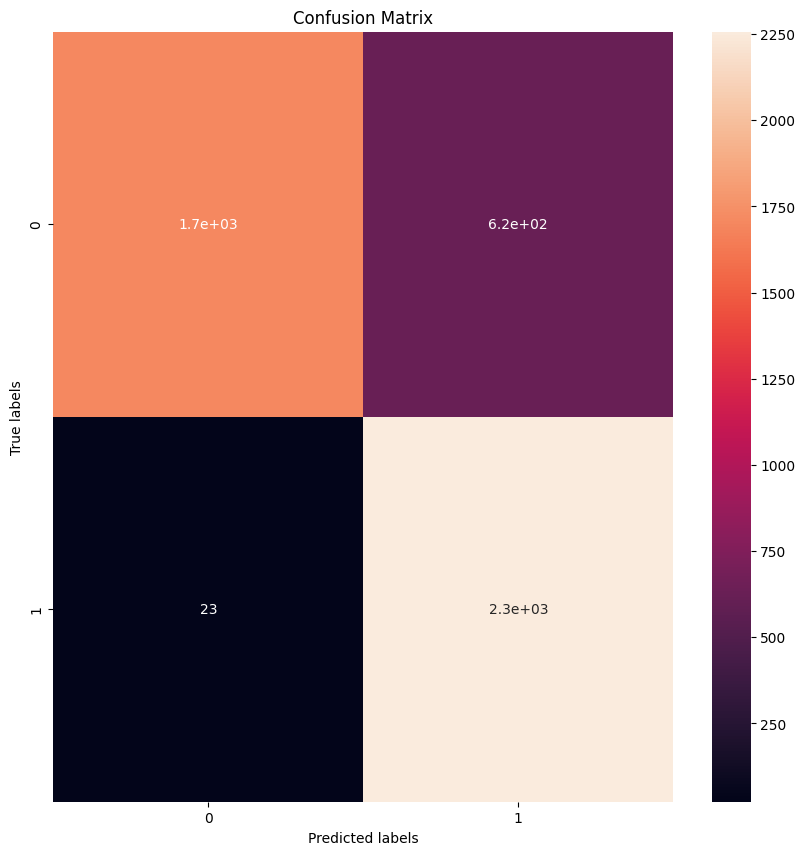

In [ ]:
#checking all the relevant metrics for Train Data
# Get the confusion matrix for both train and test

labels = ['0', '1']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

plt.figure(figsize=(10,10))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
print('TP: Predicted as future CHD, Actual CHD: ' ,cm[-1][-1])
print('TN: Predicted as No future CHD, Actual No CHD: ',cm[0][0])
print('FP: Predicted as future CHD, Actual No future CHD: ', cm[0][1])
print('FN: Predicted as No future CHD, Actual Future CHD: ', cm[1][0])

#For Train dataset
#Get the accuracy scores
train_accuracy = accuracy_score(y_train,train_class_preds)
print("The accuracy on train data is ", train_accuracy)

#precision
train_precision = precision_score(y_train, train_class_preds)   #sklearn.metrics.precision_score(y_true, y_pred)
print("The precision on train data is ", train_precision)

#recall
train_recall = recall_score( y_train,train_class_preds)
print("The recall on train data is ", train_recall)

roc_auc = roc_auc_score(y_train,train_class_preds)
print("The AOC-RUC on train data is ", roc_auc)

TP: Predicted as future CHD, Actual CHD:  2257
TN: Predicted as No future CHD, Actual No CHD:  1703
FP: Predicted as future CHD, Actual No future CHD:  623
FN: Predicted as No future CHD, Actual Future CHD:  23
The accuracy on train data is  0.8597481545809813
The precision on train data is  0.7836805555555556
The recall on train data is  0.9899122807017544
The AOC-RUC on train data is  0.8610352461118402


In [ ]:
#Metrics Data frame for Train Data
dictKNN = {'Accuracy' : round(train_accuracy,3), 'Precision':round(train_precision,3) , 'Recall':round(train_recall,3), 'ROC-AUC':round(roc_auc,3)}

# Convert the dictionary to a DataFrame with the desired index and concatenate
new_row = pd.DataFrame(dictKNN, index=['KNN'])
Train_DF = pd.concat([Train_DF, new_row])

print(Train_DF)

                      Accuracy  Precision  Recall  ROC-AUC
Logistic Regression      0.698      0.689   0.711    0.698
GridCV                   0.699      0.687   0.720    0.699
Decision Tree            1.000      1.000   1.000    1.000
Decision Tree_GridCV     0.628      0.589   0.825    0.630
Random forest            1.000      1.000   1.000    1.000
Random forest_GridCV     1.000      1.000   1.000    1.000
Gradient Boosting        0.841      0.830   0.853    0.841
Adaboost                 0.833      0.825   0.841    0.833
XGBoost                  0.814      0.805   0.824    0.814
Naive Bayes              0.685      0.688   0.666    0.685
SVM                      0.798      0.777   0.831    0.798
KNN                      0.860      0.784   0.990    0.861


[[355 198]
 [ 11 588]]


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

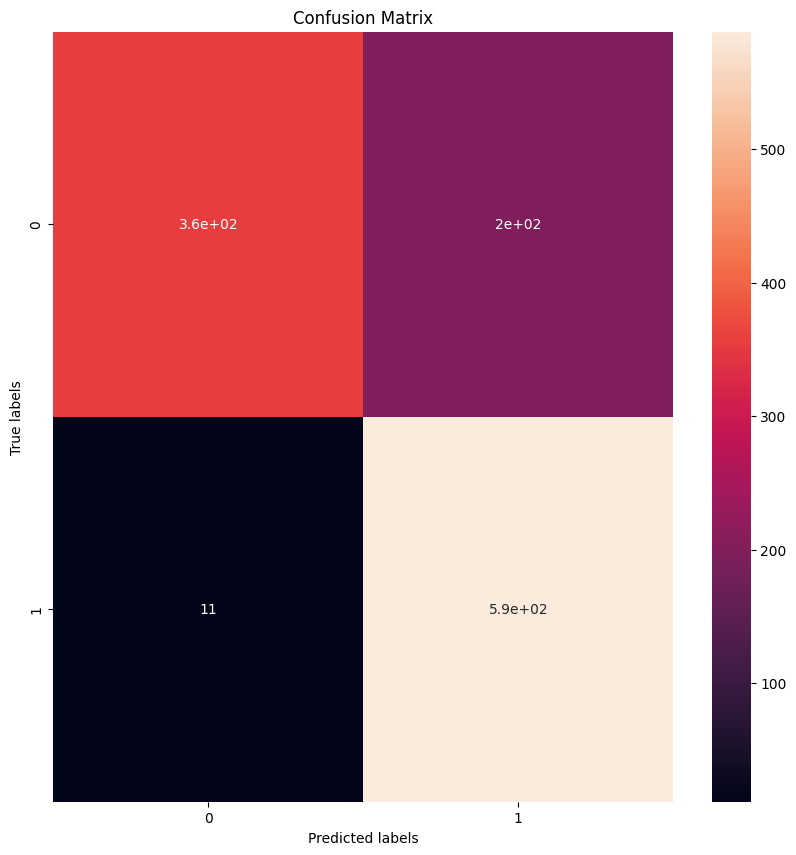

In [ ]:
#checking all the relevant metrics for Test Data
# Get the confusion matrix for both train and test
labels = ['0', '1']
cm = confusion_matrix(y_test,test_class_preds)
print(cm)

plt.figure(figsize=(10,10))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
print('TP: Predicted as future CHD, Actual CHD: ' ,cm[-1][-1])
print('TN: Predicted as No future CHD, Actual No CHD: ',cm[0][0])
print('FP: Predicted as future CHD, Actual No future CHD: ', cm[0][1])
print('FN: Predicted as No future CHD, Actual Future CHD: ', cm[1][0])

#For Test Data
#Get the accuracy score
test_accuracy = accuracy_score(y_test,test_class_preds)
print("The accuracy on test data is ", test_accuracy)

#Get the precssion score
test_precision = precision_score(y_test, test_class_preds)
print("The precision on test data is ", test_precision)

#recall
test_recall = recall_score( y_test,test_class_preds)
print("The recall on test data is ", test_recall)


#AUC-ROC
roc_auc = roc_auc_score(y_test,test_class_preds)
print("The ROC-AUC on test data is ", roc_auc)

TP: Predicted as future CHD, Actual CHD:  588
TN: Predicted as No future CHD, Actual No CHD:  355
FP: Predicted as future CHD, Actual No future CHD:  198
FN: Predicted as No future CHD, Actual Future CHD:  11
The accuracy on test data is  0.8185763888888888
The precision on test data is  0.7480916030534351
The recall on test data is  0.9816360601001669
The ROC-AUC on test data is  0.8117945219126513


In [ ]:
#Metrics Data frame for Test Data
dictKNN = {'Accuracy' : round(test_accuracy,3), 'Precision':round(test_precision,3) , 'Recall':round(test_recall,3), 'ROC-AUC':round(roc_auc,3)}

# Convert the dictionary to a DataFrame with the desired index and concatenate
new_row = pd.DataFrame(dictKNN, index=['KNN'])
Test_DF = pd.concat([Test_DF, new_row])

print(Test_DF)

                      Accuracy  Precision  Recall  ROC-AUC
Logistic Regression      0.704      0.711   0.725    0.703
GridCV                   0.702      0.708   0.726    0.701
Decision Tree            0.788      0.799   0.791    0.788
Decision Tree_GridCV     0.629      0.607   0.816    0.622
Random forest            0.788      0.799   0.791    0.788
Random forest_GridCV     0.898      0.899   0.905    0.897
Gradient Boosting        0.810      0.812   0.825    0.809
Adaboost                 0.798      0.798   0.818    0.797
XGboost                  0.793      0.789   0.820    0.791
Naive Bayes              0.681      0.698   0.679    0.681
SVM                      0.745      0.739   0.788    0.743
KNN                      0.819      0.748   0.982    0.812


# **Conclusion**

When selecting the best model, we should consider the bias-variance trade-off. A model with high training and testing scores and a small performance gap is typically the most suitable.

Based on these criteria, KNN appears to be the best model, with a training accuracy of 86%, test accuracy of 81%, training precision of 78%, and test precision of 74.8%. Additionally, it achieves a training recall of 99% and a test recall of 98.2%.

In this problem, our primary objective is to minimize false negatives, making recall more important than accuracy. Therefore, KNN is the most appropriate model for this classification task.

In [ ]:
# Visualizing evaluation Metric Score chart
print('Train metrics')
print(Train_DF)
print('\n')

print('Test metrics')
print(Test_DF)

Train metrics
                      Accuracy  Precision  Recall  ROC-AUC
Logistic Regression      0.698      0.689   0.711    0.698
GridCV                   0.699      0.687   0.720    0.699
Decision Tree            1.000      1.000   1.000    1.000
Decision Tree_GridCV     0.628      0.589   0.825    0.630
Random forest            1.000      1.000   1.000    1.000
Random forest_GridCV     1.000      1.000   1.000    1.000
Gradient Boosting        0.841      0.830   0.853    0.841
Adaboost                 0.833      0.825   0.841    0.833
XGBoost                  0.814      0.805   0.824    0.814
Naive Bayes              0.685      0.688   0.666    0.685
SVM                      0.798      0.777   0.831    0.798
KNN                      0.860      0.784   0.990    0.861


Test metrics
                      Accuracy  Precision  Recall  ROC-AUC
Logistic Regression      0.704      0.711   0.725    0.703
GridCV                   0.702      0.708   0.726    0.701
Decision Tree            0.

In [ ]:
Train_DF['Training Metrics'] = 'Train Data'
Test_DF['Training Metrics'] = 'Test Data'
merged_df = pd.concat([Train_DF, Test_DF], ignore_index=False)
merged_df['Model'] = merged_df.index
merged_df = merged_df.reset_index(drop=True)

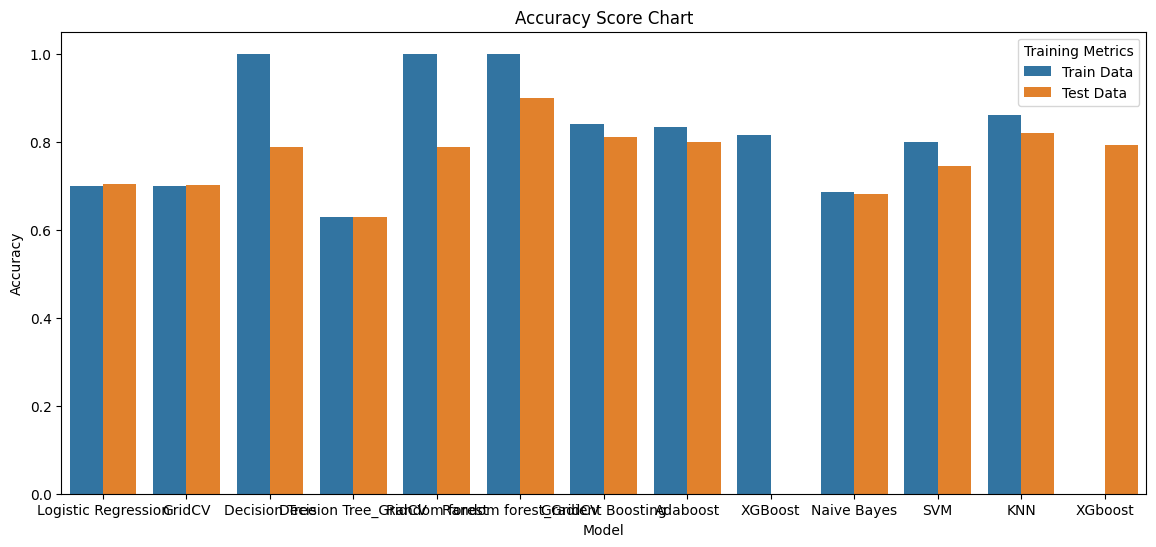

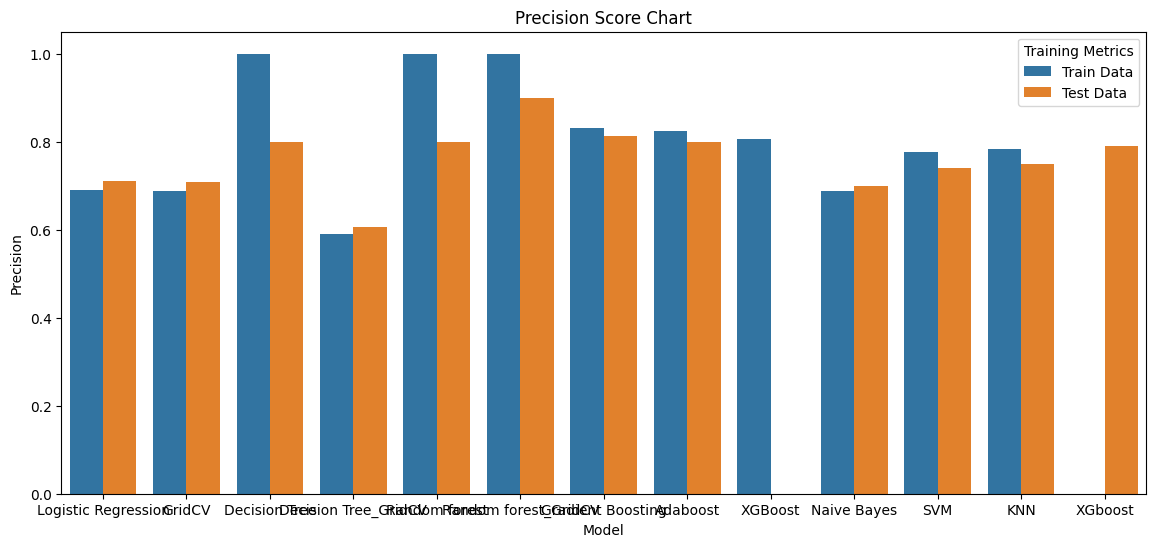

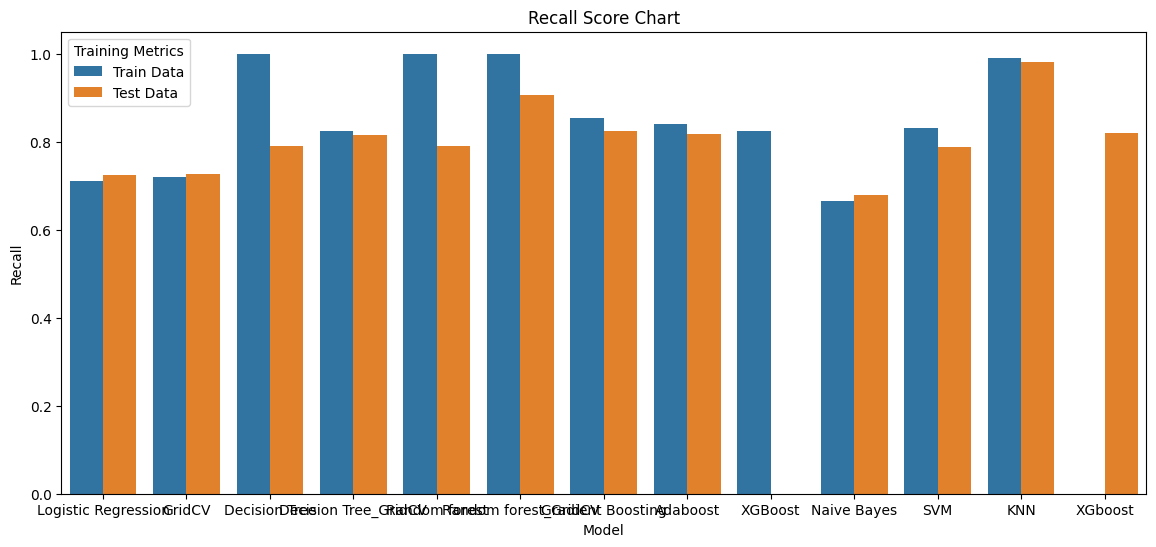

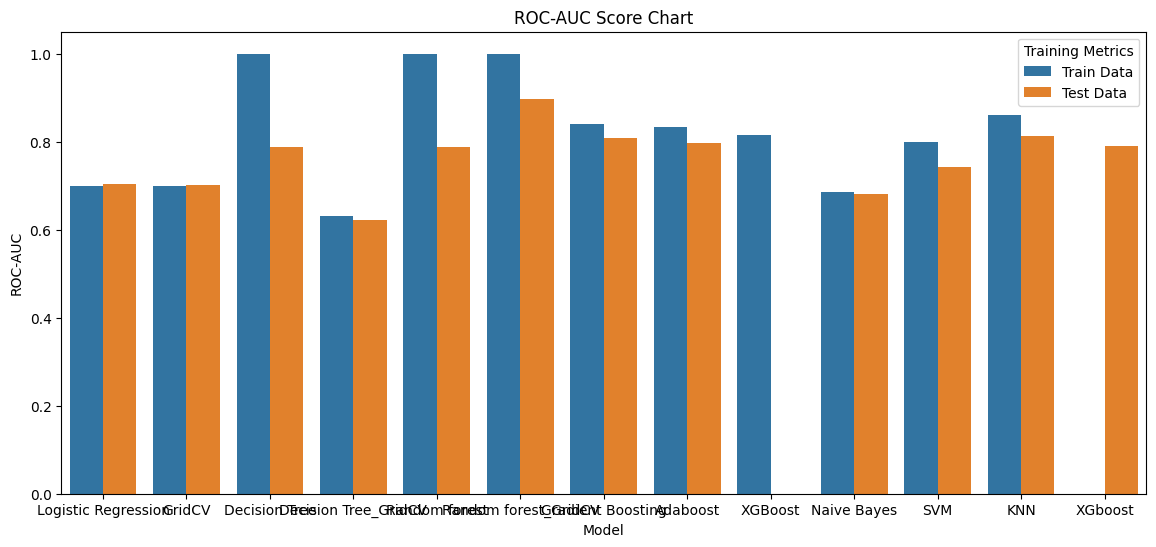

In [ ]:
metrics = ['Accuracy','Precision','Recall','ROC-AUC']

for metric in metrics:
  plt.figure(figsize=(14, 6))
  sns.barplot(data = merged_df, x = 'Model', y = metric,hue = 'Training Metrics')
  plt.title(f'{metric} Score Chart')
  plt.show()

## **Best Model**